# **K-MEANS CLUSTERING (K-MEANS KÜMELEME)**

K-means kümeleme, gözetimsiz makine öğrenimi algoritmalarından biridir ve etiketlenmemiş, sınıflandırılmamış veriler üzerinde çalışır. Bu tür algoritmalar, denetimsiz bir şekilde verileri desenlere, paralelliklere ve farklılıklara göre organize eder.

K-means algoritması, veri noktalarını kümeler (clusters) adı verilen gruplara ayırır. Veri noktalarının hangi kümeye ait olduğunu belirlemek için küme merkezine (centroid) olan uzaklık hesaplanır. Algoritma şu şekilde çalışır:

**Başlangıç:** Küme merkezleri rastgele seçilir.

**Atama:** Her bir veri noktası, en yakın küme merkezine atanır.

**Güncelleme:** Yeni küme merkezleri, mevcut kümelerin ortalaması alınarak yeniden hesaplanır.

**Tekrar:** Bu işlem, iyi bir kümeleme elde edilene kadar tekrarlanır.

Algoritmanın çalışması sırasında, kümelerin sayısı (K) genellikle önceden tanımlanır. Ancak bazı durumlarda, optimal K değeri belirlenmemiş olabilir. Bunun için farklı yöntemler (örneğin, dirsek yöntemi) kullanılarak ideal K değeri bulunur.

# K-Means Kümeleme’nin Özellikleri ve Sınırlamaları
**Avantajları**

Kolay anlaşılır ve hızlıdır.

Büyük veri kümeleri için uygun bir kümeleme yöntemidir.

Uygulaması basittir.

**Dezavantajları**

**Başlangıca Duyarlıdır:** Küme merkezlerinin başlangıçta nasıl belirlendiği, son sonucu etkiler.

**Hassasiyet:** Gürültülü verilere veya uç değerlere (outlier) karşı hassastır.

**Kısıtlamalar:** Veriler iyi ayrılmamışsa veya kümeler örtüşüyorsa, K-means iyi sonuç vermez.

**Yerel Minimum:** Algoritma, bazen en iyi çözüme değil, bir yerel minimuma takılabilir.

**Küme Kalitesi Bilgisi:** Algoritma, kümelerin kalitesi hakkında net bir bilgi vermez.

# K-Means Algoritmasının Amacı

Algoritmanın temel amacı, veri noktalarını benzerliklerine göre gruplara ayırmaktır. Her grup içindeki veri noktaları birbirine daha benzer, farklı gruplardaki noktalar ise birbirinden daha farklıdır.

# K-Means Algoritması Nasıl Çalışır?

**Veri Seti:** Veri setinde yer alan her bir öğe, belirli özelliklere (features) sahiptir. Bu öğeler, bir vektör gibi düşünülebilir.

**K Grupları:** Veriler, K sayıda kümeye ayrılır. K, algoritmanın çalışması için önceden belirlenmelidir.

**Adımlar**

**Küme Merkezlerinin Başlatılması:** Rastgele seçilmiş K noktası, ilk küme merkezi (centroid) olarak atanır.

**Atama:** Her veri noktası, en yakın küme merkezine atanır. Bu yakınlık, genellikle Öklid Mesafesi ile ölçülür.

**Güncelleme:** Her kümenin merkezi, o kümeye atanan veri noktalarının ortalaması alınarak güncellenir.

**Tekrar:** Bu işlem, belirli bir iterasyon boyunca veya kümeler sabitlenene kadar tekrarlanır.

**Sonuç:** Son iterasyonun sonunda, veri seti K kümeye ayrılmış olur.

# Küme Merkezlerinin Başlangıcı Nasıl Yapılır?
Küme merkezlerini başlatmak için birkaç yöntem vardır.

Rastgele Seçim: Veri setinden rastgele noktalar seçilir.

Değer Aralığına Göre Başlatma: Özelliklerin (örneğin, 𝑥) minimum ve maksimum değerleri arasından rastgele noktalar seçilir.


# Kullanım Alanları

Müşteri segmentasyonu

Görüntü sıkıştırma

Belge sınıflandırma

Gen ekspresyon analizi

# K-Means için Değerlendirme Metrikleri

**Inertia (İnertiya)**
Küme içi toplam varyansı ifade eder. Daha düşük değerler daha iyi bir kümelenme anlamına gelir.


**Silhouette Skoru**

Her veri noktasının bulunduğu kümeye olan yakınlığı ile diğer kümelere olan mesafesini karşılaştırır.

$+1:$ Mükemmel kümeleme.

  $0:$ Veri noktası kümeler arasında.

$−1:$ Yanlış kümelenme.


Inertia (Toplam Varyans): 2370689.69
Silhouette Skoru: 0.57


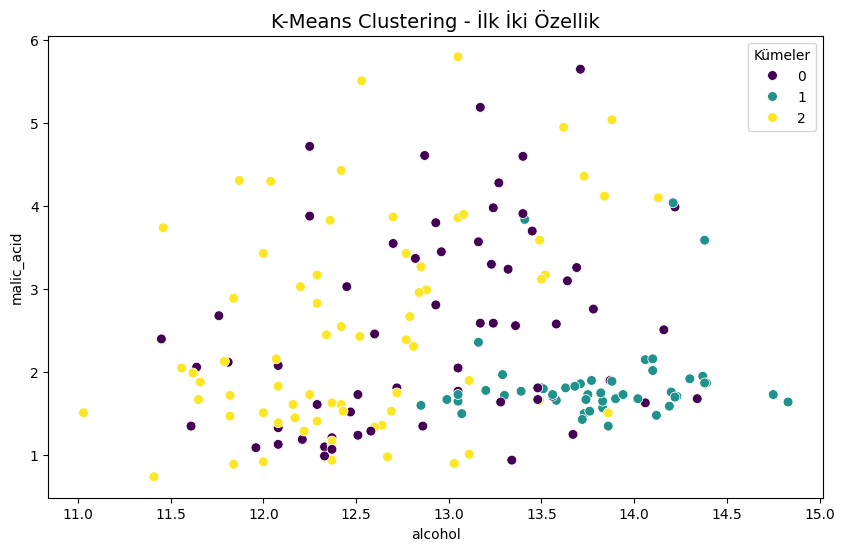

In [ ]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
data = load_wine()
X = data.data

# K-Means modelini oluştur ve eğit
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
kmeans.fit(X)

# Küme etiketlerini al
labels = kmeans.labels_

# İnertiya ve Silhouette skoru
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, labels)

print(f"Inertia (Toplam Varyans): {inertia:.2f}")
print(f"Silhouette Skoru: {silhouette_avg:.2f}")

# Veri çerçevesi oluştur
df = pd.DataFrame(X, columns=data.feature_names)
df['Cluster'] = labels

# İlk iki özelliği görselleştir
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=data.feature_names[0], y=data.feature_names[1], hue='Cluster', palette='viridis', s=50)
plt.title("K-Means Clustering - İlk İki Özellik", fontsize=14)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title="Kümeler", loc='best')
plt.show()


**Inertia (Toplam Varyans):** Küme merkezleri ile veri noktaları arasındaki mesafeyi değerlendirir. Küçük bir değer, iyi bir kümelenmeye işaret eder.

**Silhouette Skoru:** Kümeleme kalitesini değerlendirir; daha yüksek bir skor, daha iyi kümelenme anlamına gelir.

**Grafik Görselleştirme:** İlk iki özellik kullanılarak kümeler görselleştirilir.

Peki elbow (dirsek) yöntemi nedir ne için kullanırız?
# Elbow Yöntemi ile Optimal K Değerini Bulma

Elbow yöntemi, küme sayısını seçerken kullanılan popüler bir tekniktir. Bu yöntemi kullanarak Wine veri seti için uygun K değerini belirleyebiliriz.

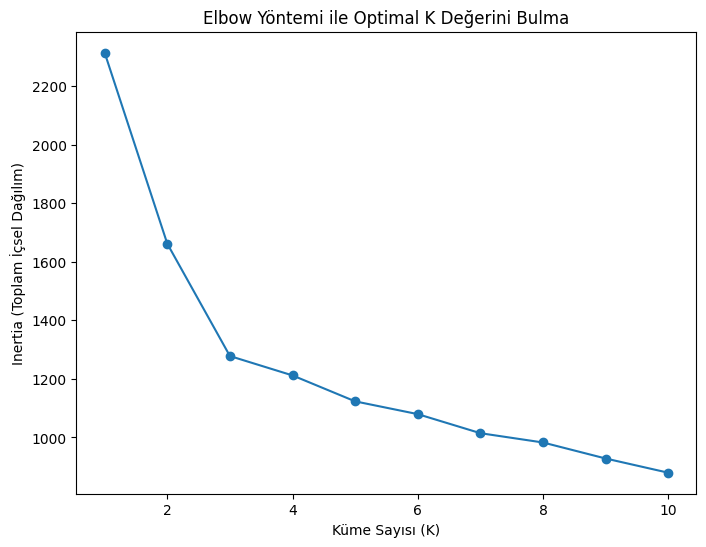

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Veri yükleme ve ölçekleme
wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow yöntemi
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Grafiği çizme
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Yöntemi ile Optimal K Değerini Bulma')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('Inertia (Toplam İçsel Dağılım)')
plt.show()


# Grafik nasıl yorumlanır?
Grafiği gözlemlerken fark etmemiz gereken belli bir kırılma noktasının olmasıdır burada yaklaşık olarak "3" değerinden sonra eğim azalmıştır yani K olarak seçmemiz gereken değerin 3 olduğunu anlarız.

**Optimal K Değerini Belirlemek neden önemli?**

Grafikteki dirsek noktası, optimal K değerini temsil eder. Bu noktada:

Küme sayısının artırılması, inertia'nın azalmasını önemli ölçüde etkilemez.

Fazladan kümeler eklemek, kümeleme sonucunda anlamlı bir iyileştirme sağlamaz ve yalnızca modeli gereksiz yere karmaşıklaştırır.

# Küme Sonuçlarını PCA ile Görselleştirme

Wine veri seti çok boyutlu olduğu için, PCA (Principal Component Analysis) ile boyut indirgeme yaparak sonuçları görselleştirebiliriz.

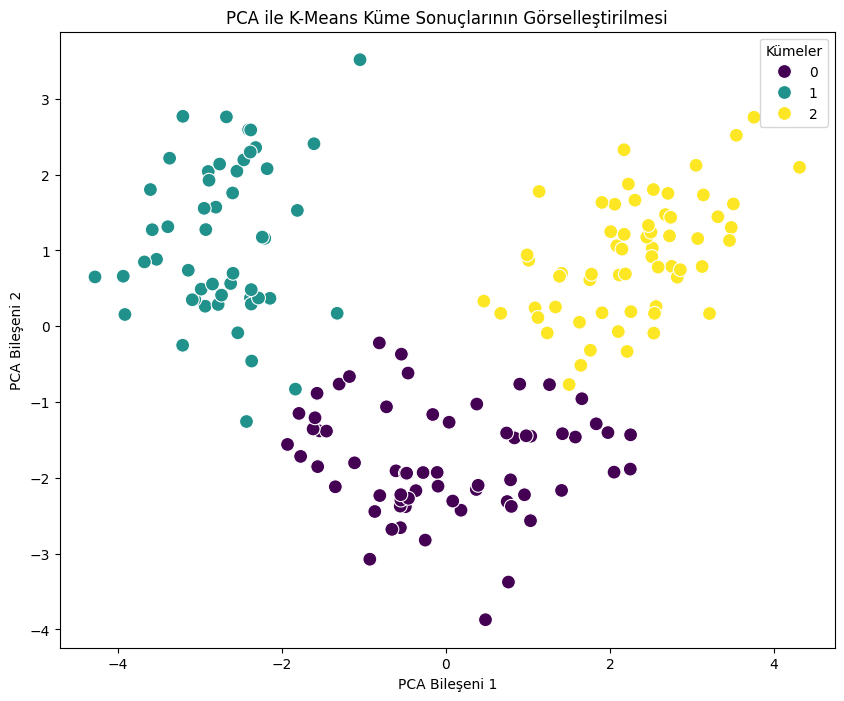

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# K-Means kümelemesi
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# PCA ile boyut indirgeme (2 boyuta düşürme)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA sonuçlarını görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='viridis', s=100)
plt.title('PCA ile K-Means Küme Sonuçlarının Görselleştirilmesi')
plt.xlabel('PCA Bileşeni 1')
plt.ylabel('PCA Bileşeni 2')
plt.legend(title='Kümeler')
plt.show()



# Her Özelliğin Küme Ortalamalarını Görme

Kümeler arası farklılıkları anlamak için her özelliğin küme ortalamalarını inceleyebiliriz.

In [ ]:
import pandas as pd
import numpy as np

# Küme sonuçlarını tabloya ekleme
wine_df = pd.DataFrame(X, columns=wine.feature_names)
wine_df['Cluster'] = y_kmeans

# Her küme için ortalamaları hesaplama
cluster_means = wine_df.groupby('Cluster').mean()

print("Her Küme için Özelliklerin Ortalamaları:")
print(cluster_means)


Her Küme için Özelliklerin Ortalamaları:
           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  
Cluster                                                                        
0               2.973077  1.062708   

# Kümelerin Özelliklere Göre Dağılımını İnceleme

Seçilen birkaç özellik için kutu grafikleri oluşturabiliriz.

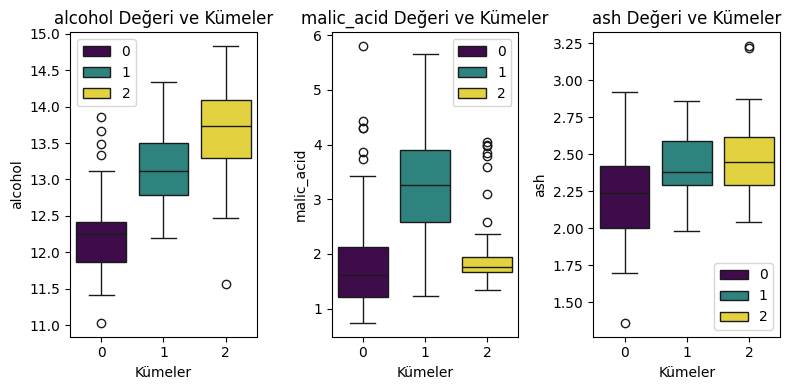

In [ ]:
plt.figure(figsize=(8, 4))
for i, feature in enumerate(['alcohol', 'malic_acid', 'ash'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=wine_df, hue=y_kmeans, palette='viridis')
    plt.title(f'{feature} Değeri ve Kümeler')
    plt.xlabel('Kümeler')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


# **Boxplot (Kutu Grafiği)**

Boxplot veya kutu grafiği, bir veri kümesinin dağılımı hakkında hızlı ve görsel bir özet sunan bir grafik türüdür. Verilerin merkezi eğilimi, yayılımı ve aykırı değerleri hakkında önemli bilgiler verir.

**Boxplot'un Bileşenleri**

Bir boxplot, genellikle aşağıdaki bileşenlerden oluşur:

**Kutu:** Verilerin %50'sinin yer aldığı bölgedir. Kutunun alt kenarı birinci çeyrek (Q1), üst kenarı ise üçüncü çeyrek (Q3) değerini gösterir.

**Medyan Çizgisi:** Kutunun içindeki çizgi, verilerin ortanca değerini (medyan) temsil eder.

**Bıyıklar:** Kutudan uzanan çizgilerdir. Genellikle, bıyıkların uç noktaları veri kümesindeki en küçük ve en büyük değerler değildir. Çoğu zaman, 1.5 x çeyrekler arası mesafe (IQR) kuralına göre belirlenirler. Bu kurala göre, bıyıkların uç noktaları, Q1 - 1.5 x IQR ve Q3 + 1.5 x IQR değerlerinden daha uzaktaki değerleri içermez.

**Aykırı Değerler:** Bıyıkların dışında kalan noktalar, aykırı değerler olarak kabul edilir. Bu değerler, diğer verilere göre oldukça farklıdır ve veri setinin genel yapısını etkileyebilir.

# Boxplot Ne İşe Yarar?

**Veri Dağılımı:** Verilerin nasıl dağıldığını, simetrik mi yoksa çarpık mı olduğunu gösterir.

**Merkezi Eğilim:** Verilerin ortanca değerini (medyan) belirtir.

**Yayılım:** Verilerin ne kadar yayıldığını gösterir (çeyrekler arası mesafe).

**Aykırı Değerler:** Veri setindeki aykırı değerleri belirlemek için kullanılır.

**Farklı Grupların Karşılaştırılması:** Farklı grupların dağılımlarını görsel olarak karşılaştırmak için kullanılır.

# Boxplot Nasıl Yorumlanır?

**Kutu Büyüklüğü:** Kutu ne kadar büyükse verilerin o kadar çok dağıldığı anlamına gelir.

**Medyanın Konumu:** Eğer medyan kutu içindeyse, veri dağılımı yaklaşık olarak
 simetriktir. Eğer medyan kutuya yakın ise, veri dağılımı hafifçe çarpıktır.

**Bıyıkların Uzunluğu:** Bıyıklar ne kadar uzunsa, verilerin o kadar yayıldığı anlamına gelir.

**Aykırı Değerlerin Sayısı:** Aykırı değerlerin sayısı, veri setinin kalitesi hakkında bilgi verir. Çok fazla aykırı değer, veri toplama sürecinde bir hata veya veri setindeki bir anomali olduğunu gösterebilir.

**Örnek Kullanım Alanları**

İstatistiksel Analiz: Verilerin özetlenmesi ve görselleştirilmesi.

Kalite Kontrol: Üretim süreçlerindeki varyasyonların incelenmesi.

Veri Madenciliği: Veri setlerindeki anormalliklerin tespiti.

Finans: Finansal verilerin analizinde (örneğin, hisse senedi fiyatları).

Tıp: Klinik çalışmalarda verilerin özetlenmesi.



# **Grafiğin Ayrıntılı Yorumu**

**Alkol Değeri ve Kümeler**

Genel Bakış: Alkol değeri için üç farklı küme bulunmaktadır. Küme 2, diğer iki kümeye göre daha yüksek ortalama alkol değerine sahiptir.

Dağılım: Küme 1'in verileri daha sıkışık bir dağılıma sahipken, Küme 2'de veriler daha geniş bir aralığa yayılmıştır.

Aykırı Değerler: Küme 1'de alkol değeri açısından oldukça farklılık gösteren aykırı değerler olduğunu görüyoruz.

**Malik Asit Değeri ve Kümeler**

malik asit için en geniş dağılıma sahip küme Küme 1'dir. Bu durum, Küme 1'deki şarapların malik asit içeriği konusunda daha fazla çeşitlilik gösterdiğini ve bu nedenle diğer kümelere göre daha heterojen bir yapıya sahip olduğunu gösterir.


Genel Bakış: Malik asit değeri için üç farklı küme bulunmaktadır. Küme 0, diğer iki kümeye göre daha düşük ortalama malik asit değerine sahiptir.

Dağılım: Küme 0 ve 2'nin verileri daha sıkışık bir dağılıma sahipken, Küme 1'de veriler daha geniş bir aralığa yayılmıştır.

Aykırı Değerler: Küme 2 malik asit değeri açısından en fazla aykırı değere sahip kümedir.

**Ash Değeri ve Kümeler**

Genel Bakış: Kül içeriği için de üç farklı küme bulunmaktadır. Küme 0, diğer iki kümeye göre daha düşük ortalama kül içeriğine sahiptir.

Dağılım: Küme 0 daha geniş bir aralığa yayılmıştır.

Aykırı Değerler: Küme 0'da kül içeriği oldukça düşük bir adet, Küme 2'de ise kül içeriği oldukça yüksek olan iki adet aykırı değer bulunmaktadır.

# Silhouette Skoruyla Küme Kalitesini Değerlendirme

Silhouette skoru, kümeler arasındaki ayrımı ve içsel tutarlılığı ölçer.

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette skoru hesaplama
sil_score = silhouette_score(X_scaled, y_kmeans)
print(f"Kümelerin Silhouette Skoru: {sil_score:.2f}")


Kümelerin Silhouette Skoru: 0.28


**Silhouette skoru,** kümeleme algoritmalarının kalitesini değerlendirmek için kullanılan önemli bir metriktir. Bu skor, her bir veri noktasının kendi kümesine ne kadar benzer olduğunu ve diğer kümelerden ne kadar farklı olduğunu ölçer. Silhouette skoru -1 ile +1 arasında bir değere sahiptir:

+1: Veri noktaları, kendi kümeleri içinde çok benzer ve diğer kümelerden çok uzaktır, bu da mükemmel bir kümelenmeyi ifade eder.

0: Veri noktaları, iki farklı kümeye eşit uzaklıktadır, yani kümeler arasında net bir ayrım yoktur.

-1: Veri noktaları, yanlış kümeye yerleştirilmiştir ve diğer kümelere daha yakındır, bu da kötü bir kümelenme sonucunu gösterir.

Bizim sonucumuzda PCA sonrası Silhouette Skorunun 0.28 olması, kümeleme modelinin kalitesinin orta olduğunu gösterir. Bu, kümeler arasında belirgin bir ayrım olmadığını veya kümelerin içinde çok belirgin benzerlikler olmadığını ifade edebilir. Kümeler arasında daha belirgin bir ayrım beklenirdi, ancak bu skor, verinin karmaşıklığı veya kullanılan modelin optimizasyonu gibi faktörlerden etkilenmiş olabilir.

**Küme Kalitesine Yönelik Değerlendirme:**

Düşük Silhouette Skoru (yaklaşık 0.1-0.3): Kümeleme modelinin pek iyi olmadığı ve kümelerin birbirinden çok net şekilde ayrılmadığı anlamına gelir. Modelin daha iyi parametrelerle yeniden eğitilmesi gerekebilir.

Orta Silhouette Skoru (yaklaşık 0.3-0.5): Kümeleme sonucunda bazı kümeler belirgin olsa da, hala iyileştirme yapılabilir. Bu tür skorlar, modelin kullanılabilir olduğunu ancak yine de optimize edilebileceğini gösterir.

Yüksek Silhouette Skoru (0.5 ve üstü): Kümeleme algoritmasının iyi bir performans gösterdiğini ve kümelerin net bir şekilde ayrıldığını gösterir. Bizim çalışmamızda PCA öncesinde skor 0.57 çıkmıştı.

Yapılabilecekler:

Eğer Silhouette skoru tatmin edici değilse (0.28 gibi), şu adımları göz önünde bulundurabilirsiniz:

**Küme sayısını gözden geçirin:** Elbow yöntemini veya Silhouette yöntemini kullanarak en uygun K (küme sayısı) değerini bulmaya çalışın.

**Farklı algoritmalar deneyin:** K-means dışında DBSCAN veya Hiyerarşik Kümeleme gibi diğer kümeleme algoritmalarını da deneyebilirsiniz.

**Öznitelik mühendisliği yapın:** Veri setinizi iyileştirerek daha anlamlı özellikler ekleyebilir veya gereksiz özellikleri çıkarabilirsiniz.

**Veri ön işleme:** Özellikle ölçeklendirme (scaling) veya standartlaştırma (normalization) gibi ön işleme adımlarını tekrar gözden geçirin.

# **PCA, t-SNE, UMAP**

# **PCA-Temel Bileşenler Analizi (Principal Component Analysis)**

Temel Bileşenler Analizi (PCA), yüksek boyutlu verilerdeki boyutları indirgemek için kullanılan en yaygın tekniklerden biridir. Bu teknik, veriyi daha düşük boyutlu bir uzaya indirgerken, verinin en fazla varyansını taşıyan yönlerini (bileşenlerini) korumaya çalışır. PCA, veri kümesindeki yüksek korelasyonlu değişkenleri, düşük korelasyona sahip yeni değişkenler (temel bileşenler) haline getirir.

**PCA'nın Temel Amaçları:**

Verinin boyutunu indirgemek.

Verinin içindeki en önemli ilişkileri veya desenleri koruyarak veriyi daha yönetilebilir hale getirmek.

Eğitim veri seti ile ilgili yapılan işlemlerin hızlı ve daha doğru olmasını sağlamak.

**PCA'nın Çalışma Prensibi**

**Veri Merkezileme:**

Verinin her bir özelliğinin ortalama değeri çıkarılır.

**Kovaryans Matrisinin Hesaplanması:**

Verinin ne kadar birbirine bağlı olduğunu (korelasyon) ölçmek için kullanılır.

**Eigen-decomposition:**

Kovaryans matrisinin özdeğerleri (eigenvalues) ve özvektörleri (eigenvectors) hesaplanır. Kovaryans matrisinden elde edilen özdeğerler ve özvektörler, verinin bileşenlerini oluşturur.


**Boyut İndirgeme:**

Bu özvektörler, yeni bir özellik uzayı oluşturur. İlk birkaç bileşen, verinin büyük kısmındaki varyansı kapsar.

# PCA'nın Kullanım Alanları


PCA, lineer bir kombinasyon kullanarak veri setindeki özellikleri, ortogonal bileşenler olarak yeniden yapılandırır. Bu bileşenler, orijinal verinin varyansını en iyi şekilde temsil eder. Her temel bileşen, verinin bir yönünü temsil eder ve bileşenler sırasıyla en büyük varyansı taşıyanlardan başlar.

İlk temel bileşen, verinin en fazla varyansını içerirken, ikinci temel bileşen birincisine dik olarak kalan en fazla varyansı içerir ve bu şekilde devam eder.
PCA, veri setinin daha düşük boyutlu temsillerini bulmaya çalışırken, orijinal verinin önemli bilgilerini kaybetmeden boyut indirgeme yapar.


**Veri görselleştirme**

Özellikle yüksek boyutlu verilerin 2D veya 3D şekillerde görselleştirilmesi.

**Öznitelik seçimi**

Daha az sayıda önemli değişkenle model oluşturulması.

**Veri sıkıştırma**

Verinin boyutunu küçültürken önemli özellikleri koruma.

PCA, ayrıca veri setlerinin boyutlarını küçültürken önemli ilişkileri korumayı hedeflediği için, özellikle makine öğrenimi ve istatistiksel analizler için çok kullanışlı bir araçtır.

**Sonuç**

Boyutlanma laneti ve PCA arasındaki ilişkiyi anlamak, veri analizinde çok önemli bir adımdır. Boyut sayısının arttığı durumlarda karşılaşılan bu tür zorluklar, PCA gibi boyut indirgeme teknikleriyle aşılabilir. PCA, yüksek boyutlu verilerin analizini daha kolay hale getirir ve verinin içindeki en önemli bilgileri koruyarak işlemleri hızlandırır.

PCA, hem öznitelik seçimi hem de veri görselleştirme gibi uygulamalarda yaygın olarak kullanılır ve makine öğrenimi süreçlerinde daha doğru, verimli sonuçlar elde etmeyi sağlar.


# **2. t-SNE (t-Distributed Stochastic Neighbor Embedding)**


**Boyut İndirgeme Nedir?**

Boyut indirgeme, n boyutlu veriyi (çok boyutlu veri ve birden fazla özellik) 2 veya 3 boyutlu bir uzaya indirgemek anlamına gelir. Örneğin, bir sınıflandırma problemi düşünün: Öğrencinin futbol oynayıp oynamayacağı, sıcaklık ve nem gibi iki özellikten bağımsız olabilir. Bu iki özellik arasında yüksek bir korelasyon varsa, bu iki özelliği tek bir temel özellikte birleştirebiliriz. Böylece, bu tür problemlerde özellik sayısını azaltmış oluruz. 3 boyutlu bir sınıflandırma problemi görselleştirilmesi zor olabilirken, 2 boyutlu bir sınıflandırma problemi basitçe 2D uzaya yerleştirilebilir.

**t-SNE Algoritması Nedir?**

t-SNE (T-dağılımlı Stokastik Komşu Gömme), yüksek boyutlu veriyi görselleştirmek için kullanılan bir boyut indirgeme tekniğidir. Bu algoritma, veri setindeki boyutları, verinin yerel yapısını koruyarak doğrusal olmayan bir şekilde indirgemek için rastgeleleştirilmiş bir yaklaşım kullanır.


t-SNE, verinin yüksek boyutlu haliyle görselleştirilmesini mümkün kılar çünkü verinin yerel yapısını daha düşük boyutlarda korur. Veriyi 2D veya 3D düzlemde görselleştirmek, verinin yapısını anlamamıza yardımcı olur. Bu sayede, yüksek boyutlu verilerdeki benzerlikleri veya kümeleri görsel olarak keşfetmek kolaylaşır.

# PCA ve t-SNE Arasındaki Farklar

PCA ve t-SNE, her ikisi de veri setlerinin boyutunu indirgemek için kullanılan denetimsiz algoritmalardır, ancak yöntemleri farklıdır:

PCA (Principal Component Analysis), deterministik bir algoritmadır, yani veriyi indirgerken belirli matematiksel bir yol izler ve verinin varyansını korumayı amaçlar. PCA, doğrusal bir indirgeme yöntemidir ve genellikle verinin özelliklerinden önemli olanları çıkararak daha düşük boyutlu bir temsil oluşturur.

t-SNE, rastgeleleştirilmiş ve doğrusal olmayan bir algoritmadır. Bu algoritma, verinin yerel yapısını koruyarak yüksek boyutlu veriyi daha düşük boyutlu bir uzaya indirger. t-SNE'nin temel amacı, veri noktaları arasındaki benzerlikleri daha iyi temsil etmek ve görselleştirmeyi kolaylaştırmaktır.

**t-SNE'nin Avantajı**

t-SNE, aykırı değerlerden (outliers) etkilenmez. Çünkü t-SNE, verinin yerel yapısını korumaya odaklanır. Buna karşın, PCA algoritması aykırı değerlerden etkilenebilir, çünkü PCA, verinin genel varyansını korumayı hedefler.

**t-SNE Algoritması Nasıl Çalışır?**

t-SNE, doğrusal olmayan bir boyut indirgeme algoritmasıdır. Veri noktalarının benzerlikleri, o noktaların koşullu olasılıkları kullanılarak hesaplanır. Yani, veri noktası A'nın, veri noktası B'yi komşusu olarak seçme olasılığı hesaplanır. Bu benzerlikler, daha yüksek boyutlu uzayda koşullu olasılık olarak ifade edilir.

t-SNE algoritması, bu koşullu olasılıkların farkını, yüksek boyutlu ve düşük boyutlu uzay arasında minimize etmeye çalışır. Böylece, daha düşük boyutlu uzayda veri noktalarının temsilini mümkün kılar.

**Zaman ve Alan Karmaşıklığı**

t-SNE algoritması, her bir veri noktası için çiftler arası koşullu olasılıkları hesaplar ve daha sonra bu olasılıkların farklarını minimize etmeye çalışır. Bu işlem, çok sayıda hesaplama gerektirdiği için, algoritma genellikle karesel (quadratic) zaman ve alan karmaşıklığına sahiptir. Yani, veri noktası sayısının karesi kadar hesaplama ve bellek kullanımı gerektirir. Bu da büyük veri setlerinde t-SNE'nin çok zaman alıcı ve belleği tüketen bir işlem haline gelmesine neden olabilir.

**Uygulama Alanları**

Veri görselleştirme (özellikle kümeleri görsel olarak ayırma)
Görüntü verisi (örneğin, yüz tanıma veya doğal dil işleme)

**Sonuç**

t-SNE, özellikle veri görselleştirme için güçlü bir araçtır. Yüksek boyutlu veriyi, yerel yapıyı koruyarak daha düşük boyutlara indirger ve böylece veriyi anlamak ve görselleştirmek kolaylaşır. Bununla birlikte, t-SNE'nin zaman karmaşıklığı ve büyük veri setlerinde yüksek bellek kullanımı gibi zorlukları olabilir.

PCA ve t-SNE, boyut indirgeme için farklı yöntemler sunar. PCA, doğrusal bir yaklaşım sunarken, t-SNE daha çok veri noktalarındaki yerel ilişkileri korumaya odaklanır. t-SNE, özellikle görselleştirme ve keşif amacıyla kullanıldığında oldukça faydalıdır, ancak büyük veri setlerinde zaman ve kaynak kullanımı açısından dikkat edilmesi gereken bir algoritmadır.



# **UMAP (Uniform Manifold Approximation and Projection)**

UMAP, verinin topolojik yapısını koruyarak boyutlarını azaltmayı hedefleyen bir manifold öğrenme tekniğidir. Yüksek boyutlu veri kümelerini genellikle iki veya üç boyutlu uzaya indirgemek için kullanılır ve bu süreçte görselleştirme amacı taşır. UMAP, uygulama açısından sıklıkla t-SNE (t-dağılımlı Stokastik Komşu Gömme) ile karşılaştırılır. Ancak, UMAP'in avantajları arasında şunlar bulunur:

1. Verinin küresel yapısını daha iyi korur.

2. Daha hızlı hesaplama yapar.

**UMAP'in Matematiksel Temeli**

UMAP algoritması, aşağıdaki önemli matematiksel kavramlara dayanır:

**Riemann Manifoldu**

UMAP, verilerin bir Riemann manifoldunda düzgün bir şekilde dağıldığını varsayar. Bu, verilerin, yerel olarak Öklid uzayı ile yakından benzeşen pürüzsüz ve eğimli bir yüzey üzerinde yer aldığı anlamına gelir.

**Riemann Metriği**

Bu metrik, manifold üzerindeki iki nokta arasındaki mesafeyi tanımlar. UMAP, bu metriğin yerel olarak sabit olduğunu veya sabitmiş gibi davranılabileceğini varsayar.

**Topolojik Veri Analizi (TDA)**

UMAP, verilerin yapısını anlamak için topolojik veri analizini kullanır. Bu yöntemle, verilerden bulanık bir topolojik temsil oluşturulur ve daha sonra bu temsil, düşük boyutlu bir yerleştirme (embedding) elde etmek için optimize edilir.

# UMAP Algoritması

UMAP algoritması iki ana aşamadan oluşur:

**1. Bulanık Topolojik Temsilin Oluşturulması**

**En Yakın Komşuların Belirlenmesi**

Her veri noktası için en yakın komşular bulunur. Bu işlem genellikle hızlı olabilmek için yaklaşık en yakın komşu algoritmaları kullanılarak gerçekleştirilir.

**Bulanık Simplicial Küme**

En yakın komşular kullanılarak, verilerin yerel bağlantısını yakalayan bir bulanık simplicial küme oluşturulur.

**Bulanık Üyelik Güçleri**

Simplicial kümedeki kenarlara, iki noktanın bağlantılı olma olasılığını temsil eden üyelik güçleri atanır.

**2. Düşük Boyutlu Yerleştirmenin Optimizasyonu**

**Çapraz Entropi Optimizasyonu**

Yüksek boyutlu uzaydaki bulanık simplicial küme ile düşük boyutlu uzaydaki yapı arasındaki çapraz entropiyi minimize etmeye çalışır.

**Stokastik Gradyan İnişi (SGD)**

UMAP, optimizasyon için stokastik gradyan inişi kullanır. Bu yöntem, düşük boyutlu uzaydaki noktaların pozisyonlarını iteratif olarak ayarlayarak bulanık topolojik yapıya daha iyi uyum sağlamalarını hedefler.

**UMAP’in Avantajları ve Kullanım Alanları**

**Hız ve Ölçeklenebilirlik**

UMAP, özellikle büyük veri kümelerinde t-SNE'den daha hızlıdır ve yüksek boyutlu verileri daha verimli bir şekilde işler.

**Global ve Lokal Yapı**

UMAP, verinin hem yerel hem de küresel yapısını koruyabilir, bu da görselleştirme ve keşif analizi için oldukça faydalıdır.

**Esnek Uygulama Alanları**

UMAP, genom analizi, görüntü işleme, doğal dil işleme ve yüksek boyutlu veri görselleştirme gibi birçok alanda uygulanabilir.

**Sonuç**

UMAP, yüksek boyutlu verilerdeki örüntüleri anlamak ve veriyi görselleştirmek için güçlü bir araçtır. Matematiksel olarak sağlam temeller üzerine inşa edilmiştir ve özellikle hızlı, esnek ve verimli bir algoritma olmasıyla dikkat çeker. Verinin topolojik yapısını koruma yeteneği, UMAP'i diğer boyut indirgeme tekniklerinden ayıran temel bir özelliktir. Hem keşif hem de veri hazırlama süreçlerinde etkili bir şekilde kullanılabilir.



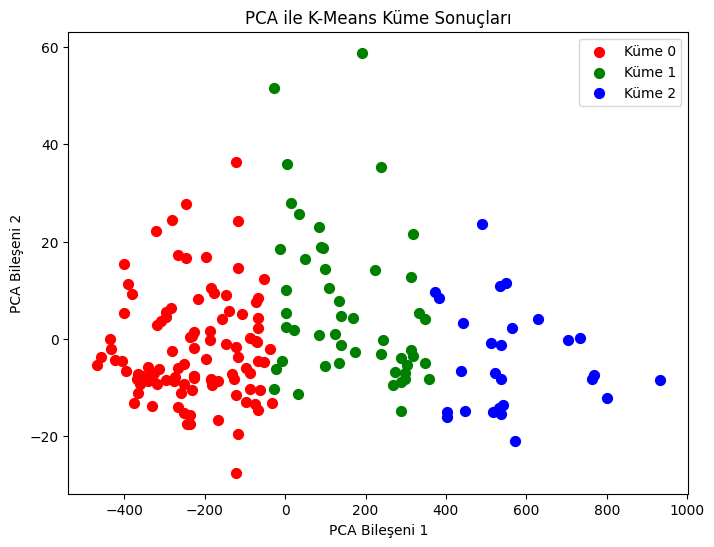

Silhouette Skoru: 0.560
Davies-Bouldin Skoru: 0.550


In [ ]:
# Gerekli kütüphaneleri import ediyoruz
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Wine veri setini yükleyelim
wine = load_wine()
X = wine.data
y = wine.target

# K-Means kümeleme yapalım
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# PCA ile veriyi 2 boyuta indirgeme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Kümeleme sonuçlarını PCA ile görselleştirelim
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=50, c='red', label='Küme 0')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=50, c='green', label='Küme 1')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=50, c='blue', label='Küme 2')
plt.title('PCA ile K-Means Küme Sonuçları')
plt.xlabel('PCA Bileşeni 1')
plt.ylabel('PCA Bileşeni 2')
plt.legend()
plt.show()

# Silhouette Skoru
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Skoru: {silhouette_avg:.3f}")

# Davies-Bouldin Skoru
db_score = davies_bouldin_score(X, y_kmeans)
print(f"Davies-Bouldin Skoru: {db_score:.3f}")


Yukarıdaki çıktıda dikkatinizi çekmesi gereken bir nokta var. Bu daha önce yaptığımız PCA sonucundan farklı görünüyor değil mi? Bunun sebebi burada scaler kullanılmamış olması scaler kullanılmadan PCA uygulaması silhouette skoruna pek etki etmemiş ve data daha iyi kümelenmiş gözleniyor değil mi aşağıda tekrar scaler uyguladığımızda çıkan görüntüye ve Silhouette skoruna ve yanısıra Davies-Bouldin skoruna da dikkat etmenizi isteyeceğim.

# Davies-Bouldin Skoru

Davies-Bouldin Skoru, kümelenmiş verilerin kalitesini ölçen bir içsel değerlendirme metriğidir. Kümeleme algoritmalarının ne kadar iyi performans gösterdiğini, kümelerin birbirinden ne kadar iyi ayrıldığını ve ne kadar yoğun olduklarını ölçmek için kullanılır.

**Nasıl Hesaplanır ?**

DB skoru, kümeler arası mesafe ve kümeler içindeki yoğunluğu dikkate alır.

Düşük bir Davies-Bouldin skoru, kümelerin iyi ayrıldığını ve her bir kümenin yoğun olduğunu gösterir.

Yüksek bir DB skoru ise kümeler arasındaki mesafenin az olduğunu, kümelerin birbirine yakın olduğunu ve birbirinden iyi ayrılmadığını gösterir.

**Hesaplama yöntemi**

1. Kümeler arasındaki mesafe (örneğin, Euclidean mesafesi) ile her bir kümenin içsel mesafesi (kendi içinde ne kadar sıkışık oldukları) karşılaştırılır.

2. Matematiksel olarak, her bir küme çifti için bir skor hesaplanır ve sonra bu skorlardan en küçüğü alınarak toplam skora ulaşılır.

Düşük DB skoru (örneğin 0.2-0.5) daha iyi bir kümeleme performansı anlamına gelir.

Yüksek DB skoru (örneğin 1.0 ve üstü) ise daha kötü bir kümeleme sonucu işaret eder.

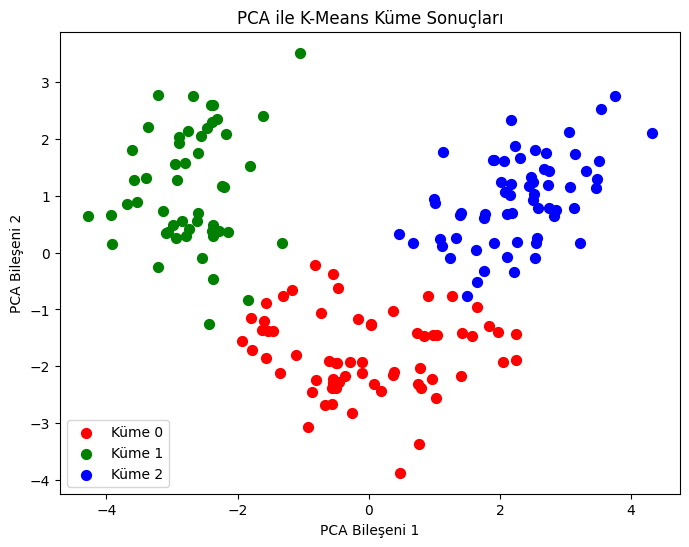

Silhouette Skoru: 0.285
Davies-Bouldin Skoru: 1.389


In [ ]:
from sklearn.preprocessing import StandardScaler

# Veriyi ölçeklendirelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means kümeleme yapalım
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

# PCA ile veriyi 2 boyuta indirgeme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Kümeleme sonuçlarını PCA ile görselleştirelim
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=50, c='red', label='Küme 0')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=50, c='green', label='Küme 1')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=50, c='blue', label='Küme 2')
plt.title('PCA ile K-Means Küme Sonuçları')
plt.xlabel('PCA Bileşeni 1')
plt.ylabel('PCA Bileşeni 2')
plt.legend()
plt.show()

# Silhouette Skoru
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Skoru: {silhouette_avg:.3f}")

# Davies-Bouldin Skoru
db_score = davies_bouldin_score(X_scaled, y_kmeans)
print(f"Davies-Bouldin Skoru: {db_score:.3f}")


In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00


PCA ile Silhouette Skoru: 0.283
PCA ile Davies-Bouldin Skoru: 0.5977226208167409
t-SNE ile Silhouette Skoru: 0.283
t-SNE ile Davies-Bouldin Skoru: 0.5083646493543226
UMAP ile Silhouette Skoru: 0.283
UMAP ile Davies-Bouldin Skoru: 0.425393141624957


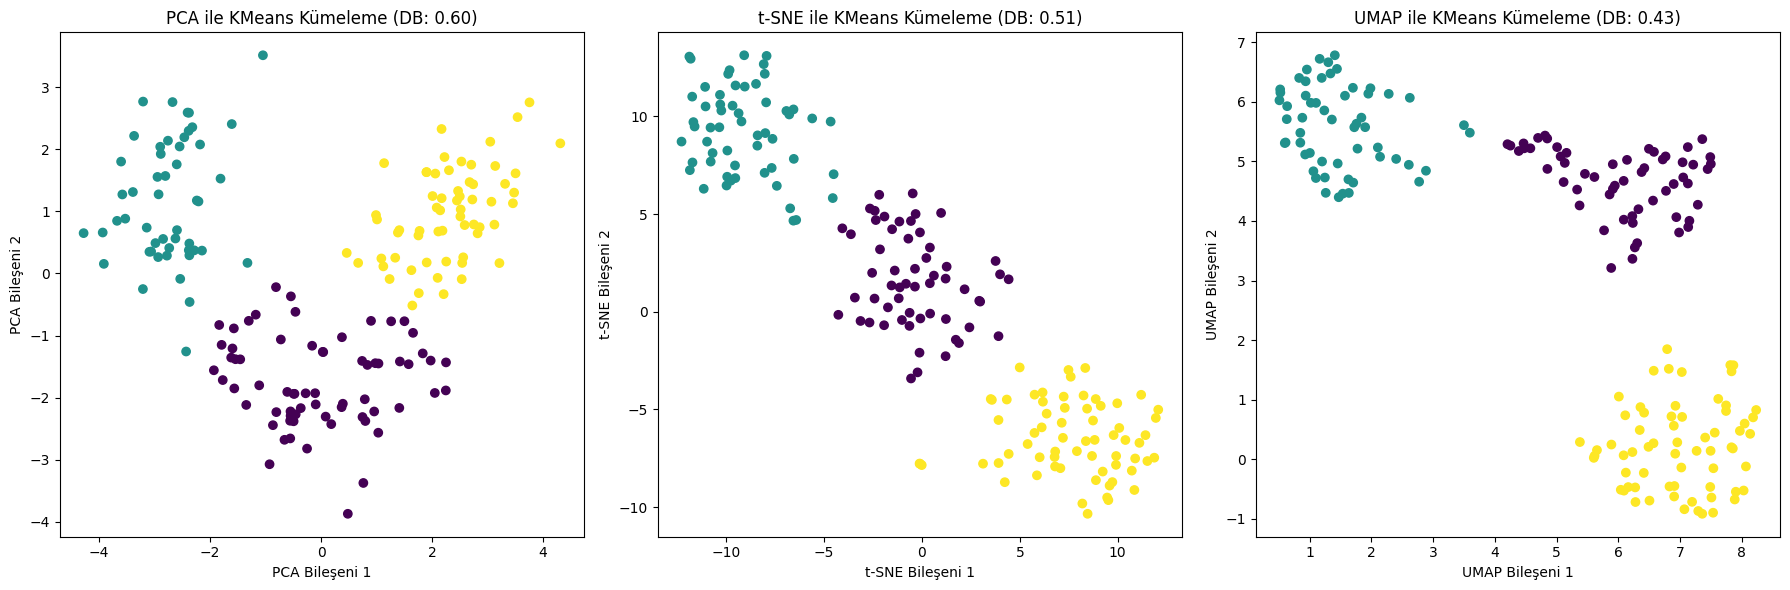

In [ ]:
# Gerekli kütüphaneler
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

# Veriyi yükleyelim (Wine dataset)
data = load_wine()
X = data.data
y = data.target

# Veriyi ölçeklendirelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA ile veriyi 2D'ye indirgemek
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

# Silhouette Skoru
silhouette_avg_pca = silhouette_score(X_scaled, y_kmeans)
print(f"PCA ile Silhouette Skoru: {silhouette_avg_pca:.3f}")

# Davies-Bouldin Skoru
db_score_pca = davies_bouldin_score(X_pca, y_kmeans)
print(f"PCA ile Davies-Bouldin Skoru: {db_score_pca}")

# t-SNE ile 2D'ye indirgeme
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# KMeans ile t-SNE sonuçları üzerinde tahmin
kmeans_tsne = KMeans(n_clusters=3, random_state=42)
kmeans_tsne.fit(X_tsne)
y_kmeans_tsne = kmeans_tsne.predict(X_tsne)

# Silhouette Skoru
silhouette_avg_tsne = silhouette_score(X_scaled, y_kmeans)
print(f"t-SNE ile Silhouette Skoru: {silhouette_avg_tsne:.3f}")

# Davies-Bouldin Skoru
db_score_tsne = davies_bouldin_score(X_tsne, y_kmeans_tsne)
print(f"t-SNE ile Davies-Bouldin Skoru: {db_score_tsne}")

# UMAP ile 2D'ye indirgeme
umap_model = umap.UMAP(n_components=2, n_jobs=-1)
X_umap = umap_model.fit_transform(X_scaled)

# KMeans ile UMAP sonuçları üzerinde tahmin
kmeans_umap = KMeans(n_clusters=3, random_state=42)
kmeans_umap.fit(X_umap)
y_kmeans_umap = kmeans_umap.predict(X_umap)

# Silhouette Skoru
silhouette_avg_umap = silhouette_score(X_scaled, y_kmeans)
print(f"UMAP ile Silhouette Skoru: {silhouette_avg_umap:.3f}")

# Davies-Bouldin Skoru
db_score_umap = davies_bouldin_score(X_umap, y_kmeans_umap)
print(f"UMAP ile Davies-Bouldin Skoru: {db_score_umap}")

# Sonuçları görselleştirelim
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# PCA Görselleştirmesi
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
ax[0].set_title(f'PCA ile KMeans Kümeleme (DB: {db_score_pca:.2f})')
ax[0].set_xlabel('PCA Bileşeni 1')
ax[0].set_ylabel('PCA Bileşeni 2')

# t-SNE Görselleştirmesi
ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans_tsne, cmap='viridis')
ax[1].set_title(f't-SNE ile KMeans Kümeleme (DB: {db_score_tsne:.2f})')
ax[1].set_xlabel('t-SNE Bileşeni 1')
ax[1].set_ylabel('t-SNE Bileşeni 2')

# UMAP Görselleştirmesi
ax[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y_kmeans_umap, cmap='viridis')
ax[2].set_title(f'UMAP ile KMeans Kümeleme (DB: {db_score_umap:.2f})')
ax[2].set_xlabel('UMAP Bileşeni 1')
ax[2].set_ylabel('UMAP Bileşeni 2')

plt.tight_layout()
plt.show()


# **HIERARCHICAL CLUSTERING ( HİYERARŞİK KÜMELEME )**


Hiyerarşik kümeleme, veri noktalarını benzerlik veya uzaklık ölçümlerine dayanarak hiyerarşik bir yapıda (ağaç benzeri) gruplayan bir kümeleme yöntemidir. Bu yöntem, veri madenciliği ve istatistik alanlarında sıkça kullanılır.

Hiyerarşik kümeleme iki temel türde gerçekleştirilebilir:

# Aglomeratif Hiyerarşik Kümeleme (Bottom-up Approach)

Bu yöntem, bir yapboz yapmaya benzetilebilir. Başlangıçta, her bir yapboz parçası (veri noktası) ayrı bir kümedir. Sonraki adımda, en çok birbirine uyan iki parçayı bulur ve birleştiririz. Bu işlemi tekrarlayarak, giderek daha büyük parçalar oluştururuz. En sonunda, tüm parçalar tek bir büyük yapboz haline gelir.

**Örnek:** Bir partide tanıştığınız insanları düşünün. Başlangıçta herkes tek başınadır (tekil kümeler). Zamanla, ortak ilgi alanları olan insanlar bir araya gelir (kümeler birleşir). En sonunda, herkesin bir şekilde bağlantılı olduğu büyük bir sosyal ağ oluşur.

Dendrogram adı verilen bir ağaç yapısı, bu birleştirme sürecinin görsel bir temsilidir.

# Bölücü Hiyerarşik Kümeleme (Top-down Approach)

Bu yöntem ise, bir bütünün parçalara ayrılmasına benzetilebilir. Başlangıçta, tüm veri noktaları tek bir büyük kümedir. Sonraki adımda, bu büyük kümeyi, en farklı özelliklere sahip iki alt kümeye ayırırız. Bu işlemi tekrarlayarak, kümeleri daha küçük parçalara böleriz. En sonunda, her bir parça tek bir veri noktasına indirgenir.

**Örnek:** Bir ülkeyi düşünün. Ülke başlangıçta tek bir büyük kümedir. Bu ülke, kültürel, coğrafi veya diğer farklılıklar nedeniyle daha küçük bölgelere (kümelere) ayrılabilir. Bu bölgeler daha da küçük bölgelere ayrılarak en sonunda bir şehir veya köy gibi tek bir küme haline gelir.

**Özetle**

Aglomeratif: Kümeleri birleştirerek başlar, tek bir büyük kümeyle biter.
Bölücü: Tek bir büyük kümeyle başlar, tekil veri noktalarına kadar böler.


# Hiyerarşik Kümelemede Bağlantı Kuralları ve Küme Sayısı Belirleme

Hiyerarşik kümeleme, veri noktalarını benzerliklerine göre hiyerarşik bir yapıya oturtan bir yöntemdir. Bu yöntemde, kümeler arasındaki bağlantı, farklı bağlantı kurallarına göre belirlenir.

**Bağlantı Kuralları**

**Single Linkage:** İki küme arasındaki en kısa mesafe, yani en yakın iki nokta arasındaki uzaklık esas alınır. Bu kural, uzun ve ince kümeler oluşturma eğilimindedir.

**Complete Linkage:** İki küme arasındaki en uzun mesafe, yani en uzak iki nokta arasındaki uzaklık esas alınır. Bu kural, daha kompakt ve küresel kümeler oluşturma eğilimindedir.

**Average Linkage:** İki kümedeki tüm noktaların arasındaki tüm mesafelerin ortalaması alınır. Bu kural, hem single linkage hem de complete linkage'in bir ortalaması gibi düşünülebilir ve genellikle daha dengeli sonuçlar verir.

**Ward's Method:** Bu yöntem, kümeler birleştirildiğinde toplam kareler toplamı (SSE) en az artacak şekilde kümeleri birleştirir. Yani, kümeler içindeki varyansı en aza indirmeye çalışır.

# Küme Sayısını Belirleme
Hiyerarşik kümelemenin en önemli adımlarından biri, optimal küme sayısını belirlemektir. Bunun için iki yaygın yöntem kullanılır:

**Dendrogram**

Dendrogram, hiyerarşik kümeleme sürecinin görsel bir temsilidir.
Dendrogram üzerinde belirli bir yükseklikte yatay bir kesim yaparak, o yükseklikteki tüm dalların altındaki kümeleri ayrı kümeler olarak kabul edebilirsiniz.

**Optimal kesim noktası**

Genellikle, dendrogramda belirgin bir "dirsek" noktası aranır. Bu nokta, küme sayısının artmasıyla elde edilen bilgi artışının azaldığı noktayı gösterir.


# Dendrogram Nedir?

Dendrogram, hiyerarşik kümeleme sürecinin görsel bir temsilidir. Ağaç benzeri bir yapıya sahiptir. Dendrogramın dibinde tekil veri noktaları bulunurken, tepesinde tüm veri noktalarını içeren tek bir büyük küme yer alır. Dendrogramdaki dallar, farklı hiyerarşik seviyelerdeki kümeleri temsil eder.

**Dendrogramı Kullanarak Küme Sayısı Belirleme**

Dendrogramı farklı yüksekliklerde keserek, farklı sayıda küme elde edilebilir. Optimal küme sayısı, dendrogramın şekline ve domain bilgisine bağlı olarak belirlenebilir. Genellikle, dendrogramda belirgin bir "dirsek" noktası (elbow point) aranır. Bu nokta, küme sayısının artmasıyla elde edilen bilgi artışının azaldığı noktayı gösterir.

# Hiyerarşik Kümelemenin Avantajları

**Esneklik:** Belirli bir küme sayısı önceden belirlenmesine gerek yoktur.

**Görsel Temsil:** Dendrogram, küme hiyerarşisini görsel olarak temsil eder.

**Uzaklık Ölçümleri:** Farklı uzaklık ölçümleri kullanılabilir (Euclidean, Manhattan, Minkowski, vb.).

# Hiyerarşik Kümelemenin Dezavantajları

**Hesaplama Maliyeti:** Büyük veri setleri için hesaplama maliyeti yüksek olabilir.

**Gürültülü Verilere Duyarlılık:** Gürültülü veriler, kümeleme sonuçlarını etkileyebilir.

# Hiyerarşik Kümelemenin Zaman Karmaşıklığı

Hiyerarşik kümelemenin zaman karmaşıklığı, kullanılan bağlantı kuralı, veri setinin boyutu gibi çeşitli faktörlere bağlı olarak değişir. Genel olarak, hiyerarşik kümeleme algoritmaları, özellikle büyük veri setleri için hesaplama açısından maliyetli olabilir.

**Neden Zaman Karmaşıklığı Yüksek Olabilir?**

Her İterasyonda Tüm Uzaklıkların Hesaplanması: Agglomeratif yöntemde, her bir birleştirme adımında tüm kümeler arasındaki uzaklıklar yeniden hesaplanır. Bu, veri setinin büyüklüğü ile birlikte hızla artan bir işlemdir.

Dendrogramın Oluşturulması: Dendrogramın oluşturulması için her bir birleştirme adımının kaydedilmesi gerekir. Bu da ek bir hesaplama yükü getirir.

**Zaman Karmaşıklığına Etki Eden Faktörler**

**Veri Setinin Boyutu:** Veri setindeki örnek sayısı arttıkça, uzaklık matrisinin boyutu da artar ve hesaplama süresi uzar.

**Boyut Sayısı:** Veri setindeki özellik sayısı arttıkça, her bir örnek arasındaki uzaklığın hesaplanması daha uzun sürer.

**Bağlantı Kuralı:** Farklı bağlantı kuralları (single linkage, complete linkage, average linkage, Ward's yöntemi) farklı hesaplama maliyetlerine sahip olabilir. Örneğin, Ward's yöntemi, diğer yöntemlere göre daha karmaşık hesaplamalar içerir.

**Algoritma İyileştirmeleri:** Farklı algoritma implementasyonları ve optimizasyon teknikleri, zaman karmaşıklığını etkileyebilir.

**Genel Olarak Zaman Karmaşıklığı**

**En kötü durum:** $O(n^3)$, burada n veri setindeki örnek sayısıdır.

**Pratik uygulamalarda:** Genellikle $O(n^2)$ veya daha iyi bir karmaşıklık gözlemlenir.

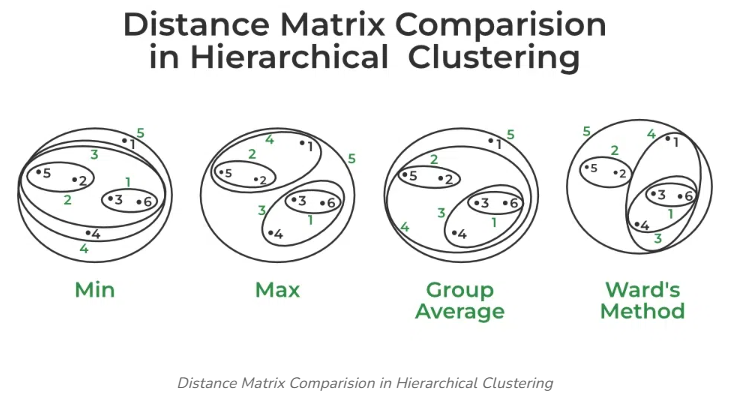

Görselin Kaynağı: https://www.geeksforgeeks.org/hierarchical-clustering/

Silhouette Skoru: 0.277
Davies-Bouldin Skoru: 1.419


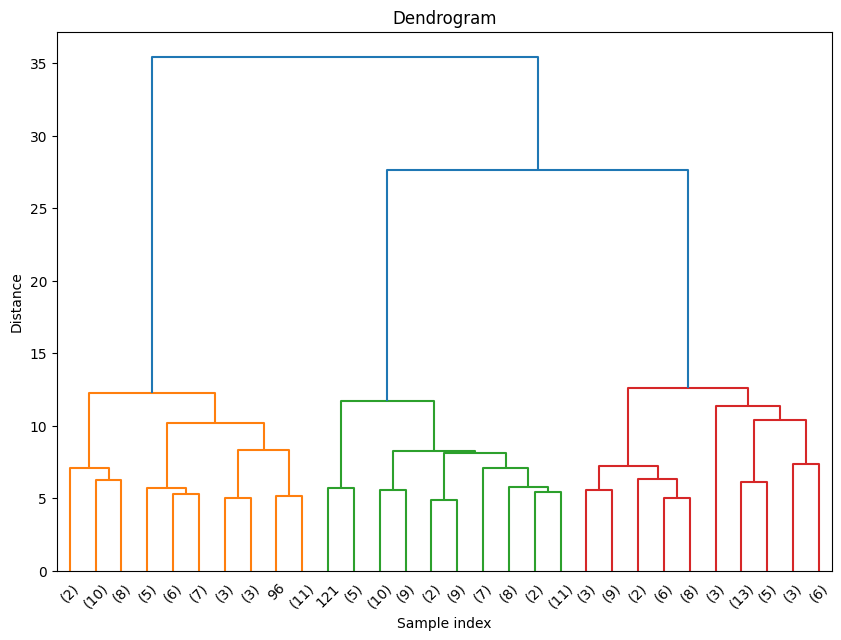

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Wine dataset'i yükleme
from sklearn.datasets import load_wine
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Veriyi ölçeklendirme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Hiyerarşik kümeleme
n_clusters = 3  # Elbow yöntemi ile belirlenebilir
model = AgglomerativeClustering(n_clusters=n_clusters,  linkage='ward')
clusters = model.fit_predict(scaled_data)

# Değerlendirme metrikleri
silhouette = silhouette_score(scaled_data, clusters)
davies = davies_bouldin_score(scaled_data, clusters)

print(f"Silhouette Skoru: {silhouette:.3f}")
print(f"Davies-Bouldin Skoru: {davies:.3f}")

# Dendrogram görselleştirme
linkage_matrix = linkage(scaled_data, method='ward')
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title("Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


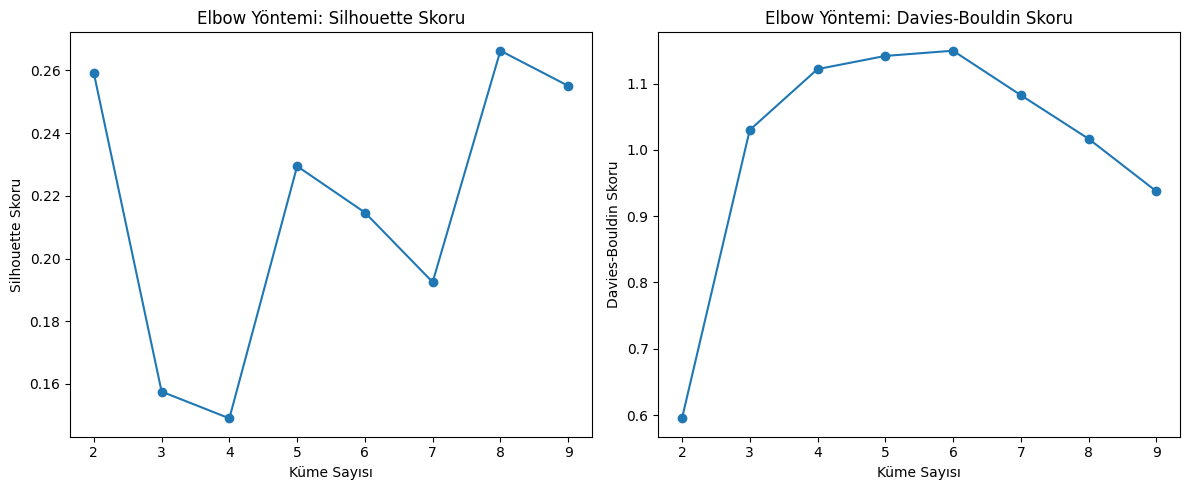

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Küme sayısına göre değerlendirme
range_n_clusters = range(2, 10)
silhouette_scores = []
davies_scores = []

for k in range_n_clusters:
    model = AgglomerativeClustering(n_clusters=k, linkage='average')
    clusters = model.fit_predict(scaled_data)

    sil_score = silhouette_score(scaled_data, clusters)
    db_score = davies_bouldin_score(scaled_data, clusters)

    silhouette_scores.append(sil_score)
    davies_scores.append(db_score)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Elbow Yöntemi: Silhouette Skoru")
plt.xlabel("Küme Sayısı")
plt.ylabel("Silhouette Skoru")

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, davies_scores, marker='o')
plt.title("Elbow Yöntemi: Davies-Bouldin Skoru")
plt.xlabel("Küme Sayısı")
plt.ylabel("Davies-Bouldin Skoru")

plt.tight_layout()
plt.show()


Silhouette Skoru: 0.259
Davies-Bouldin Skoru: 0.595


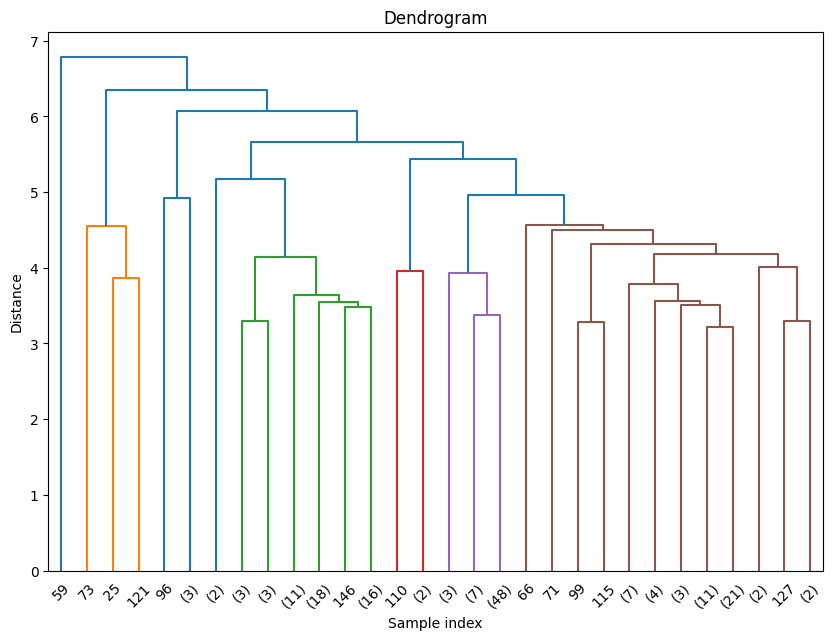

In [ ]:

# Wine dataset'i yükleme
from sklearn.datasets import load_wine
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Veriyi ölçeklendirme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Hiyerarşik kümeleme
n_clusters = 2  # Elbow yöntemi ile belirlenebilir
model = AgglomerativeClustering(n_clusters=n_clusters,  linkage='average')
clusters = model.fit_predict(scaled_data)

# Değerlendirme metrikleri
silhouette = silhouette_score(scaled_data, clusters)
davies = davies_bouldin_score(scaled_data, clusters)

print(f"Silhouette Skoru: {silhouette:.3f}")
print(f"Davies-Bouldin Skoru: {davies:.3f}")

# Dendrogram görselleştirme
linkage_matrix = linkage(scaled_data, method='average')
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title("Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

Silhouette Skoru: 0.162
Davies-Bouldin Skoru: 2.015


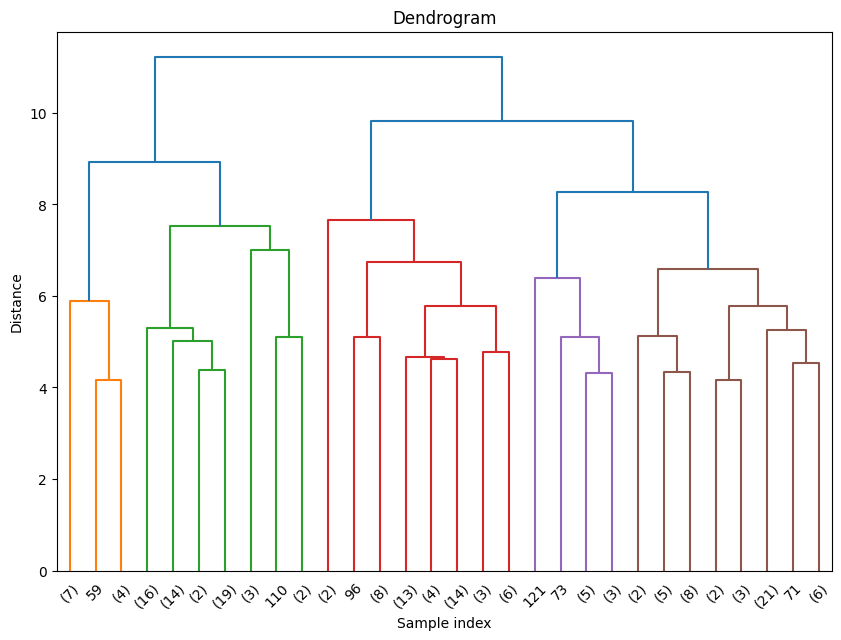

In [ ]:
# Wine dataset'i yükleme
from sklearn.datasets import load_wine
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Veriyi ölçeklendirme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Hiyerarşik kümeleme
n_clusters = 2  # Elbow yöntemi ile belirlenebilir
model = AgglomerativeClustering(n_clusters=n_clusters,  linkage='complete')
clusters = model.fit_predict(scaled_data)

# Değerlendirme metrikleri
silhouette = silhouette_score(scaled_data, clusters)
davies = davies_bouldin_score(scaled_data, clusters)

print(f"Silhouette Skoru: {silhouette:.3f}")
print(f"Davies-Bouldin Skoru: {davies:.3f}")

# Dendrogram görselleştirme
linkage_matrix = linkage(scaled_data, method='complete')
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title("Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

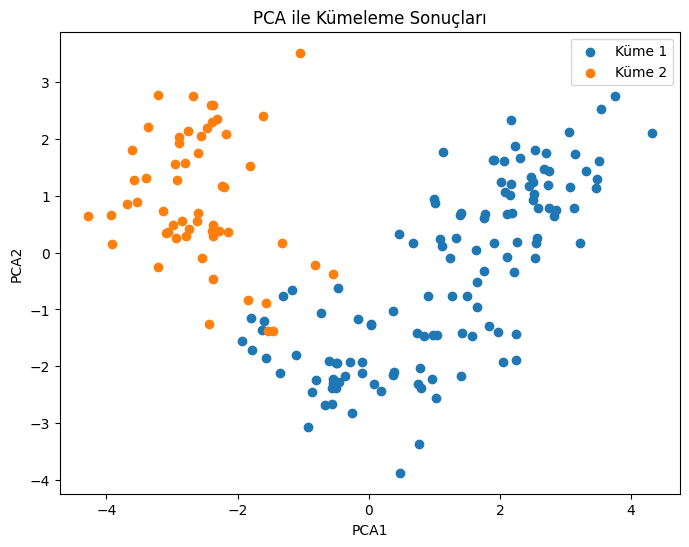

In [ ]:
from sklearn.decomposition import PCA

# PCA ile boyut indirgeme
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Küme görselleştirme
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = pca_data[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Küme {cluster+1}")

plt.title("PCA ile Kümeleme Sonuçları")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


# Sonuçların Yorumlanması

Yukarıda hiyerarşik kümeleme için yaptığımız kod çalışmalarını ve çıktılarını görüyorsunuz. Elbow yönetemi için yaptığımız kod çalışmasının çıktısından görülebileceği gibi en iyi sonuçlar 2 küme yapıldığı zaman çıkıyor diğer dirsek noktaları olan 4 ve 8 denenmiş ama sonuçlar elbow yöntemi çıktımızdan da görülebileceği gibi oldukça düşük çıkmıştır.

Yine 3 ayrı linkage yönteminin çıktısını da yukarıda göstermiş olduk şu anda datamıza en uygun olan linkage yöntemi en düşük Davies-Bouldin skorunu sağlayan "average" yöntemi olmuştur.

PCA sonucumuzdan da kümelerin net bir şekilde ayrılamadığını gözlemliyoruz.

# **DBSCAN KÜMELEME**


DBSCAN (Density-Based Spatial Clustering of Applications with Noise), yoğunluk tabanlı bir kümeleme algoritmasıdır. Bu yöntem, veri noktalarını yoğunluklarına göre gruplara ayırır.

**Neden DBSCAN?**

**Esnek Şekil:** DBSCAN, kümelerin herhangi bir şekle sahip olabilmesine izin verir. Bu, diğer yöntemlerin kümeleri genellikle küresel veya konveks şekillerle ayrıştırmasından dolayı önemli bir avantajdır.

**Gürültüye Tolerans:** DBSCAN, gürültüye (aykırı değerlere) karşı dayanıklıdır. Gürültü olarak sınıflandırılan noktalar, herhangi bir kümeye atanmaz.


**DBSCAN Nasıl Çalışır?**

**Parametreler**

**eps:** İki nokta arasındaki maksimum mesafeyi,

**MinPts:** Bir noktanın çekirdek nokta olabilmesi için gerekli minimum komşu sayısını tanımlar.

**Nokta Türleri**

**Çekirdek Nokta:** Eps mesafesi içinde en az MinPts sayıda komşusu olan nokta.

**Sınır Noktası:** Eps mesafesi içinde MinPts'den az komşusu olan, ancak bir çekirdek noktanın komşusu olan nokta.

**Gürültü:** Ne çekirdek nokta ne de sınır nokta olan nokta.

**Kümeleme Süreci**

Her nokta için eps mesafesi içindeki komşuları bulunur.

Çekirdek noktalar belirlenir.

Her çekirdek nokta için bir yeni küme oluşturulur.

Çekirdek noktanın yoğunluk-bağlantılı komşuları bulunarak aynı kümeye atanır.

Kalan ziyaret edilmemiş noktalar gürültü olarak kabul edilir.


# DBSCAN'in Güçlü ve Zayıf Yönleri

**Güçlü Yönler**

**Esnek Küme Şekilleri:** Küresel veya konveks şekillerle sınırlı değildir, herhangi bir şekle sahip kümeleri bulabilir.

**Gürültüye Dayanıklılık:** Veri setindeki aykırı değerleri (gürültüleri) kolayca tespit edip kümelerin dışına atabilir.

**Parametre Sayısı Az:** Sadece eps ve MinPts olmak üzere iki ana parametresi vardır.

**Zayıf Yönler:**

**Yoğunluk Değerinin Belirlenmesi:** Eps ve MinPts parametrelerinin doğru belirlenmesi, kümeleme sonuçlarını önemli ölçüde etkiler. Bu parametrelerin belirlenmesi için genellikle domain bilgisi veya deneme yanılma yöntemleri kullanılır.

**Varyasyonlar ve Genellemeler:** DBSCAN'in farklı veri dağılımları için performansını artırmak amacıyla birçok varyasyonu ve genellemesi geliştirilmiştir. Örneğin, OPTICS algoritması, DBSCAN'in bir uzantısı olup, yoğunluk tabanlı kümeleme konusunda daha fazla esneklik sağlar.

# DBSCAN'in Diğer Kümeleme Algoritmalarıyla Karşılaştırılması

**K-means vs DBSCAN**

K-means, küme merkezlerini belirleyerek veri noktalarını en yakın merkeze atanır. DBSCAN ise yoğunluğa dayalı bir yaklaşım kullanır. K-means, küresel şekilli kümeler için daha uygunken, DBSCAN farklı şekillerdeki kümeleri bulabilir.

**Hiyerarşik Kümeleme vs DBSCAN**

Hiyerarşik kümeleme, bir hiyerarşik ağaç yapısı oluşturarak kümeleri temsil eder. DBSCAN ise tek seviyeli bir kümeleme yöntemi kullanır. Hiyerarşik kümeleme, veri içerisindeki farklı seviyelerdeki kümeleri ortaya çıkarabilirken, DBSCAN daha basit bir yapıya sahiptir.

**DBSCAN'in Uygulama Alanları**

**Veri Madenciliği:** Büyük veri kümelerindeki kalıpları ve ilişkileri keşfetmek.

**Görüntü İşleme:** Görüntüdeki nesneleri segmentlemek ve sınıflandırmak.

**Coğrafi Bilgi Sistemleri:** Coğrafi verileri analiz etmek ve kümelemek.

**Biyoinformatik:** Genomik verileri analiz etmek ve biyolojik yapıları keşfetmek.

**Başka bir metrik tanıtalım**

# Mutlak Rand Skoru (Absolute Rand Score)

Mutlak Rand Skoru, iki farklı kümeleme sonucunun ne kadar uyumlu olduğunu ölçmek için kullanılan bir metriktir. Özellikle, bir kümeleme algoritmasının gerçek kümeleri ne kadar iyi yakaladığını değerlendirmek için sıkça kullanılır. Bu skor, 0 ile 1 arasında bir değer alır ve daha yüksek değerler daha iyi bir uyumu gösterir.

**Nasıl Çalışır?**

**Tüm olası çiftler:** Veri kümesindeki tüm noktaların olası çiftleri oluşturulur.

**Uyumlu çiftler:** Her çift için, iki farklı kümeleme sonucunda aynı kümede mi yoksa farklı kümelerde mi olduğu kontrol edilir.

**Uyumsuz çiftler:** Her çift için, bir kümeleme sonucunda aynı kümede olup diğerinde farklı kümelerde mi olduğu kontrol edilir.

**Rand İndeksi:** Uyumlu çiftlerin sayısının, tüm çiftlerin sayısına oranı olarak hesaplanır.

**Mutlak Rand Skoru** ise, Rand indeksinin daha iyi yorumlanabilmesi için 0 ile 1 arasında normalize edilmiş halidir.

**Neden Kullanılır?**

**Objektif Değerlendirme:** Subjektif değerlendirmelere yer bırakmadan, kümeleme sonuçlarının nicel olarak değerlendirilmesini sağlar.

**Karşılaştırma:** Farklı kümeleme algoritmalarının veya aynı algoritmanın farklı parametrelerle çalıştırılmasının sonuçlarını karşılaştırmak için kullanılır.

**Model Seçimi:** Birden fazla kümeleme modeli arasından en iyi performans göstereni seçmek için önemli bir metriktir.

**Değerlendirme**

**0.9 ve üzeri:** Çok iyi bir uyum, kümeleme algoritmasının gerçek kümeleri çok iyi yakaladığı anlamına gelir.

**0.8 - 0.9:** İyi bir uyum, kümeleme sonuçlarının genel olarak doğru olduğu söylenebilir.

**0.5'in altında:** Kötü bir uyum, kümeleme algoritmasının gerçek kümeleri yakalamada başarısız olduğu anlamına gelir.

**Örnek Kullanım Senaryosu**

1. Bir müşteri segmentasyon problemine iki farklı kümeleme algoritması (örneğin, K-means ve DBSCAN) uygulandı. Her iki algoritma da farklı sayıda küme oluşturdu. Mutlak Rand Skoru kullanılarak, hangi algoritmanın gerçek müşteri segmentlerini daha iyi yakaladığı belirlenebilir.

2. Bir görüntü segmentasyon problemine farklı parametrelerle çalışan bir görüntü segmentasyon algoritması uygulandı. Farklı parametrelerle elde edilen segmentasyon sonuçlarının, gerçek görüntüdeki nesneleri ne kadar iyi temsil ettiği Mutlak Rand Skoru ile değerlendirilebilir.

**Özetle**

Mutlak Rand Skoru, kümeleme sonuçlarının objektif bir şekilde değerlendirilmesi için kullanılan önemli bir metriktir. Özellikle, farklı kümeleme algoritmalarının veya aynı algoritmanın farklı parametrelerle çalıştırılmasının sonuçlarını karşılaştırmak için sıkça kullanılır. Bu metrik sayesinde, hangi kümeleme algoritmasının veya parametre setinin verilen veri için en uygun olduğu belirlenebilir.

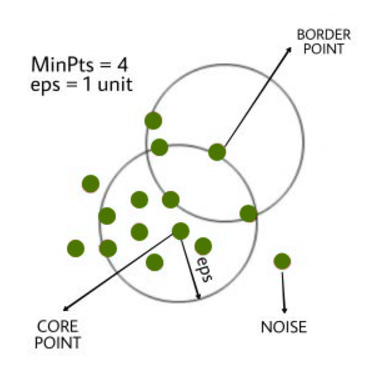

Görselin Kaynağı: https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Veri setini yükleyelim
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y_true = data.target

# eps ve min_samples için görselleştirme
eps_values = np.linspace(0.1, 5, 50)  # eps değerlerini tarayalım
min_samples_values = [2, 3, 5, 10]  # min_samples değerleri

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        # Kümeleme yapılabilirse silhouette skorunu hesapla
        if n_clusters > 1:
            silhouette = silhouette_score(X, labels)
        else:
            silhouette = None
        results.append((eps, min_samples, n_clusters, n_noise, silhouette))

# En iyi parametreyi seç
best_result = max(results, key=lambda x: x[4] if x[4] is not None else -1)
best_eps, best_min_samples, best_n_clusters, best_n_noise, best_silhouette = best_result

print(f"En iyi eps: {best_eps}, min_samples: {best_min_samples}")
print(f"Küme Sayısı: {best_n_clusters}, Gürültü Sayısı: {best_n_noise}, Silhouette Skoru: {best_silhouette}")



En iyi eps: 2.7, min_samples: 2
Küme Sayısı: 2, Gürültü Sayısı: 174, Silhouette Skoru: -0.2826352041026926


Datamız bu haliyle DBSCAN için uygun değil gördüğümüz gibi şimdi daha önce deneyip iyi sonuç elde ettiğimiz UMAP algoritmasıyla boyut azaltıp sonuçlarımızı değerlendirelim bir fark yaratabilir miyiz?

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


En iyi eps: 0.5, min_samples: 3
Silhouette Skoru: 0.6721152067184448
Davies-Bouldin Skoru: 0.4461781755096661
Adjusted Rand Skoru: 0.8024591068836742


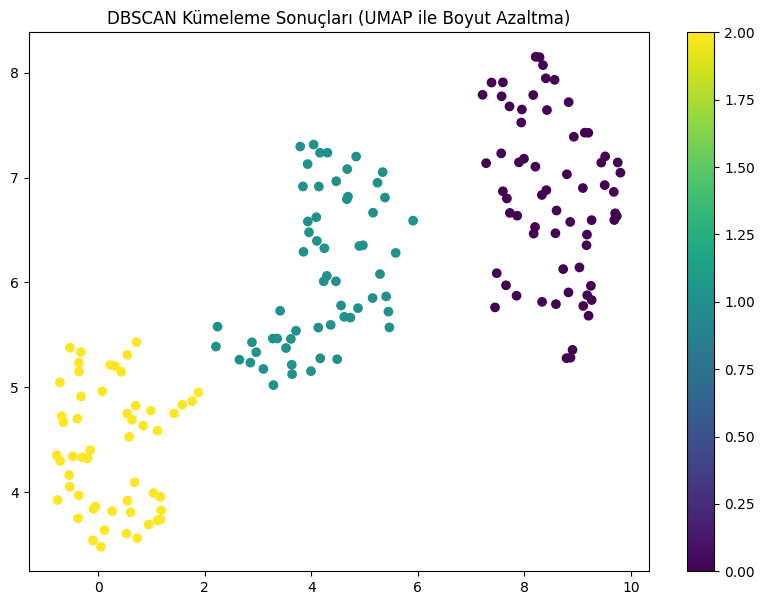

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import umap
import matplotlib.pyplot as plt

# Wine veri setini yükleyelim
data = load_wine()
X = data.data
y = data.target

# Veri ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP ile boyut azaltma (2 boyutlu hale getireceğiz)
umap_model = umap.UMAP(n_components=2, n_jobs=1)
X_umap = umap_model.fit_transform(X_scaled)

# DBSCAN parametrelerini belirleyelim
eps_values = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 2.0]
min_samples_values = [3, 5, 7]

best_silhouette = -1
best_davies_bouldin = np.inf
best_rand_score = -1
best_params = None

# Parametre optimizasyonu (Grid search yerine manuel bir kontrol)
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_umap)

        # Kümeleme sonuçlarını değerlendirelim
        if len(set(labels)) > 1:  # Tek küme olmaması durumunda
            silhouette = silhouette_score(X_umap, labels)
            davies_bouldin = davies_bouldin_score(X_umap, labels)
            rand_score = adjusted_rand_score(y, labels)

            # En iyi parametreyi kaydedelim
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_davies_bouldin = davies_bouldin
                best_rand_score = rand_score
                best_params = (eps, min_samples)

# Sonuçları yazdıralım
print(f"En iyi eps: {best_params[0]}, min_samples: {best_params[1]}")
print(f"Silhouette Skoru: {best_silhouette}")
print(f"Davies-Bouldin Skoru: {best_davies_bouldin}")
print(f"Adjusted Rand Skoru: {best_rand_score}")

# Kümeleme sonuçlarını görselleştirelim
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
labels = dbscan.fit_predict(X_umap)

plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap="viridis")
plt.title("DBSCAN Kümeleme Sonuçları (UMAP ile Boyut Azaltma)")
plt.colorbar()
plt.show()


# Sonucu yorumlayalım;

Daha önce K-means çalışmamızda da kullanıp başarılı olduğumuz UMAP ile boyut azalttığımızda sonuçların oldukça etkileyici olduğunu görüyoruz. Önce -0.28 çıkan Silhouette skorumuz UMAP sonrasında şimdiye kadar aldığımız en iyi sonucu vererek 0.67'ye ulaştı. Silhouette sonucunun yorumlamasını yaparken daha yüksek sonuçların daha başarılı kümeleme anlamına geldiğini öğrenmiştik. -1'e yaklaşan sonuçlar yanlış kümelemeyi, +1'e yaklaşan her değer de iyi kümeleme göstergesiydi buradan DBSCAN algoritmasının gücünü görebiliriz. Davies-Bouldin sonucu DBSCAN için çok önemli bir gösterge olmasa da o da 0.446 gibi düşük bir düzeyde çıkarak kümelerimizin kalitesini göstermiştir. Bu algoritma için yeni eklediğim metrik olan Rand skoru ise 0.8-0.9 arasındayken iyi uyumu göstermektedir sonucumuz 0.802 çıkarak uyumun iyi düzeyde olduğunu nicel olarak göstermiştir.

Bazen data ham haliyle algoritmamıza uymayabilir o zaman çeşitli yöntemleri uygulayarak veriyi daha uygun ve kullanılabilir duruma getirebiliyoruz. Gerçek hayat verileri ile çalışırken bu gibi durumlarla oldukça sık karşılaşıyoruz böyle bir örnekle iyi bir bakış açısı kazanabildiğimizi umuyorum.

# DBSCAN ve Davies-Bouldin Skoru

DBSCAN'ın Özellikleri neydi bir hatırlayalım;

Yoğunluk tabanlı bir algoritma olduğu için, kümelerin şekli ve boyutu önceden belirlenmez.

Gürültüye karşı dayanıklıdır.

Küme sayısı önceden belirlenmez, veriye göre otomatik olarak hesaplanır.

Bu özellikler Davies-Bouldin Skorunun DBSCAN kümelemede kullanılmasını zorlaştırır. Yorumlar yapılırken dikkat edilmesi gerekir.


**Davies-Bouldin Skoru ve DBSCAN**

**Gürültü Noktaları:** DBSCAN'de gürültü olarak sınıflandırılan noktalar, herhangi bir kümeye ait olmadığından Davies-Bouldin skorunun hesaplanmasında genellikle göz ardı edilir.

**Küme Merkezleri:** Davies-Bouldin skoru, küme merkezleri arasındaki uzaklığa dayanır. DBSCAN'de ise belirgin küme merkezleri olmayabilir. Bu durumda, kümelerin yoğunluk merkezleri veya kümedeki noktaların ortalaması gibi alternatif ölçütler kullanılabilir.

**Küme Sayısı:** DBSCAN'de küme sayısı otomatik olarak belirlendiği için, Davies-Bouldin skorunu kullanarak optimal küme sayısını bulma amacı güden diğer algoritmalardaki kadar önemli değildir.

## DBSCAN'da Davies-Bouldin Skorunu Kullanmanın Avantajları ve Dezavantajları

**Avantajlar**

Kümelemenin genel kalitesini değerlendirmeye yardımcı olur.

Farklı kümeleme algoritmalarının sonuçlarını karşılaştırmak için kullanılabilir.

**Dezavantajlar**

DBSCAN'in doğal yapısıyla tam olarak uyumlu olmayabilir.

Gürültü noktaları ve belirsiz küme merkezleri gibi durumlarda ek düzenlemeler gerektirebilir.

# **OPTICS Clustering ( OPTICS Kümeleme )**


OPTICS (Ordering Points To Identify the Clustering Structure), yoğunluk tabanlı bir kümeleme algoritmasıdır. DBSCAN'a benzer şekilde, veri noktalarının yoğunluklarına göre kümeler oluşturur. Ancak, DBSCAN'dan farklı olarak, farklı yoğunluklarda ve şekillerdeki kümeleri de tespit edebilir. Bu nedenle, özellikle büyük ve yüksek boyutlu veri setlerinde etkilidir.

## OPTICS Algoritmasının Temel Fikirleri

**Yoğunluk-Bağlantılı Noktalar:** Algoritma, veri setindeki yoğunluk-bağlantılı noktaları belirleyerek küme yapısını ortaya çıkarır.

**Erişilebilirlik Uzaklığı:** Her veri noktası için bir erişilebilirlik uzaklığı hesaplanır. Bu uzaklık, bir noktaya diğer noktalardan ulaşmanın ne kadar zor olduğunu ölçer.

**Erişilebilirlik Grafiği:** Erişilebilirlik uzaklıklarına göre noktalar sıralanır ve erişilebilirlik grafiği oluşturulur. Bu grafik, kümelerin hiyerarşik yapısını gösterir.

## OPTICS Algoritmasının Adımları

**Yoğunluk Eşiğinin Belirlenmesi:** Bir yoğunluk eşiği (Eps) belirlenir. Bu eşik, bir noktanın core point olarak kabul edilebilmesi için gerekli olan minimum komşu sayısını belirler.

**Komşuluk Uzaklıklarının Hesaplanması:** Her nokta için en yakın komşularının uzaklıkları hesaplanır.

**Erişilebilirlik Uzaklıklarının Hesaplanması:** Her nokta için, diğer noktalara ulaşmanın ne kadar zor olduğu hesaplanır.

**Erişilebilirlik Grafiğinin Oluşturulması:** Noktalar, erişilebilirlik uzaklıklarına göre sıralanır ve bir grafik oluşturulur.

**Kümelerin Belirlenmesi:** Erişilebilirlik grafiği üzerinde belirli bir kesik noktası seçilerek kümeler belirlenir.

##OPTICS'in Avantajları

**Farklı Yoğunluklu Kümeler:** Farklı yoğunluklarda ve şekillerdeki kümeleri tespit edebilir.

**Hiyerarşik Yapı:** Veri setinin hiyerarşik yapısını ortaya çıkarır.

**Gürültüye Dayanıklılık:** Gürültülü verilere karşı daha dayanıklıdır.

**Esneklik:** Küme sayısının önceden belirlenmesine gerek yoktur.

##OPTICS'in Dezavantajları

**Hesaplama Maliyeti:** Büyük veri setleri için hesaplama maliyeti yüksek olabilir.

**Parametre Seçimi:** Eps ve MinPts parametrelerinin uygun şekilde seçilmesi önemlidir.

**Erişilebilirlik grafiğinin yorumlanması:** Erişilebilirlik grafiğinin yorumlanması karmaşık olabilir.

Kısacası, OPTICS, özellikle büyük ve karmaşık veri setlerinde, güçlü bir kümeleme algoritmasıdır. Farklı yoğunluklu kümeleri tespit etme ve hiyerarşik yapıları ortaya çıkarma yeteneği, birçok uygulamada kullanılmasını sağlar.


###OPTICS'in Temel Kavramlarının Daha Derinlemesine İncelenmesi

**Core Point:** Bir noktanın core point olarak kabul edilebilmesi için, belirlenen bir yarıçap içinde minimum sayıda komşuya sahip olması gerekir. Bu yarıçap, Eps parametresi ile belirlenir. Core pointler, kümelerin çekirdeklerini oluştururlar.

**Reachability Distance:** Bir noktadan diğer bir noktaya ulaşmanın zorluğunu ifade eder. Bu uzaklık, iki nokta arasındaki fiziksel uzaklık ve hedef noktanın core point olup olmamasına bağlıdır.

**Ordering:** OPTICS algoritması, noktaları erişilebilirlik uzaklıklarına göre sıralar. Bu sıralama, bir erişilebilirlik grafiği olarak görselleştirilebilir. Bu grafik, kümelerin hiyerarşik yapısını gösterir.

##OPTICS vs DBSCAN

**Küme Sayısı:** DBSCAN, küme sayısını önceden belirlerken, OPTICS, veri setinin doğal yapısına göre küme sayısını belirler.

**Gürültüye Dayanıklılık:** Her iki algoritma da gürültülü verilere karşı dayanıklıdır ancak OPTICS, farklı yoğunluklardaki kümeleri daha iyi tespit edebilir.

**Hiyerarşik Yapı:** OPTICS, hiyerarşik bir kümeleme yapısı oluştururken, DBSCAN tek seviyeli bir kümeleme yapar.


##OPTICS'in Uygulama Alanları

**Veri Madenciliği:** Büyük ve karmaşık veri setlerinde gizli kalmış bilgiyi ortaya çıkarmak için kullanılır.

**Görüntü İşleme:** Görüntülerdeki nesneleri ve bölgeleri tespit etmek için kullanılır.

**Biyoinformatik:** Genomik verileri analiz etmek için kullanılır.

**Coğrafi Bilgi Sistemleri:** Coğrafi verileri kümelemek için kullanılır.

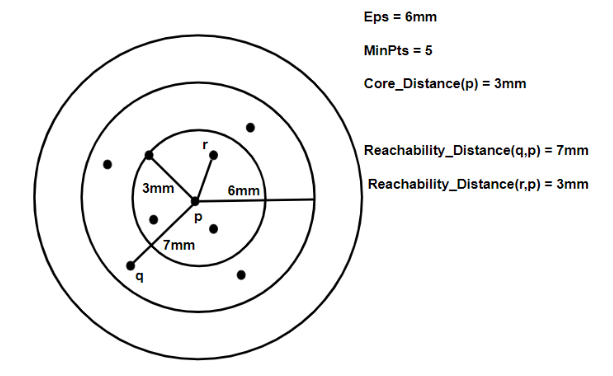

Görselin Kaynağı: https://www.geeksforgeeks.org/ml-optics-clustering-explanation/

# Python ile OPTICS Kümeleme uygulaması

In [ ]:
from sklearn.cluster import OPTICS
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import numpy as np

# Veriyi yükleme ve standardizasyon
wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# OPTICS ile kümeleme
optics_model = OPTICS(min_samples=5, metric='minkowski', xi=0.05, min_cluster_size=0.1)
optics_model.fit(X_scaled)

# Kümeleme sonuçları
labels = optics_model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Küme Sayısı: {n_clusters}")
print(f"Gürültü Noktası Sayısı: {n_noise}")

# Silhouette ve Davies-Bouldin skorları
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    print(f"Silhouette Skoru: {silhouette_avg}")
    print(f"Davies-Bouldin Skoru: {db_score}")
else:
    print("Yetersiz küme sayısı, skorlar hesaplanamadı.")


Küme Sayısı: 1
Gürültü Noktası Sayısı: 137
Yetersiz küme sayısı, skorlar hesaplanamadı.


Sonuç böyle çıkınca parametrelerden en iyisi hangisi neler yapabiliriz diye düşünmemiz gerekiyor. Şimdi öncelikle uzaklık ölçüm şekillerini değerlendirelim.

In [ ]:
metrics = ['euclidean', 'manhattan', 'cosine']

for metric in metrics:
    optics_model = OPTICS(min_samples=5, metric=metric, xi=0.05, min_cluster_size=0.1)
    optics_model.fit(X_scaled)
    labels = optics_model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        silhouette_avg = silhouette_score(X_scaled, labels)
        print(f"Metric: {metric}, Küme Sayısı: {n_clusters}, Silhouette Skoru: {silhouette_avg}")
    else:
        print(f"Metric: {metric}, Yetersiz küme sayısı.")


Metric: euclidean, Yetersiz küme sayısı.
Metric: manhattan, Yetersiz küme sayısı.
Metric: cosine, Küme Sayısı: 2, Silhouette Skoru: 0.15038833982451325


Gördüğümüz gibi en iyi hatta tek çalışan uzaklık ölçümünün "cosine" olduğunu gördük şimdi onu deneyerek tekrar çalıştıralım.

In [ ]:
from sklearn.cluster import OPTICS
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import numpy as np

# Veriyi yükleme ve standardizasyon
wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# OPTICS ile kümeleme
optics_model = OPTICS(min_samples=5, metric='cosine', xi=0.05, min_cluster_size=0.1)
optics_model.fit(X_scaled)

# Kümeleme sonuçları
labels = optics_model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Küme Sayısı: {n_clusters}")
print(f"Gürültü Noktası Sayısı: {n_noise}")

# Silhouette ve Davies-Bouldin skorları
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    print(f"Silhouette Skoru: {silhouette_avg}")
    print(f"Davies-Bouldin Skoru: {db_score}")
else:
    print("Yetersiz küme sayısı, skorlar hesaplanamadı.")

Küme Sayısı: 2
Gürültü Noktası Sayısı: 109
Silhouette Skoru: 0.15038833982451325
Davies-Bouldin Skoru: 1.4474560679395498


En azından bir değer eldebildik şimdi bir de en iyi parametreleri araştıralım.

In [ ]:
from sklearn.model_selection import ParameterGrid

# Parametre aralığı
param_grid = {
    'min_samples': [3, 5, 10],
    'xi': [0.01, 0.05, 0.1],
    'min_cluster_size': [0.05, 0.1, 0.2]
}

best_silhouette = -1
best_params = None

for params in ParameterGrid(param_grid):
    optics_model = OPTICS(min_samples=params['min_samples'], xi=params['xi'], min_cluster_size=params['min_cluster_size'])
    optics_model.fit(X_scaled)
    labels = optics_model.labels_

    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(X_scaled, labels)
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_params = params

print(f"En iyi parametreler: {best_params}")
print(f"En iyi Silhouette Skoru: {best_silhouette}")


En iyi parametreler: {'min_cluster_size': 0.1, 'min_samples': 3, 'xi': 0.05}
En iyi Silhouette Skoru: 0.22767118515944754


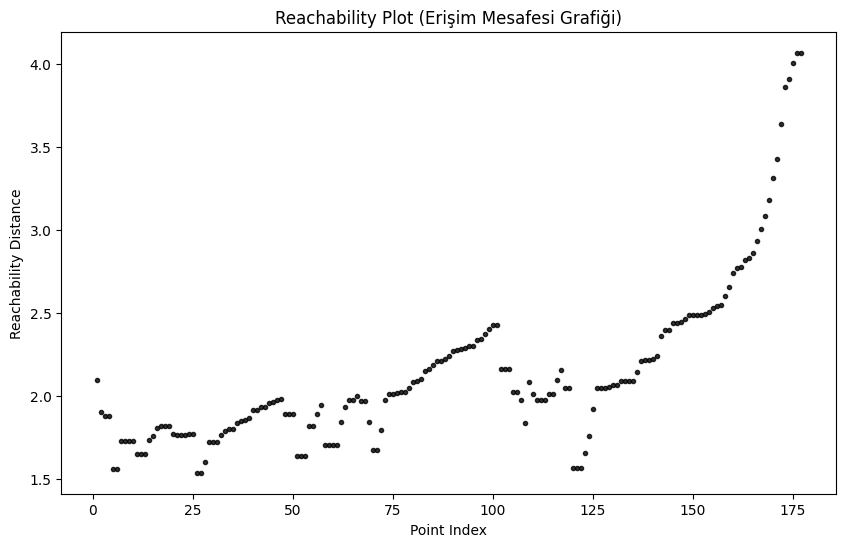

In [ ]:
import matplotlib.pyplot as plt

# Reachability grafiği
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]

plt.figure(figsize=(10, 6))
plt.plot(range(len(reachability)), reachability, 'k.', alpha=0.8)
plt.title("Reachability Plot (Erişim Mesafesi Grafiği)")
plt.ylabel("Reachability Distance")
plt.xlabel("Point Index")
plt.show()


Bu Reachability Distance grafiği "euclidian" uzaklığına ait bir çıktı buna göre 4 ya da daha fazla küme çıkması bekleniyor. Şu anda burada görmüyormuyorsunuz ama ben de parametrelerle oynarken 4-5 küme ve oldukça düşük başarı metrikleri verdi.

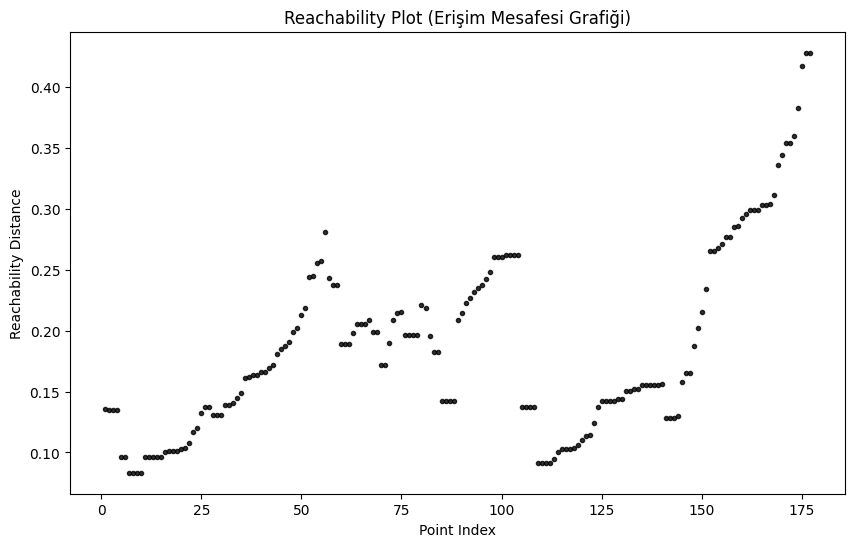

In [ ]:
import matplotlib.pyplot as plt

# Reachability grafiği
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]

plt.figure(figsize=(10, 6))
plt.plot(range(len(reachability)), reachability, 'k.', alpha=0.8)
plt.title("Reachability Plot (Erişim Mesafesi Grafiği)")
plt.ylabel("Reachability Distance")
plt.xlabel("Point Index")
plt.show()

Bu çıktı da "cosine" ile çalıştırdığımdaki Reachability Distance grafiği buradan 3 küme ile ilgili bir çıktı vermiş. Peki nasıl yorumluyoruz;

Reachability Plot (Erişim Mesafesi Grafiği), OPTICS algoritmasının sonuçlarını görselleştirmek için kullanılır ve verideki kümeleri tanımlamanıza yardımcı olur. Grafiğin yorumlanması şu şekilde yapılabilir:

##1. Yüksek ve Düşük Düzeyler

**Alçak Bölgeler:** Noktalar arasındaki mesafenin düşük olduğu, yani kümelerin bulunduğu bölgeleri temsil eder. Bu, veri noktalarının birbirine yakın olduğu anlamına gelir.

**Yüksek Bölgeler:** Gürültü veya kümeler arası boşlukları ifade eder. Noktalar arasındaki mesafeler büyür, bu yüzden erişim mesafesi artar.

##2. Kümeleri Tanımlama

Grafikteki vadi bölgeleri (düşüşler), kümeleri gösterir. Her bir vadi, bir küme anlamına gelir.

Zirve bölgeleri (yükselişler), kümeler arası boşlukları veya gürültüyü işaret eder.


##3. Gürültü

Çok yüksek erişim mesafesine sahip noktalar (grafiğin sağ uçlarındaki dik çıkışlar) genellikle gürültü noktalarını temsil eder.

Peki bu sonuçlarla yetiniyor muyuz yapabileceğimiz bir şey kalmadı mı derseniz var elbette daha önce deneyip başarılı olduğumuz UMAP ile boyut düşürmeyi deneyelim.

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00


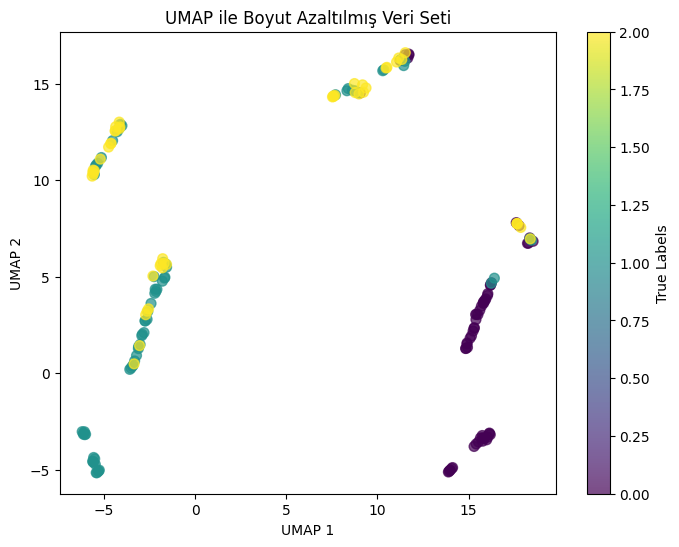

Küme Sayısı: 4
Gürültü Noktası Sayısı: 51
Silhouette Skoru: 0.4444883167743683
Davies-Bouldin Skoru: 1.1321010805913978
Adjusted Rand Skoru: 0.16949429336087013


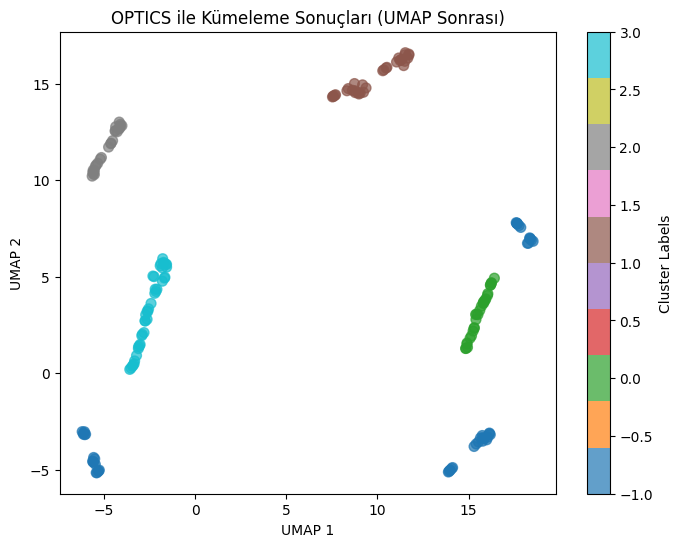

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import umap
import matplotlib.pyplot as plt

# Veri setini yükle
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

# UMAP ile boyut azaltımı
umap_reducer = umap.UMAP(n_neighbors=7, min_dist=0.1, n_components=2, n_jobs=1)
X_umap = umap_reducer.fit_transform(X)

# UMAP sonuçlarını görselleştir
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='True Labels')
plt.title("UMAP ile Boyut Azaltılmış Veri Seti")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

# OPTICS algoritmasını uygula
optics = OPTICS(min_samples=7, xi=0.1, min_cluster_size=0.15)
optics.fit(X_umap)

# Küme etiketlerini al
labels = optics.labels_

# Küme ve gürültü sayısını hesapla
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise = list(labels).count(-1)
print(f"Küme Sayısı: {num_clusters}")
print(f"Gürültü Noktası Sayısı: {num_noise}")

# Performans metriklerini hesapla
if num_clusters > 1:
    silhouette = silhouette_score(X_umap, labels)
    davies_bouldin = davies_bouldin_score(X_umap, labels)
    rand_score = adjusted_rand_score(y, labels)
    print(f"Silhouette Skoru: {silhouette}")
    print(f"Davies-Bouldin Skoru: {davies_bouldin}")
    print(f"Adjusted Rand Skoru: {rand_score}")
else:
    print("Yetersiz küme sayısı, skorlar hesaplanamadı.")

# Kümeleme sonuçlarını görselleştir
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=50, alpha=0.7)
plt.colorbar(label='Cluster Labels')
plt.title("OPTICS ile Kümeleme Sonuçları (UMAP Sonrası)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


Gördüğümüz gibi sonuçlar gridSearch ile aldığımızdan daha iyi çıktı daha da iyileştirilebilir sizler de farklı parametreler ve yöntemler deneyebilirsiniz böylece parametrelerin algoritmaya etkisini ve sonuçları yorumlamayı daha iyi öğrenebilirsiniz.

# **HDBSCAN CLUSTERING ( HDBSCAN KÜMELEME )**


HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise), yoğunluk tabanlı bir kümeleme algoritmasıdır. Diğer kümeleme yöntemlerinden farklı olarak, veri noktalarının yoğunluk dağılımına dayanarak kümeleri belirler. Bu, HDBSCAN'ın farklı yoğunluk ve şekillerdeki kümeleri tespit etmesini sağlar.

##HDBSCAN Nasıl Çalışır?

**Yoğunluk-Tabanlı Hiyerarşi:** HDBSCAN, öncelikle veri noktalarının yoğunluklarına göre bir hiyerarşik yapı oluşturur. Yoğunluğa bağlı olarak veri noktaları birbirine bağlanır ve kümeler oluşturulur.

**Küme Seçimi:** Algoritma, hiyerarşik yapıdan en kararlı kümeleri seçer. Bu, farklı hiyerarşik seviyelerde tutarlı kalan kümelerdir.

**Gürültü Tespiti:** Düşük yoğunluklu veya herhangi bir kümeye ait olmayan noktalar gürültü olarak kabul edilir.

##HDBSCAN'ın Avantajları

**Fleksibilite:** Önceden belirlenmiş bir küme sayısına ihtiyaç duymaz.

**Gürültüye Dayanıklılık:** Gürültülü verilere karşı daha dayanıklıdır.

**Karmaşık Yapılar:** Farklı şekil ve boyutlardaki kümeleri tespit edebilir.

**Hiyerarşik Yapı:** Veri setinin hiyerarşik yapısını ortaya çıkarır.

###HDBSCAN'ın Parametreleri Nelerdir?

**min_cluster_size:** Bir kümenin minimum nokta sayısı.

**min_samples:** Bir noktanın core point olabilmesi için gereken minimum komşu sayısı.

**cluster_selection_epsilon:** Küme seçiminde kullanılan bir parametre.

**metric:** Uzaklık ölçümü (Euclidean, Manhattan, vb.)

**cluster_selection_method:** Küme seçimi yöntemi (eom, leaf, leaf-dm, flat)

**alpha:** Birleştirme kriterini etkileyen bir parametre.

**gen_min_span_tree:** Minimum yayılım ağacının oluşturulup oluşturulmayacağı.

**metric_params:** Metrik fonksiyonuna ek parametreler.

**algorithm:** Uzaklık hesaplama algoritması.

**core_distance_n_jobs:** Core distance hesaplaması için paralel iş sayısı.

**allow_single_cluster:** Tek küme çıkışına izin verilip verilmeyeceği.


HDBSCAN, özellikle karmaşık veri setleri ve farklı yoğunluklu kümeler için güçlü bir kümeleme algoritmasıdır. Veri setinin doğal yapısına uyum sağlayarak daha anlamlı sonuçlar elde edebilirsiniz. Ancak, parametrelerin doğru ayarlanması ve algoritmanın doğru kullanılması önemlidir.


##HDBSCAN'in Temel Kavramları

**Yoğunluk Temelli Kümeleme:** HDBSCAN, veri noktalarının yoğunluklarına göre kümeler oluşturur. Yoğun bölgelerdeki noktalar aynı kümeye atanırken, seyrek bölgelerdeki noktalar gürültü olarak kabul edilir.

**Hiyerarşik Kümeleme:** HDBSCAN, bir hiyerarşik küme yapısı oluşturur. Bu, farklı yoğunluk seviyelerinde kümeleri görmemizi sağlar.

**Minimum Spanning Tree:** HDBSCAN, bir minimum yayılım ağacı (MST) oluşturur. Bu ağaç, veri noktaları arasındaki en kısa yolları gösterir ve kümelerin belirlenmesinde kullanılır.

##HDBSCAN'in Diğer Algoritmalarla Karşılaştırması

**DBSCAN:** HDBSCAN, DBSCAN'ın geliştirilmiş bir versiyonudur. DBSCAN tek bir yoğunluk eşiği kullanırken, HDBSCAN farklı yoğunluk seviyelerindeki kümeleri tespit edebilir.

**K-means:** K-means, küme sayısını önceden belirlerken, HDBSCAN veri setinin yapısına göre otomatik olarak küme sayısını belirler.

**Hiyerarşik Kümeleme (Aglomeratif):** HDBSCAN, hiyerarşik kümelemenin yoğunluk tabanlı bir versiyonudur. Aglomeratif kümeleme ise genellikle uzaklık matrisi üzerinde çalışır.

##HDBSCAN'in Uygulama Alanları

**Veri Madenciliği:** Büyük ve karmaşık veri setlerinde gizli kalmış bilgiyi ortaya çıkarmak için kullanılır.

**Görüntü İşleme:** Görüntülerdeki nesneleri ve bölgeleri tespit etmek için kullanılır.

**Biyoinformatik:** Genomik verileri analiz etmek için kullanılır.

**Coğrafi Bilgi Sistemleri:** Coğrafi verileri kümelemek için kullanılır.

**Anomali Tespiti:** Aykırı değerleri tespit etmek için kullanılabilir.

###HDBSCAN'in Parametrelerinin Etkisi

**min_cluster_size:** Bu parametre, bir kümenin minimum boyutunu belirler. Küçük bir değer daha fazla sayıda küçük küme oluştururken, büyük bir değer daha az sayıda büyük küme oluşturur.

**min_samples:** Bir noktanın core point olabilmesi için gereken minimum komşu sayısıdır. Bu parametre, yoğunluk tanımını etkiler.

**cluster_selection_method:** Bu parametre, hiyerarşik yapıdan hangi kümelerin seçileceğini belirler. Farklı yöntemler farklı sonuçlar verebilir.

###HDBSCAN'in Sınırlamaları

**Hesaplama Maliyeti:** Büyük veri setleri için hesaplama maliyeti yüksek olabilir.

**Parametre Ayarlama:** Parametrelerin doğru ayarlanması, sonuçları önemli ölçüde etkiler.

**Karmaşıklık:** Algoritmanın çalışma prensibi diğer bazı algoritmalara göre daha karmaşıktır.

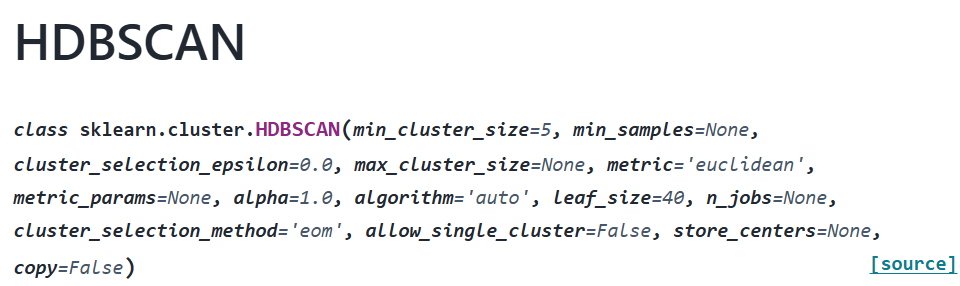

Görselin Kaynağı: https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.HDBSCAN.html

HDBSCAN Algoritmasının varsayılan ayarları yukarıdaki gibidir.

##**HDBSCAN Algoritmasının Python Uygulaması**

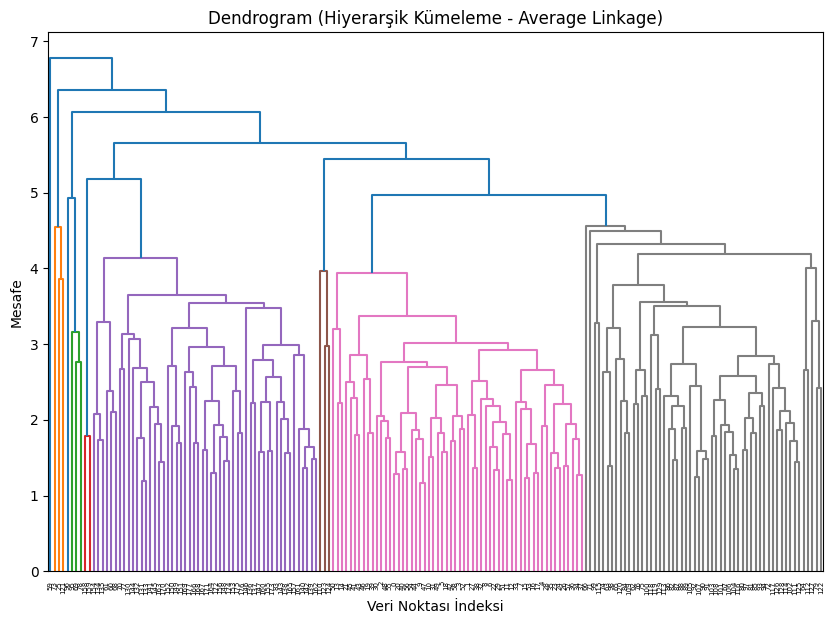

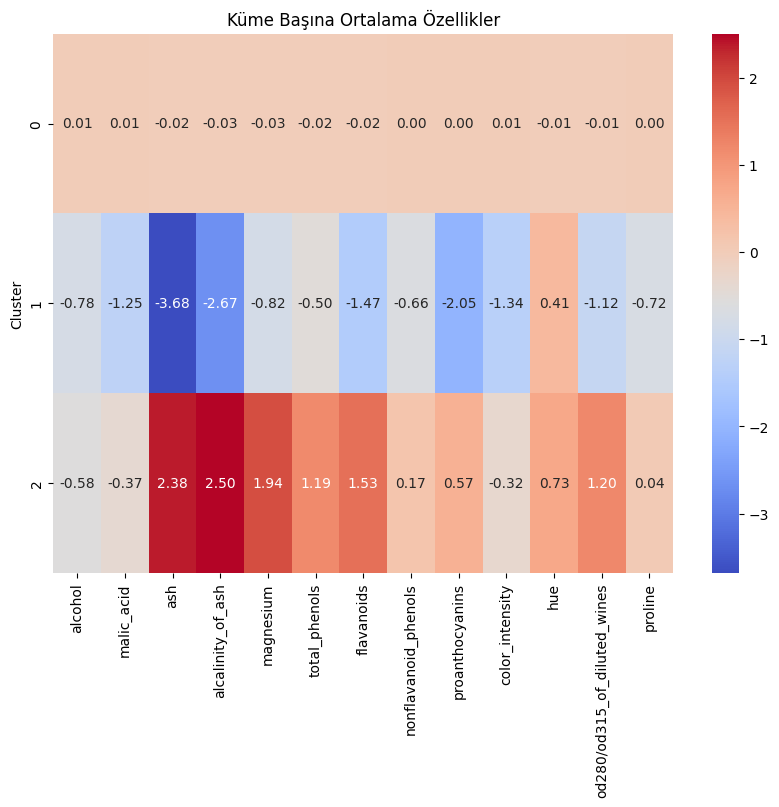

V-Measure Skoru: 0.018440033486976228
Küme Sayısı: 3
Gürültü Noktası Sayısı: 0
Silhouette Skoru: 0.15752526243774145
Davies-Bouldin Skoru: 1.029890223800151
Adjusted Rand Skoru: -0.005441973296580639


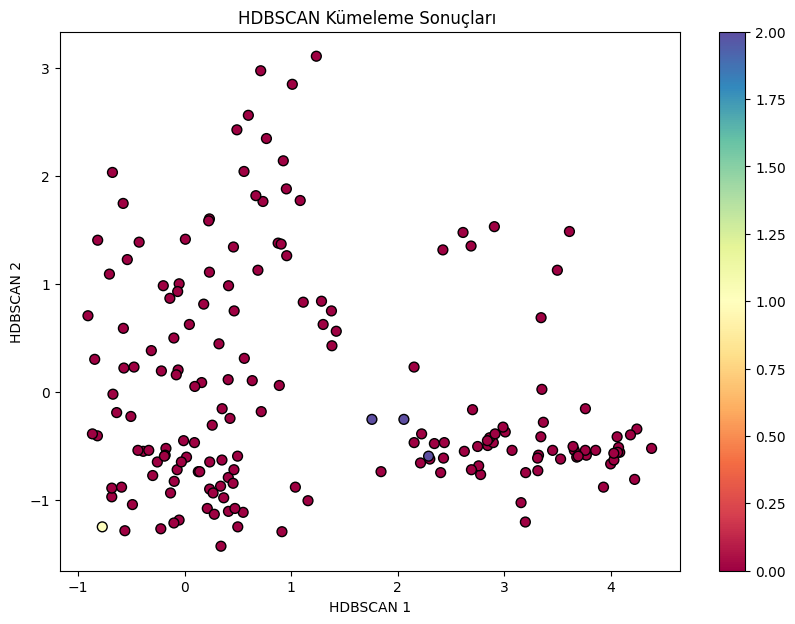

In [ ]:
# Gerekli kütüphaneler
from sklearn.metrics import v_measure_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Wine veri setini yükle
wine = load_wine()
X = wine.data
y = wine.target

# Veriyi standardize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hiyerarşik kümeleme ile average linkage kullanarak kümeleme
linked = linkage(X_scaled, method='average')

# Dendrogram görselleştirmesi
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram (Hiyerarşik Kümeleme - Average Linkage)')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Mesafe')
plt.show()

# Hiyerarşik kümeleme modelini oluştur
hc = AgglomerativeClustering(n_clusters=3, linkage='average')
y_hc = hc.fit_predict(X_scaled)

# Kümeleme sonuçları ile heatmap oluşturma
df = pd.DataFrame(X_scaled, columns=wine.feature_names)
df['Cluster'] = y_hc

# Küme başına ortalama değerleri alalım
cluster_means = df.groupby('Cluster').mean()

# Heatmap oluştur
plt.figure(figsize=(10, 7))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Küme Başına Ortalama Özellikler')
plt.show()

# V-Measure hesaplama
v_measure = v_measure_score(y, y_hc)
print(f'V-Measure Skoru: {v_measure}')

# 5. Kümeleme Sonuçları
n_clusters = len(set(y_hc)) - (1 if -1 in y_hc else 0)  # Gürültü hariç küme sayısı
n_noise = list(y_hc).count(-1)  # Gürültü noktaları

# 6. Kümeleme Değerlendirmeleri
# Silhouette Skoru (Yalnızca Küme sayısı >= 2 olduğunda hesaplanabilir)
silhouette_avg = -1
if n_clusters >= 2:
    silhouette_avg = silhouette_score(X_scaled, y_hc)

# Davies-Bouldin Skoru
db_score = davies_bouldin_score(X_scaled, y_hc)

# Adjusted Rand Skoru
rand_score = adjusted_rand_score(y, y_hc)

# 7. Sonuçların Yazdırılması
print(f"Küme Sayısı: {n_clusters}")
print(f"Gürültü Noktası Sayısı: {n_noise}")
print(f"Silhouette Skoru: {silhouette_avg}")
print(f"Davies-Bouldin Skoru: {db_score}")
print(f"Adjusted Rand Skoru: {rand_score}")

# 8. HDBSCAN Kümeleme Sonuçları Görselleştirme
plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_scaled[:, 1], c=y_hc, cmap='Spectral', s=50, edgecolor='k')
plt.title('HDBSCAN Kümeleme Sonuçları ')
plt.xlabel('HDBSCAN 1')
plt.ylabel('HDBSCAN 2')
plt.colorbar()
plt.show()



Gördüğümüz gibi sonuçlarımız oldukça kötü çıktı bu durumda daha önce kullanıp iyi sonuçlar elde ettiğimiz UMAP ile boyut azaltalım.

In [ ]:
!pip install hdbscan umap-learn scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.6 MB/s eta 0:00:00


Küme Sayısı: 3
Gürültü Noktası Sayısı: 1
Silhouette Skoru: 0.45630979537963867
Davies-Bouldin Skoru: 0.517140989584408
Adjusted Rand Skoru: 0.7936397893619802


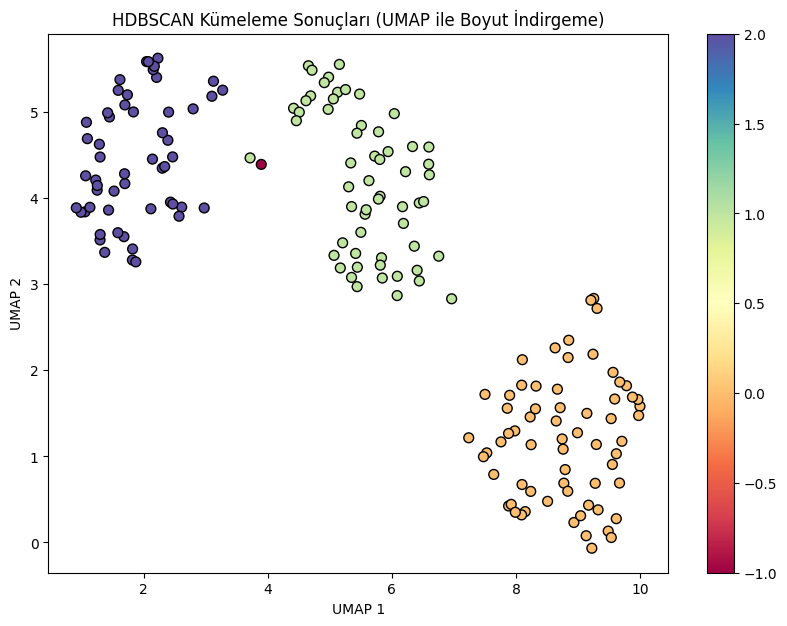

In [ ]:
import numpy as np
import pandas as pd
import umap
import hdbscan
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Wine Dataset Yükleme ve Hazırlık
wine = load_wine()
X = wine.data
y = wine.target

# 2. Veri Ön İşleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. UMAP ile Boyut İndirgeme (Opsiyonel)
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
X_umap = umap_model.fit_transform(X_scaled)

# 4. HDBSCAN Uygulama
hdb = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=20)
y_hdb = hdb.fit_predict(X_umap)

# 5. Kümeleme Sonuçları
n_clusters = len(set(y_hdb)) - (1 if -1 in y_hdb else 0)  # Gürültü hariç küme sayısı
n_noise = list(y_hdb).count(-1)  # Gürültü noktaları

# 6. Kümeleme Değerlendirmeleri
# Silhouette Skoru (Yalnızca Küme sayısı >= 2 olduğunda hesaplanabilir)
silhouette_avg = -1
if n_clusters >= 2:
    silhouette_avg = silhouette_score(X_umap, y_hdb)

# Davies-Bouldin Skoru
db_score = davies_bouldin_score(X_umap, y_hdb)

# Adjusted Rand Skoru
rand_score = adjusted_rand_score(y, y_hdb)

# 7. Sonuçların Yazdırılması
print(f"Küme Sayısı: {n_clusters}")
print(f"Gürültü Noktası Sayısı: {n_noise}")
print(f"Silhouette Skoru: {silhouette_avg}")
print(f"Davies-Bouldin Skoru: {db_score}")
print(f"Adjusted Rand Skoru: {rand_score}")

# 8. HDBSCAN Kümeleme Sonuçları Görselleştirme
plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_hdb, cmap='Spectral', s=50, edgecolor='k')
plt.title('HDBSCAN Kümeleme Sonuçları (UMAP ile Boyut İndirgeme)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar()
plt.show()


V-Measure Skoru: 0.7743248525560941


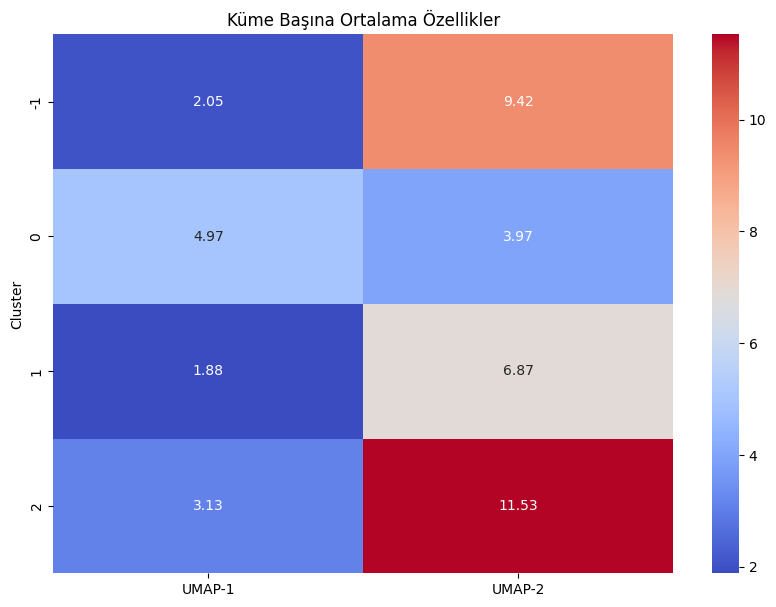

In [ ]:
import umap
import hdbscan
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Wine veri setini yükle
wine = load_wine()
X = wine.data
y = wine.target

# Veriyi standardize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP ile boyut indirgeme (2D)
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
X_umap = umap_model.fit_transform(X_scaled)

# HDBSCAN ile kümeleme
clusterer = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10)
y_hdbscan = clusterer.fit_predict(X_umap)

# Kümeleme sonuçlarını V-Measure ile değerlendirme
v_measure = v_measure_score(y, y_hdbscan)
print(f"V-Measure Skoru: {v_measure}")

# Küme başına özellikleri görselleştirmek için heatmap
df = pd.DataFrame(X_umap, columns=["UMAP-1", "UMAP-2"])
df['Cluster'] = y_hdbscan
cluster_means = df.groupby('Cluster').mean()

plt.figure(figsize=(10, 7))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Küme Başına Ortalama Özellikler')
plt.show()


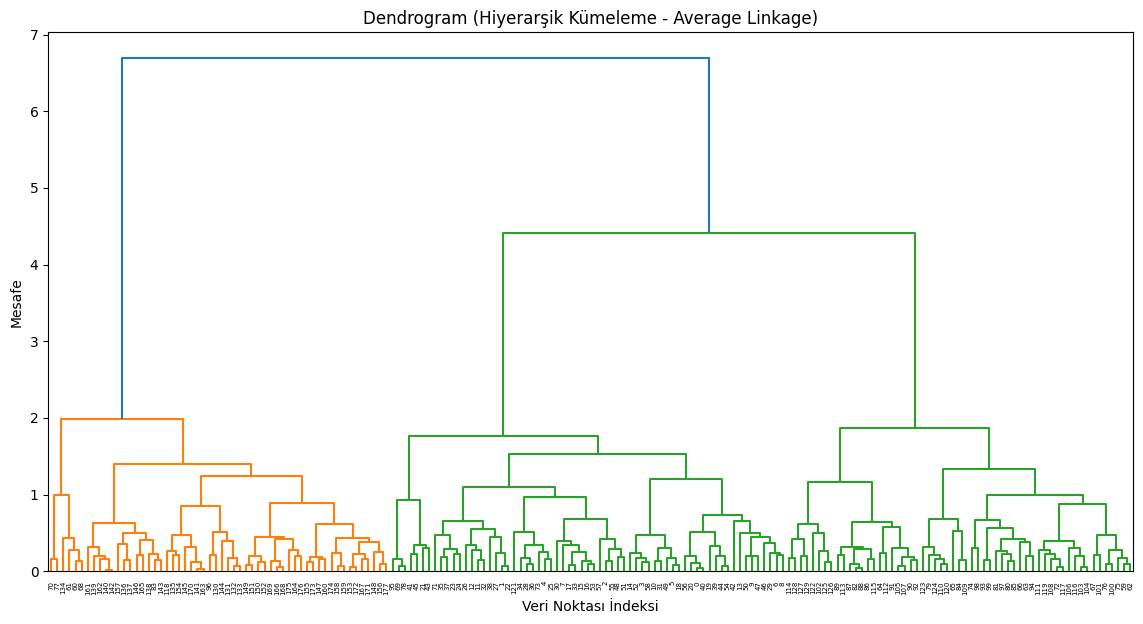

In [ ]:
# Hiyerarşik kümeleme ile average linkage kullanarak kümeleme
linked = linkage(X_umap, method='average')

# Dendrogram görselleştirmesi
plt.figure(figsize=(14, 7))
dendrogram(linked)
plt.title('Dendrogram (Hiyerarşik Kümeleme - Average Linkage)')
plt.xlabel('Veri Noktası İndeksi')
plt.ylabel('Mesafe')
plt.show()

# Sonuçları Yorumlayalım
UMAP kullanmadan önce bütün skorlarda, heatmapte ve dendrogramda sonuçlar oldukça kötüydü ve neredeyse hiç bir küme yoktu scatter plot çıktısını incelediğimizde tek bir rengin her yere dağılmış olduğunu gördük bu şekilde kümelememizi tamamlayamayacağımıza göre UMAP kısmına geçtik.

UMAP sonrasında yorumlamasını bildiğimiz Silhouette, Davies-Bouldin ve Rand Skorlarında gözle görülür ve kabul edilir bir iyileşme oldu. Tabii ki bu Dendrograma ve Heatmap'e de yansıdı ilk halinde dendrogramda 3'ü büyük olmakla birlikte 8 küme gördük UMAP sonrasında bu Dendrograma beklediğimiz gibi net bir şekilde üç farklı küme olduğunu yansıttı. Tabii ki bu üç kümeden ikisinin daha benzer olduğunu da gördük bunu daha önce yaptığımız boxplot ile de göstermiştik. Bunu dendrogramdan nasıl okuruz derseniz öncelikle data iki kola ayrılmış ve sonra sağdaki kol tekrar ikiye ayrılmış bu o iki kümenin daha benzer olduğunu gösteren bir hiyerarşi.

Heatmapte ise 0. kümenin hiç ayrışamadığını diğer iki kümenin ise tamamen birbirine karıştığını ve sayılardan da zaten başarının oldukça düşük olduğunu gördük. UMAP sonrasında sonuçların normalleştiğini görüyoruz UMAP öncesinde altta gördüğümüz özellikler nereye gitti derseniz boyut düşürdüğümüzden onları bu heatmapte görmüyoruz.

Scatter Plot çıktımız ise net bir şekilde üç kümeyi görselleştirebilirken 1 adet gürültüyü de bizlere yansıtabildi.

Son olarak öğrenmenizi istediğim bir metrik daha ekledim "V-Measure". Nedir nasıl yorumlanır öğrenelim.

#V-Measure Skoru

Bu skor, kümeleme sonuçlarının doğruluğunu ve dışsal tutarlılığını ölçer. 0 ile 1 arasında bir değeri vardır:

1: V-Measure değeri 1 olduğunda, kümeler mükemmel bir şekilde sınıflara karşılık gelir ve her sınıfın tüm verileri doğru kümelere yerleştirilmiştir.

0: V-Measure değeri 0 ise, kümeler hiç bir şekilde sınıflar ile ilişkili değildir.

Aradaki değerler: Bu durumda kümeleme algoritması, sınıflara bir ölçüde tutarlı olsa da, sınıf ve küme ilişkisi tam olarak sağlanmamıştır.

##V-Measure Yorumlanması

Eğer V-Measure değeri yüksekse, kümeleme algoritması iyi bir şekilde sınıf yapısını korumuştur, yani gerçek sınıflar arasındaki ayrım kümelerle uyumludur.

Düşük V-Measure değeri, kümeleme algoritmasının sınıfların doğal yapısını anlamakta zorlandığını ve kümelerin doğru şekilde ayrılmadığını gösterir.

V-Measure, daha objektif bir değerlendirme metrikidir ve özellikle dışsal doğruluk ve tutarlılığı ölçmek için çok faydalıdır.

UMAP öncesinde V-Measure değerimiz: 0.018 iken UMAP sonrasında 0.774 gibi oldukça kabul edilebilir bir değere ulaştı.

###UMAP ile sizler de kodları çalıştırdığınızda farklı ama yaklaşık sonuçlar göreceksiniz bunun sebebi UMAP için bir random seed atamamış olmam isterseniz sizler ekleyip her çalıştırdığınızda aynı sonuçları elde edebilirsiniz.

# **Gaussian Mixture Models (GMM)**


Gaussian Mixture Models (GMM), veri setindeki noktaların birden fazla Gaussian dağılımının karışımıyla oluştuğunu varsayan bir istatistiksel modeldir. Bu model, veri setindeki farklı grupları veya alt-popülasyonları tanımlamak için kullanılır.

## Temel Fikir

Veri setindeki her bir nokta, belirli bir Gaussian dağılımından gelme olasılığıyla ilişkilendirilir.

Bu olasılıklar, karışım katsayıları (mixing coefficients) olarak adlandırılır.
Her bir Gaussian dağılımı, kendi ortalama ve kovaryans matrisine sahiptir.

Matematiksel Model:

Bir veri noktası x için, GMM'nin olasılık yoğunluk fonksiyonu şu şekilde ifade edilir:

$p(x) = Σ(π_k * N(x|μ_k, Σ_k))$

$π_k$: k'inci Gaussian dağılımının karışım katsayısı

$N(x|μ_k, Σ_k)$: x noktasının k'inci Gaussian dağılımına göre olasılığı

$μ_k$: k'inci Gaussian dağılımının ortalaması

$Σ_k$: k'inci Gaussian dağılımının kovaryans matrisi

**Parametrelerin Tahmini:** Expectation-Maximization (EM) Algoritması

GMM parametrelerini tahmin etmek için genellikle EM algoritması kullanılır. EM algoritması, iki adımda çalışır:

**E-Step (Bekleme Adımı)**

Veri noktalarının her bir Gaussian dağılımına ait olma olasılıkları hesaplanır. Bu olasılıklar, latent değişkenler olarak adlandırılır.

**M-Step (Maksimizasyon Adımı)**

Latent değişkenler kullanılarak, her bir Gaussian dağılımının parametreleri (ortalama, kovaryans matrisi, karışım katsayıları) güncellenir.

Bu iki adım, modelin yakınsamasına kadar tekrarlanır.

##GMM'nin Avantajları

**Fleksibilite:** Farklı şekil ve boyutlardaki kümeleri modelleyebilir.

**Yumuşak Kümeleme:** Bir veri noktasının birden fazla kümeye ait olma olasılığını hesaplayabilir.

**İstatistiksel Temel:** Gauss dağılımı, istatistikte yaygın olarak kullanılan bir dağılım olduğundan, GMM'nin teorik temeli sağlamdır.

##GMM'nin Dezavantajları:

**Hesaplama Maliyeti:** Özellikle büyük veri setleri için hesaplama maliyeti yüksek olabilir.

**Parametre Seçimi:** Parametrelerin doğru seçimi, modelin performansını etkiler.

**Yerel Minimumlara Düşme Riski:** EM algoritması, yerel minimumlara takılabilir.

##GMM'nin Diğer Algoritmalarla Karşılaştırması

**K-means:** K-means gibi diğer kümeleme algoritmalarına göre GMM'nin en büyük avantajı, veri noktalarının birden fazla kümeye ait olma olasılığını vermesidir. Bu, veri setinin daha karmaşık yapılarını modellemede avantaj sağlar.

**Hierarchical Clustering:** Hiyerarşik kümeleme, veri noktaları arasındaki hiyerarşik bir ilişki kurarken, GMM, veri noktalarını belirli bir sayıda kümeye atamaya odaklanır.

**DBSCAN:** DBSCAN, yoğunluk tabanlı bir kümeleme algoritmasıdır ve GMM gibi yumuşak kümeleme yapmaz.

##GMM'nin Uygulama Alanları

**Ses İşleme:** Ses sinyallerindeki farklı konuşmacıları veya sesleri ayırmak için kullanılır.

**Görüntü İşleme:** Görüntülerdeki nesneleri veya bölgeleri segmentlemek için kullanılır.

**Biyoinformatik:** Genomik verileri analiz etmek için kullanılır.

**Finans:** Finansal zaman serilerini modellemek ve anomalileri tespit etmek için kullanılır.

##GMM'nin Sınırlamaları ve Çözümleri

**Yerel Minimumlar:** EM algoritması, yerel minimumlara takılabilir. Bu sorunu çözmek için farklı başlangıç değerleri ile algoritmayı çalıştırmak veya simüle edilmiş tavlama gibi yöntemler kullanmak faydalı olabilir.

###Simüle Edilmiş Tavlama (Simulated Annealing) Nedir?

Simüle edilmiş tavlama, bir optimizasyon problemine, fiziksel bir sistemin soğutulma sürecine benzetilerek çözüm bulan bir meta-sezgisel algoritmadır. Bu yöntem, yerel minimumlara takılmadan global minimumu bulma olasılığını artırır.

**Nasıl Çalışır?**

Sistem başlangıçta yüksek bir sıcaklıkta başlatılır.

Her adımda, çözümde küçük bir değişiklik yapılır ve yeni çözümün enerjisi hesaplanır.

Yeni çözüm, eski çözümden daha iyiyse kabul edilir.

Yeni çözüm daha kötüyse bile, belirli bir olasılıkla kabul edilebilir. Bu olasılık, sistemin sıcaklığına bağlıdır. Sıcaklık düştükçe, daha kötü çözümlerin kabul edilme olasılığı azalır.

Bu süreç, sistem bir denge durumuna ulaşana veya belirli bir iterasyon sayısına ulaşılana kadar tekrarlanır.

###GMM ile İlişkisi

EM algoritması, yerel minimumlara takılabilir. Simüle edilmiş tavlama, farklı başlangıç değerleri ile birden fazla EM çalıştırması yaparak bu sorunu aşmaya yardımcı olabilir.

Her bir EM çalıştırması, simüle edilmiş tavlamanın bir adımı olarak düşünülebilir.

**Model Seçimi:** Küme sayısı (K) gibi hiperparametrelerin belirlenmesi önemlidir. Model seçimi için farklı kriterler (BIC, AIC) kullanılabilir.

**Yüksek Boyutluluk:** Yüksek boyutlu verilerde kovaryans matrislerinin tahmini zor olabilir. Bu durumda, kovaryans matrisinin yapısı hakkında bazı varsayımlar yapmak gerekebilir (örneğin, diyagonal kovaryans matrisi).



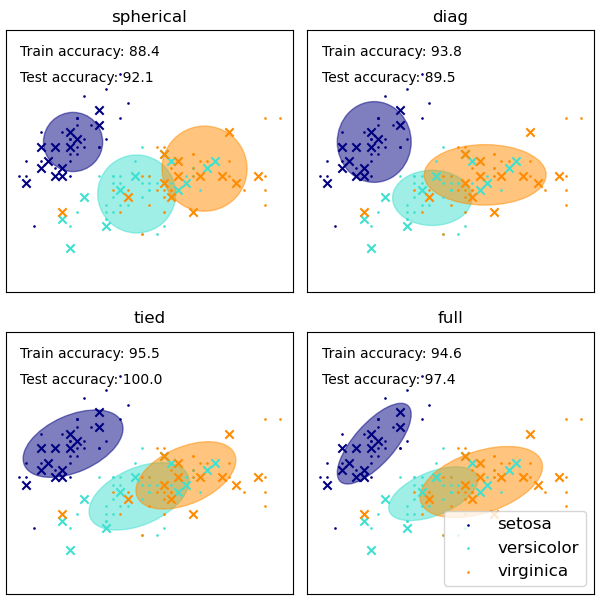

Görselin Kaynağı: https://scikit-learn.org/1.5/modules/mixture.html

# **GMM PYTHON UYGULAMASI**

Silhouette Skoru: 0.34726590057721557
Davies-Bouldin Skoru: 0.8154760592030401
Adjusted Rand Skoru: 0.4619272282027204
V-Measure Skoru: 0.5165248571923309


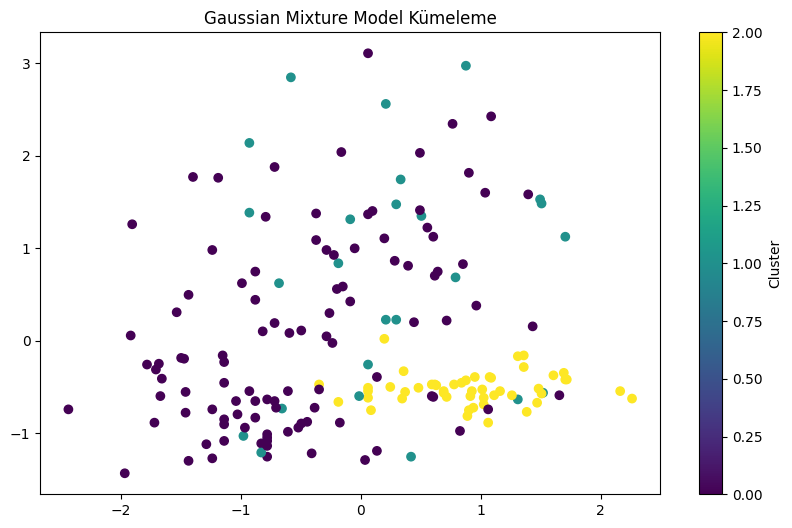

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, v_measure_score
from sklearn.model_selection import train_test_split

# Wine datasetini yükleyelim
data = load_wine()
X = data.data
y = data.target

# GMM modelini kuruyoruz ve fit ediyoruz
gmm = GaussianMixture(n_components=3, random_state=42)  # n_components: küme sayısı
gmm.fit(X)

# Küme tahminlerini alalım
y_pred = gmm.predict(X)

# Metrikleri hesaplayalım
silhouette = silhouette_score(X, y_pred)
davies_bouldin = davies_bouldin_score(X, y_pred)
adjusted_rand = adjusted_rand_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)

# Sonuçları yazdıralım
print(f"Silhouette Skoru: {silhouette}")
print(f"Davies-Bouldin Skoru: {davies_bouldin}")
print(f"Adjusted Rand Skoru: {adjusted_rand}")
print(f"V-Measure Skoru: {v_measure}")


# GMM'in parametrelerini kullanarak kümeleri görselleştirelim
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.title("Gaussian Mixture Model Kümeleme")
plt.colorbar(label='Cluster')
plt.show()


Boyut düşürmeden önceki sonuçlarımız ortalama çıkmasına rağmen yine de ön işlem geçirmeyen verimizde GMM diğer modellerimizden daha başarılı gibi görünüyor.

Silhouette Skoru: 0.2848589191898987
Davies-Bouldin Skoru: 1.3891879777181646
Adjusted Rand Skoru: 0.8974949815093207
V-Measure Skoru: 0.875893534122307


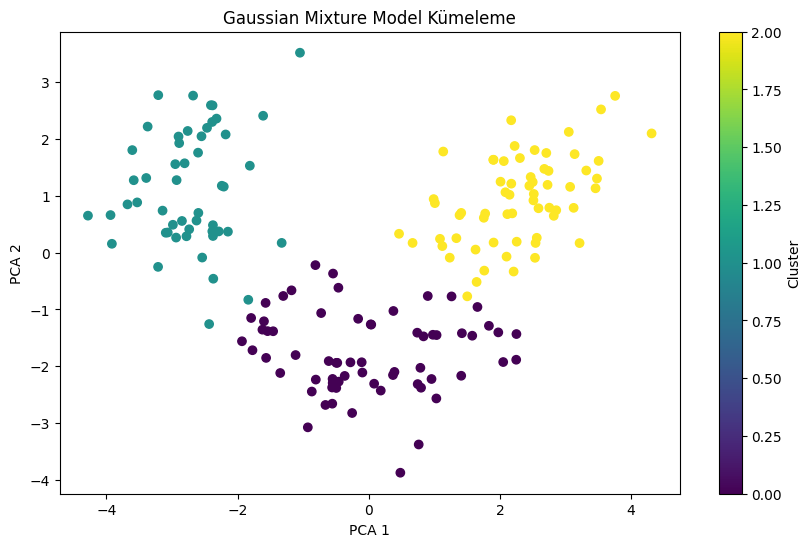

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Wine veri setini yükleyelim
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Verileri standartlaştıralım
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA ile 2D'ye indirgeme (görselleştirme için)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# GMM Modeli
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

# Tahminler
y_pred = gmm.predict(X_scaled)

# Silhouette Skoru
silhouette_avg = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Skoru: {silhouette_avg}")

# Davies-Bouldin Skoru
db_score = davies_bouldin_score(X_scaled, y_pred)
print(f"Davies-Bouldin Skoru: {db_score}")

# Adjusted Rand Skoru
rand_score = adjusted_rand_score(y, y_pred)
print(f"Adjusted Rand Skoru: {rand_score}")

# V-Measure Skoru
v_measure = v_measure_score(y, y_pred)
print(f"V-Measure Skoru: {v_measure}")

# GMM'in parametrelerini kullanarak kümeleri görselleştirelim
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.title("Gaussian Mixture Model Kümeleme")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()



PCA ile boyut indirgeme sonrası elde ettiğimiz sonuçlar, subjektif metrikler olan Silhouette ve Davies-Bouldin skorlarında bir düşüş göstermiştir. Bununla birlikte, objektif metrikler olan Adjusted Rand ve V-Measure skorlarında şimdiye kadar elde ettiğimiz en iyi sonuçları gözlemledik. Bu durum, boyut indirgeme işleminin verinin iç yapısını daha doğru bir şekilde temsil edebildiğini ve kümelerin gerçek etiketlere olan uyumunu artırabildiğini göstermektedir. Ancak, subjektif metriklerimizdeki düşüş nedeniyle bu süreçte küme ayrışmasının genel bir şekilde daha az belirgin hale gelmiş olabileceği de düşünülebilir.

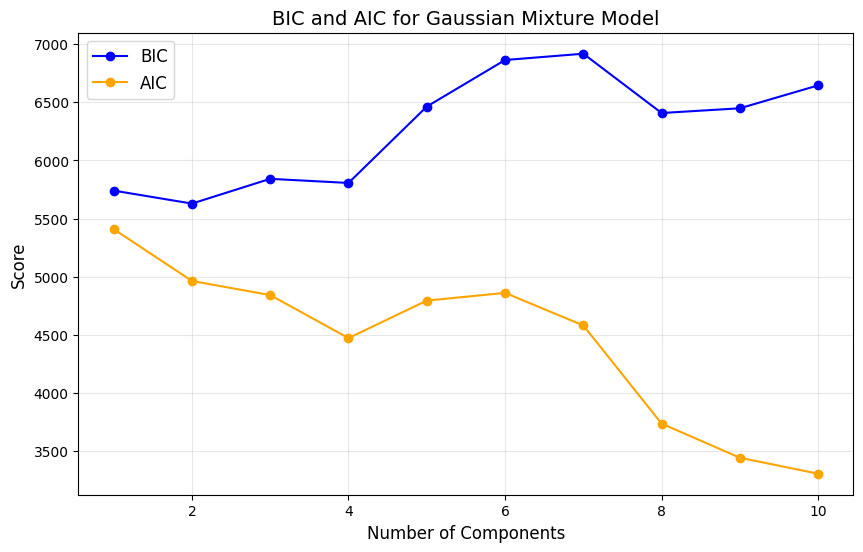

En düşük BIC ile optimal bileşen sayısı: 2
En düşük AIC ile optimal bileşen sayısı: 10


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# 1. Wine dataset'ini yükleyin ve özellikleri ölçeklendirin.
wine_data = load_wine()
X = wine_data.data

# Özelliklerin standartlaştırılması (ölçeklendirilmesi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Gaussian Mixture Model için BIC ve AIC değerlerini hesaplayın.
n_components = range(1, 11)  # 1'den 10'a kadar bileşen sayısını test edeceğiz.
bic = []
aic = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

# 3. BIC ve AIC değerlerini görselleştirin.
plt.figure(figsize=(10, 6))
plt.plot(n_components, bic, label='BIC', marker='o', color='blue')
plt.plot(n_components, aic, label='AIC', marker='o', color='orange')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('BIC and AIC for Gaussian Mixture Model', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 4. En uygun bileşen sayısını belirleyin.
optimal_bic = n_components[np.argmin(bic)]
optimal_aic = n_components[np.argmin(aic)]

print(f"En düşük BIC ile optimal bileşen sayısı: {optimal_bic}")
print(f"En düşük AIC ile optimal bileşen sayısı: {optimal_aic}")


PCA sonrası en düşük BIC ile optimal bileşen sayısı: 2
PCA sonrası en düşük AIC ile optimal bileşen sayısı: 6


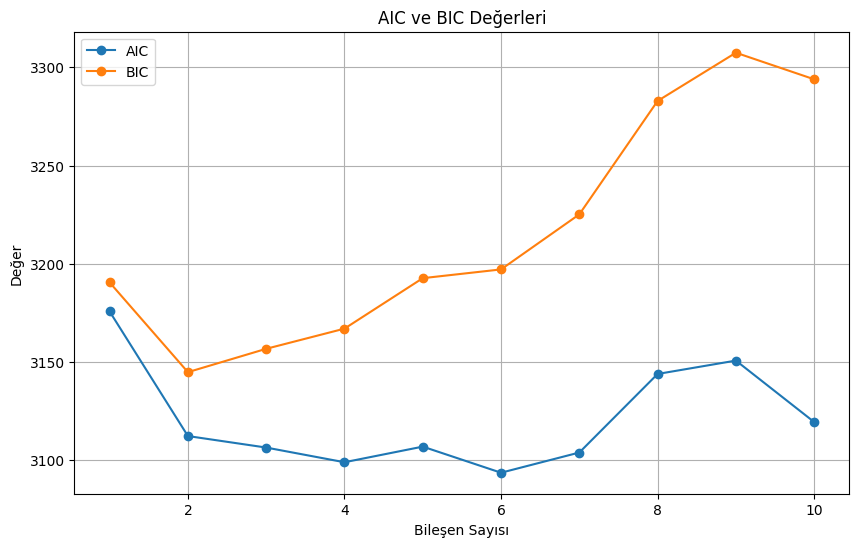

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Wine verisetini yükleyelim
wine = load_wine()
X = wine.data
y = wine.target

# Veriyi eğitim ve test setlerine ayıralım (isteğe bağlı)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA ile boyut indirgeme (2 bileşen seçiyoruz)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Farklı bileşen sayıları için AIC ve BIC hesaplayalım
n_components_range = range(1, 11)
aic_values = []
bic_values = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_pca)
    aic_values.append(gmm.aic(X_pca))
    bic_values.append(gmm.bic(X_pca))

# En düşük AIC ve BIC değerlerini bulalım
optimal_aic_components = n_components_range[np.argmin(aic_values)]
optimal_bic_components = n_components_range[np.argmin(bic_values)]

print(f"PCA sonrası en düşük BIC ile optimal bileşen sayısı: {optimal_bic_components}")
print(f"PCA sonrası en düşük AIC ile optimal bileşen sayısı: {optimal_aic_components}")

# AIC ve BIC grafiklerini çizelim
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_values, label='AIC', marker='o')
plt.plot(n_components_range, bic_values, label='BIC', marker='o')
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Değer")
plt.title("AIC ve BIC Değerleri")
plt.legend()
plt.grid(True)
plt.show()


# **AIC ve BIC nedir?**


Bu iki metrik, model seçimi için kullanılır. Model seçimi, birden fazla model arasından en iyisini belirlemek anlamına gelir. GMM'de bu seçim, "kaç cluster kullanmalıyız?" sorusunu cevaplamak için yapılır.

**BIC (Bayesian Information Criterion)**

Daha düşük bir BIC değeri, daha iyi bir model anlamına gelir.

BIC, modelin uyumunu (fit) ve karmaşıklığını (kaç parametre kullandığını) değerlendirir. Karmaşıklığı cezalandırarak aşırı öğrenmeyi (overfitting) önler.

**AIC (Akaike Information Criterion)**

AIC de düşük değerleri tercih eder.

AIC, yalnızca modelin uyumuna odaklanır, ancak BIC kadar karmaşıklığı cezalandırmaz.

Daha çok "uyum açısından en iyi model" odaklıdır.

##**Grafiği Nasıl Yorumlayacağız?**

X ekseni: Kullanılan bileşen (cluster) sayısı.

Y ekseni: BIC ve AIC değerleri.

Hedefimiz: En düşük BIC ve AIC değerine sahip bileşen sayısını bulmak.

###Optimal Bileşen Sayısı

BIC ve AIC'nin en düşük olduğu nokta, ideal bileşen sayısını gösterir.
Örneğin, eğer BIC grafiği 3 bileşende en düşük değere ulaşıyorsa, 3 bileşenle model oluşturmak iyi bir seçimdir.

##BIC ve AIC'nin Farkı Nedir?

**BIC:** Daha az sayıda cluster seçme eğilimindedir, çünkü model karmaşıklığını daha ağır şekilde cezalandırır. Daha muhafazakâr bir seçim yapar.

**AIC:** Daha fazla sayıda cluster'a izin verebilir, çünkü cezalandırma oranı daha düşüktür.

**Pratikte Ne İşe Yarar?**

Küme sayısını otomatik olarak belirlemek için kullanılır. Veri bilimciler genelde bu metriklere bakarak kümelerin sayısını seçerler.



###BIC ve AIC değerleri farklı çıktı peki neden?

**BIC ve AIC'nin Hedefi**

**BIC:** Modelin açıklayıcılığına odaklanırken aşırı karmaşıklığı (çok fazla parametreyi) cezalandırır. Daha muhafazakâr bir sonuç verir ve genellikle daha az sayıda cluster seçer.

**AIC:** Karmaşıklığı cezalandırsa da, cezalandırma oranı BIC kadar yüksek değildir. Daha esnek bir sonuç verir ve daha fazla cluster seçme eğilimindedir.


**Veri Setinin Doğası**

Eğer veri seti karmaşıksa ve çok fazla iç grup (sub-cluster) içeriyorsa, AIC daha fazla cluster seçer.

Eğer veri daha az karmaşıksa veya daha genel bir yapı varsa, BIC daha az cluster seçer.


BIC 2 bileşen seçiyor: Bu, veri setindeki yapıyı genel hatlarıyla açıklamak için 2 bileşenin yeterli olduğunu söylüyor.

AIC 10 ya da 6 bileşen seçiyor: Bu, veri setindeki daha ince ayrıntıları yakalamak için daha fazla bileşen gerektiğini söylüyor. Daha detaycı bir yaklaşım.

###Peki Hangi Metrik Daha Önemli?

Bu seçim projenizin hedefine bağlıdır.

Genel Yapıyı Anlamak İstiyorsanız:

BIC daha iyi bir seçimdir. Çünkü daha az cluster ile anlamlı sonuçlar sağlar.

Detayları ve Alt Grupları Görmek İstiyorsanız:

AIC daha iyi bir seçimdir. Çünkü daha fazla cluster seçerek daha detaylı bir model sunar.

Bu Durumda Önerim:
İki metriğin sonuçlarını görselleştirip, grafiklerden optimal bileşen sayısını yorumlayabilirsiniz.

Projenizin amacı neyse ona göre bir karar verebilirsiniz:

Eğer buradaki gibi şarap türlerinin genel sınıflandırmasını yapmak istiyorsanız, BIC'nin önerdiği 2 bileşeni seçin.

Eğer türlerin içindeki alt grupları da ayırmak istiyorsanız, AIC'nin önerdiği 10 (ya da PCA sonrasındaki 6) bileşeni seçin.


##PCA sonrası grafikle ilgili olarak

1. Model Karmaşıklığının Azalması (Overfitting):
İlk başta, 10 bileşenli modelin daha fazla parametre ile daha iyi uyum sağladığını görüyorsunuz. Ancak, model çok fazla bileşen kullandığında, overfitting (aşırı uyum) riski ortaya çıkabilir. Bu durumda, model sadece eğitim verisine aşırı uyum sağlar ve genelleme yeteneği düşer.
6 bileşenle model daha basitleştiği için, aşırı uyumun etkisini azaltabilir ve doğruluğunu artırabilir. AIC'nin düşmesi, modelin daha basitleştiğini ve veriye daha uygun hale geldiğini gösterebilir.

2. Outlier'lar (Aykırı Değerler):
Outlier'lar, modelin genel uyumunu bozabilir ve genellikle daha fazla bileşen gerektirir. Eğer 10 bileşenli model, veriye aşırı uyum sağlıyorsa, outlier'lar da modelin karmaşıklığını artırabilir ve AIC'nin yüksek olmasına yol açabilir.
Outlier'lar, modelin daha fazla bileşenle farklı kümelere dağılmasına neden olabilir. Ancak, 6 bileşenli modelde outlier'lar daha iyi sınıflandırılmış olabilir veya modelin karmaşıklığı azaldığı için outlier'lar daha az etkili olmuştur, bu da AIC'nin düşmesini sağlar.

3. Veri Yapısındaki Değişiklikler (PCA'nın Rolü):
PCA ile boyut indirgeme işlemi, verideki en önemli bileşenleri çıkarmayı amaçlar. Bu, modelin veriyle daha uyumlu hale gelmesini sağlar çünkü gereksiz gürültü ve verinin karmaşıklığı azaltılır.
Boyut indirgeme işlemi, düşük boyutlu bir temsil ile daha net ve genel bir model oluşturmanıza yardımcı olabilir. Bu durum, AIC'nin düşmesine yol açabilir, çünkü model daha az bileşenle daha iyi bir uyum sağlıyor olabilir.

4. Modelin Genelleme Yeteneği:
Daha fazla bileşen eklemek, modelin daha fazla esneklik kazanmasını sağlasa da, bazen modelin genelleme yeteneğini olumsuz etkileyebilir. Yani, fazla bileşen kullanmak, yalnızca eğitim verisine aşırı uyum sağlamakla kalmaz, aynı zamanda test verileri üzerinde de kötü performans gösterebilir.
6 bileşenli model, daha basit bir yapı ile daha iyi genelleme sağlayabilir, bu da AIC'nin düşmesini sağlar.

5. Veri Dağılımı ve Kümeleme Yapısı:
Verinizin doğal yapısı, belirli sayıda bileşenle daha iyi modellenebilir. Eğer veri kümeniz gerçekten 6 kümeye yakın bir yapıya sahipse, 6 bileşenli model daha iyi uyum sağlar.
10 bileşenli modelin fazla sayıda bileşen kullanması, bazı kümelerin gereksiz yere bölünmesine ve modelin karmaşıklaşmasına yol açmış olabilir.

6. Veri Boyutunun Etkisi:
Veri setinin büyüklüğü de AIC ve BIC hesaplamalarını etkileyebilir. Küçük bir veri setiyle daha fazla bileşen kullanmak, modelin daha fazla parametre ile hesaplanmasına neden olur ve AIC'yi artırabilir.
6 bileşenli model, daha uygun bir parametre sayısı sunarak daha verimli bir model elde etmenize olanak sağlayabilir.

# **SPECTRAL CLUSTERING ( SPEKTRAL KÜMELEME )**

Spektral Kümeleme, veri noktaları arasındaki bağlantıya dayanarak kümeleme yapan bir algoritmadır. Veri noktaları bir grafik olarak temsil edilir ve bu grafiğin özdeğerleri ve özvektörleri kullanılarak veri noktaları daha düşük boyutlu bir uzaya izdüşürülür. Daha sonra bu düşük boyutlu uzayda geleneksel kümeleme teknikleri kullanılarak kümeleme yapılır.

## Spektral Kümelemenin Adımları

###Benzerlik Grafiğinin Oluşturulması

**Epsilon-Komşuluk Grafiği:** Belirli bir epsilon değeri seçilir ve her nokta, epsilon yarıçapı içindeki tüm noktalarla bağlanır.

**K-En Yakın Komşu Grafiği:** Her nokta, en yakın k komşusu ile bağlanır.

**Tam Bağlantılı Grafik:** Her nokta, diğer tüm noktalarla bağlanır.

###Düşük Boyutlu Uzaya İzdüşürme

**Laplacian Matrisi:** Benzerlik grafiğinden Laplasyan matrisi oluşturulur.

**Özdeğerler ve Özvektörler:** Laplasyan matrisinin en küçük özdeğerlere karşılık gelen özvektörleri hesaplanır.

**Boyut İndirgeme:** Özvektörler kullanılarak veri noktaları daha düşük boyutlu bir uzaya izdüşürülür.

###Kümeleme

Düşük boyutlu uzaya izdüşürülen veri noktaları, geleneksel kümeleme teknikleri (örneğin, K-Means) kullanılarak kümelendirilir.


##Spektral Kümelemenin Özellikleri

**Esneklik:** Veri noktalarının dağılımı hakkında herhangi bir varsayım yapmaz.

**Basit Uygulama:** Algoritma, matematiksel hesaplamalara dayanır ve uygulaması kolaydır.

**Hızlı:** Genellikle hızlı bir algoritmadır.

**Boyut İndirgeme:** Veri boyutunu azaltarak, daha hızlı ve daha iyi performanslı kümeleme sağlar.

**Karmaşık Şekilli Kümeler:** Doğrusal olmayan şekillerdeki kümeleri tespit edebilir.

**Gürültüye Duyarlılık:** Gürültülü verilere karşı hassas olabilir.

**Küme Sayısının Belirlenmesi:** Küme sayısı önceden belirlenmelidir.


Spektral kümeleme, özellikle karmaşık şekilli kümelerin olduğu veri setlerinde etkili bir yöntemdir. Ancak, gürültüye duyarlılığı ve küme sayısının önceden belirlenmesi gibi bazı dezavantajları vardır. Uygulamada, veri setinin özelliğine ve analiz amacına göre uygun bir kümeleme algoritması seçilmelidir.

##Spektral Kümelemenin Temel Mantığı

Spektral kümelemenin temel mantığı, veri noktaları arasındaki bağlantıyı bir grafik olarak temsil etmek ve bu grafiğin özdeğer ve özvektörlerini kullanarak veriyi düşük boyutlu bir uzaya izdüşürmektir. Bu izdüşürülen uzayda, aynı kümeye ait noktalar birbirine daha yakın olur.

###Neden Özdeğer ve Özvektörler?

Laplacian matrisinin en küçük özdeğerlere karşılık gelen özvektörleri, grafiğin en iyi şekilde kesilebileceği yerleri gösterir. Bu kesimler, aslında veri noktalarının farklı kümelere ait olduğunu gösterir.

###Farklı Laplacian Matrisleri

###Laplacian Matrisleri

**Unnormalized Laplacian:** Temel formül $L=D−A$, burada 𝐷 derece matrisi ve 𝐴 ise bitişiklik matrisidir. Bu matris, grafın bağlantılarını analiz etmek için kullanılır.

**Normalized Laplacian:** Grafın düğüm derecelerine göre ölçeklenmiş versiyonlarıdır. İki yaygın versiyonu bulunur:

**Symmetric Normalized Laplacian:**

$L sym=I−D −1/2 AD −1/2$

**Random Walk Normalized Laplacian:**

$L rw =I−D −1 A$

Bu matrislerin özdeğerleri ve özvektörleri graf kesimi, kümeleme ve diğer spektral yöntemlerde kullanılır.

**Normalized Cut:**
Grafiği iki parçaya bölerken, her parçadaki düğüm sayısı ve kesilen kenarların ağırlıklarının toplamı arasındaki dengeyi sağlamaya çalışır.

###Spektral Kümelemenin Varyasyonları

**Normalized Spectral Clustering:**
Farklı normalizasyon yöntemleri kullanarak daha iyi sonuçlar elde edilebilir.

**Kernel Spectral Clustering:** Veri noktaları arasındaki benzerliği hesaplamak için farklı kernel fonksiyonları kullanılabilir.

**Locality Preserving Projections (LPP):** Spektral kümelemeye benzer bir yöntem olup, yerel komşuluk yapısını korumaya odaklanır.

##Spektral Kümelemenin Uygulama Alanları

**Görüntü İşleme:** Görüntü segmentasyonu, nesne tanıma

**Biyoinformatik:** Gen ifade verilerinin kümelenmesi

**Sosyal Ağ Analizi:** Topluluk tespiti

**Doküman Kümeleme:** Benzer temalı belgelerin gruplanması

##Spektral Kümelemenin Sınırlamaları ve Çözümleri

**Küme Sayısının Belirlenmesi:** K-means gibi, küme sayısının önceden belirlenmesi gerekir.

**Gürültüye Duyarlılık:** Gürültülü verilere karşı hassas olabilir.

**Hesaplama Maliyeti:** Büyük veri setleri için hesaplama maliyeti yüksek olabilir.

**Yerel Minimumlar:** Özdeğerlerin hesaplanması sırasında yerel minimumlara takılabilir.

##Diğer Kümeleme Algoritmaları ile Karşılaştırma

Spektral kümeleme, K-means, hiyerarşik kümeleme gibi diğer kümeleme algoritmalarına göre farklı avantajlara ve dezavantajlara sahiptir. Spektral kümeleme, özellikle karmaşık şekilli kümeler ve yüksek boyutlu veriler için daha uygun olabilir.

# **SPECTRAL KÜMELEME PYTHON UYGULAMASI**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, v_measure_score
from sklearn.datasets import load_wine

# Wine veri setini yükleyelim
wine = load_wine()
X = wine.data
y = wine.target

# Spectral Clustering uygulayalım
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X)

# Metrik hesaplamaları
sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)
ari_score = adjusted_rand_score(y, labels)
v_measure = v_measure_score(y, labels)

# Sonuçları yazdır
print(f"Silhouette Skoru: {sil_score}")
print(f"Davies-Bouldin Skoru: {db_score}")
print(f"Adjusted Rand Skoru: {ari_score}")
print(f"V-Measure Skoru: {v_measure}")


Silhouette Skoru: 0.556770738884844
Davies-Bouldin Skoru: 0.5293470330238668
Adjusted Rand Skoru: 0.35906129467464126
V-Measure Skoru: 0.41992297062893763


In [ ]:
import umap

# UMAP ile boyut azaltma
umap_reducer = umap.UMAP(n_neighbors=50, min_dist=0.2, n_components=2, n_jobs=1)
X_umap = umap_reducer.fit_transform(X)

# Spectral Clustering uygulayalım
spectral_umap = SpectralClustering(n_clusters=3, affinity='rbf')
labels_umap = spectral_umap.fit_predict(X_umap)

# Metrik hesaplamaları
sil_score_umap = silhouette_score(X_umap, labels_umap)
db_score_umap = davies_bouldin_score(X_umap, labels_umap)
ari_score_umap = adjusted_rand_score(y, labels_umap)
v_measure_umap = v_measure_score(y, labels_umap)

# Sonuçları yazdır
print(f"Silhouette Skoru (UMAP): {sil_score_umap}")
print(f"Davies-Bouldin Skoru (UMAP): {db_score_umap}")
print(f"Adjusted Rand Skoru (UMAP): {ari_score_umap}")
print(f"V-Measure Skoru (UMAP): {v_measure_umap}")


Silhouette Skoru (UMAP): 0.6468442678451538
Davies-Bouldin Skoru (UMAP): 0.457453203149833
Adjusted Rand Skoru (UMAP): 0.4007269360356032
V-Measure Skoru (UMAP): 0.394830935300676


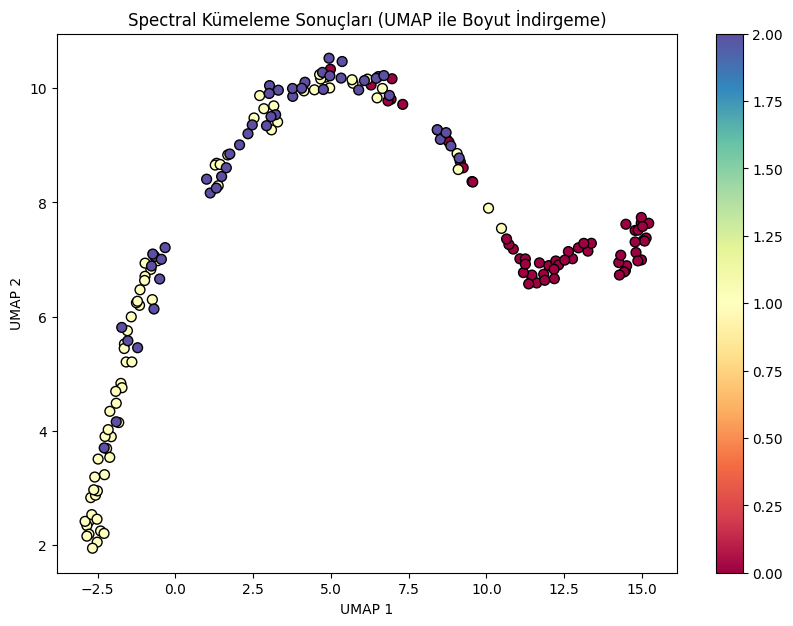

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=50, edgecolor='k')
plt.title('Spectral Kümeleme Sonuçları (UMAP ile Boyut İndirgeme)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, v_measure_score

# PCA ile boyut indirgeme
pca = PCA(n_components=2, random_state=42)  # 2 bileşene indiriyoruz
X_pca = pca.fit_transform(X)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels_pca = spectral.fit_predict(X_pca)

# Metrik hesaplama
silhouette_pca = silhouette_score(X_pca, labels_pca)
davies_pca = davies_bouldin_score(X_pca, labels_pca)
adjusted_rand_pca = adjusted_rand_score(y, labels_pca)
v_measure_pca = v_measure_score(y, labels_pca)

# Sonuçları yazdırma
print(f"Silhouette Skoru (PCA): {silhouette_pca}")
print(f"Davies-Bouldin Skoru (PCA): {davies_pca}")
print(f"Adjusted Rand Skoru (PCA): {adjusted_rand_pca}")
print(f"V-Measure Skoru (PCA): {v_measure_pca}")



Silhouette Skoru (PCA): 0.5578662185884037
Davies-Bouldin Skoru (PCA): 0.5280658740642443
Adjusted Rand Skoru (PCA): 0.35906129467464126
V-Measure Skoru (PCA): 0.41992297062893763


## Sonuçların Yorumlanması

Verimize hiç ön işlem yapmadan önce baktığımız metrikler ve ön işlem sonrası metrikler arasında çok büyük farkların olmadığını görüyoruz bu sonuçla spektral kümeleme boyut azaltmanın en az olumlu etki gösterdiği algoritma olmuştur.  

# **Affinity Propagation Clustering (Affinity Propagation Kümeleme )**

Affinity Propagation (AP), veri noktaları arasındaki benzerliklere dayanarak otomatik olarak küme merkezlerini belirleyen bir kümeleme algoritmasıdır. Geleneksel kümeleme algoritmalarından farklı olarak, önceden belirlenmiş bir küme sayısına ihtiyaç duymaz. Bu özelliği, özellikle veri setindeki küme sayısının bilinmediği veya karmaşık şekillerde dağılmış veri setleri için avantajlıdır.

## Temel Kavramlar

**Benzerlik Matrisi (Similarity Matrix):** Veri noktaları arasındaki benzerlikleri (veya farklılıkları) gösteren bir matristir. Genellikle, noktalar arasındaki öklid uzaklığının negatif karesi kullanılarak hesaplanır.

**Sorumluluk Matrisi (Responsibility Matrix):** Bir veri noktasının diğer bir veri noktasına göre ne kadar uygun bir örnek (exemplar) olabileceğini gösterir.

**Ulaşılabilirlik Matrisi (Availability Matrix):** Bir veri noktasının diğer veri noktaları tarafından örnek olarak ne kadar tercih edildiğini gösterir.

##Algoritmanın İşleyişi

**Benzerlik Matrisinin Oluşturulması:** Veri noktaları arasındaki benzerlikler hesaplanır ve bir matris oluşturulur.

**Sorumluluk ve Ulaşılabilirlik Matrislerinin İnitializasyonu:** Bu matrisler başlangıçta sıfır olarak ayarlanır.

###İteratif Güncelleme

1. Sorumluluk Güncellemesi: Her veri noktası için, diğer noktaların ne kadar iyi bir örnek olabileceği hesaplanır.

2. Ulaşılabilirlik Güncellemesi: Her veri noktası için, diğer noktaların ne kadar kullanılabilir olduğu hesaplanır.

**Net Sorumluluk Hesaplanması:** Her veri noktası için net sorumluluk değeri hesaplanır.

**Örnek Seçimi:** En yüksek net sorumluluğa sahip noktalar örnek olarak seçilir.

**Küme Atama:** Geri kalan noktalar, en yakın örneklerine atanarak kümelere ayrılır.

##Avantajlar

**Otomatik Küme Sayısı Belirleme:** Önceden belirlenmiş bir küme sayısına ihtiyaç duymaz.

**Karmaşık Şekilli Kümeler:** Farklı şekil ve boyutlardaki kümeleri tespit edebilir.

**Gürültüye Dayanıklılık:** Gürültülü verilere karşı nispeten dayanıklıdır.

##Dezavantajlar

**Hesaplama Maliyeti:** Büyük veri setleri için hesaplama maliyeti yüksek olabilir.

**Parametre Seçimi:** Bazı parametreler (örneğin, benzerlik metriği) sonuçları etkileyebilir.

**Yerel Minimumlara Takılma Riski:** İteratif bir algoritma olduğu için yerel minimumlara takılabilir.


Affinity Propagation, özellikle küme sayısı bilinmediği veya veri setinin karmaşık bir yapısı olduğu durumlarda güçlü bir kümeleme algoritmasıdır. Ancak, diğer algoritmalar gibi, doğru parametre seçimi ve veri ön işleme önemlidir.


Affinity Propagation Algoritmasına Ek Teorik Bilgiler ve Kaynaklar
Affinity Propagation (AP) algoritması, kümeleme alanında oldukça ilgi çekici ve yenilikçi bir yaklaşım sunmaktadır. Ancak, bu algoritmanın daha derinlemesine anlaşılması için ek teorik bilgilere ihtiyaç duyulabilir.

##Teorik Temeller ve Gelişmeler

**Mesaj Geçişi (Message Passing):** AP algoritmasının temelini oluşturan mesaj geçişi konsepti, istatistiksel fizik ve yapay sinir ağları gibi alanlardan ilham almıştır. Bu konuda daha detaylı bilgi için, Belief Propagation ve Message Passing Interfaces gibi konuları araştırabilirsiniz.

**Grafik Teorisi:** AP algoritması, veri noktaları arasındaki ilişkileri bir grafik olarak modellediği için, grafik teorisi kavramları (örneğin, düğümler, kenarlar, yoğunluk) bu algoritmayı anlamak için önemlidir.

**Optimizasyon Problemleri:** AP algoritması, bir optimizasyon problemidir. Bu nedenle, optimizasyon yöntemleri (örneğin, yerel arama, genetik algoritmalar) ile olan ilişkisi incelenebilir.

###Parametrelerin Etkisi

**Benzerlik Metriği:** Öklid uzaklığı dışında, kosinüs benzerliği, Pearson korelasyon katsayısı gibi farklı benzerlik metrikleri kullanılabilir. Bu metriklerin seçimi, veri setinin yapısına ve kümeleme amacına bağlıdır.

**Tercih Değeri (Preference):** Her bir veri noktasının ne kadar iyi bir örnek olma olasılığını belirleyen bir parametredir. Tercih değerinin seçimi, küme sayısını etkileyebilir.

**Durdurma Kriteri:** Algoritmanın ne zaman duracağı, iterasyon sayısı veya matrislerdeki değişim gibi kriterlerle belirlenir.

##Uygulama Alanları ve Sınırlamalar

**Biyoinformatik:** Gen ifade verilerinin kümelenmesi, protein yapılarının analiz edilmesi gibi alanlarda yaygın olarak kullanılır.

**Görüntü İşleme:** Görüntü segmentasyonu, nesne tanıma gibi uygulamalarda kullanılır.

**Sosyal Ağ Analizi:** Topluluk tespiti için kullanılabilir.

**Sınırlamalar:** Büyük veri setleri için hesaplama maliyeti yüksek olabilir. Ayrıca, yerel minimumlara takılma riski bulunmaktadır.

# **AFFINITY PROPAGATION CLUSTERING PYTHON UYGULAMASI**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    adjusted_rand_score,
    v_measure_score,
)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Veri setini yükle
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Affinity Propagation uygulanması
def affinity_propagation_clustering(X, preference=-50, damping=0.5):
    model = AffinityPropagation(preference=preference, damping=damping, random_state=42)
    labels = model.fit_predict(X)
    cluster_centers_indices = model.cluster_centers_indices_
    return labels, cluster_centers_indices

# Varsayılan parametrelerle modeli çalıştır
labels, cluster_centers_indices = affinity_propagation_clustering(X_scaled)

# Kümeleme sonuçlarını değerlendirme
def evaluate_clustering(X, labels, y):
    if len(set(labels)) > 1:  # Yeterli küme yoksa metrikler çalışmaz
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        rand_index = adjusted_rand_score(y, labels)
        v_measure = v_measure_score(y, labels)
        return silhouette, davies_bouldin, rand_index, v_measure
    else:
        return None, None, None, None

silhouette, davies_bouldin, rand_index, v_measure = evaluate_clustering(X_scaled, labels, y)

# Sonuçları yazdır
print("Affinity Propagation ile Kümeleme Sonuçları")
print(f"Küme Sayısı: {len(np.unique(labels))}")
print(f"Küme Merkezleri İndeksleri: {cluster_centers_indices}")
if silhouette is not None:
    print(f"Silhouette Skoru: {silhouette}")
    print(f"Davies-Bouldin Skoru: {davies_bouldin}")
    print(f"Adjusted Rand Skoru: {rand_index}")
    print(f"V-Measure Skoru: {v_measure}")
else:
    print("Yetersiz küme sayısı, metrikler hesaplanamadı.")

# PCA ile boyut indirgeme ve yeniden Affinity Propagation
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

labels_pca, cluster_centers_indices_pca = affinity_propagation_clustering(X_pca)
silhouette_pca, davies_bouldin_pca, rand_index_pca, v_measure_pca = evaluate_clustering(X_pca, labels_pca, y)

print("\nPCA ile Boyut İndirgeme Sonrası Affinity Propagation Sonuçları")
print(f"Küme Sayısı: {len(np.unique(labels_pca))}")
if silhouette_pca is not None:
    print(f"Silhouette Skoru: {silhouette_pca}")
    print(f"Davies-Bouldin Skoru: {davies_bouldin_pca}")
    print(f"Adjusted Rand Skoru: {rand_index_pca}")
    print(f"V-Measure Skoru: {v_measure_pca}")
else:
    print("Yetersiz küme sayısı, metrikler hesaplanamadı.")

# Parametre optimizasyonu için deneme
preferences = [-200, -100, -50, -10]
dampings = [0.5, 0.6, 0.7, 0.8]

print("\nParametre Denemeleri")
for preference in preferences:
    for damping in dampings:
        labels, _ = affinity_propagation_clustering(X_scaled, preference, damping)
        silhouette, davies_bouldin, rand_index, v_measure = evaluate_clustering(X_scaled, labels, y)
        print(f"Preference: {preference}, Damping: {damping}")
        print(f"  Küme Sayısı: {len(np.unique(labels))}")
        if silhouette is not None:
            print(f"  Silhouette Skoru: {silhouette}")
            print(f"  Davies-Bouldin Skoru: {davies_bouldin}")
            print(f"  Adjusted Rand Skoru: {rand_index}")
            print(f"  V-Measure Skoru: {v_measure}")
        else:
            print("  Yetersiz küme sayısı, metrikler hesaplanamadı.")


Affinity Propagation ile Kümeleme Sonuçları
Küme Sayısı: 8
Küme Merkezleri İndeksleri: [  5  35  78  88  97 102 148 163]
Silhouette Skoru: 0.11578329570081865
Davies-Bouldin Skoru: 1.9624165800882953
Adjusted Rand Skoru: 0.3910715504036083
V-Measure Skoru: 0.5726937921725608

PCA ile Boyut İndirgeme Sonrası Affinity Propagation Sonuçları
Küme Sayısı: 6
Silhouette Skoru: 0.39841583958700333
Davies-Bouldin Skoru: 0.840527395119488
Adjusted Rand Skoru: 0.5121757435771292
V-Measure Skoru: 0.67447270828872

Parametre Denemeleri
Preference: -200, Damping: 0.5
  Küme Sayısı: 3
  Silhouette Skoru: 0.2511804643887536
  Davies-Bouldin Skoru: 1.4523177938566054
  Adjusted Rand Skoru: 0.6217803574002456
  V-Measure Skoru: 0.611566402837324
Preference: -200, Damping: 0.6
  Küme Sayısı: 3
  Silhouette Skoru: 0.26209053596260395
  Davies-Bouldin Skoru: 1.409317443022201
  Adjusted Rand Skoru: 0.7410197107174432
  V-Measure Skoru: 0.7307327606496866
Preference: -200, Damping: 0.7
  Küme Sayısı: 3
  Si

Yukarıdaki sonuç çıktısından en iyi sonuçların Preference:-200 ve Damping: 0.8 ile elde edeceğimizi görüyoruz ve sonuçlarımızı bir de o parametre değerleriyle deneyeceğiz.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    adjusted_rand_score,
    v_measure_score,
)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Veri setini yükle
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Affinity Propagation uygulanması
def affinity_propagation_clustering(X, preference=-200, damping=0.8):
    model = AffinityPropagation(preference=preference, damping=damping, random_state=42)
    labels = model.fit_predict(X)
    cluster_centers_indices = model.cluster_centers_indices_
    return labels, cluster_centers_indices

# Varsayılan parametrelerle modeli çalıştır
labels, cluster_centers_indices = affinity_propagation_clustering(X_scaled)

# Kümeleme sonuçlarını değerlendirme
def evaluate_clustering(X, labels, y):
    if len(set(labels)) > 1:  # Yeterli küme yoksa metrikler çalışmaz
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        rand_index = adjusted_rand_score(y, labels)
        v_measure = v_measure_score(y, labels)
        return silhouette, davies_bouldin, rand_index, v_measure
    else:
        return None, None, None, None

silhouette, davies_bouldin, rand_index, v_measure = evaluate_clustering(X_scaled, labels, y)

# Sonuçları yazdır
print("Affinity Propagation ile Kümeleme Sonuçları")
print(f"Küme Sayısı: {len(np.unique(labels))}")
print(f"Küme Merkezleri İndeksleri: {cluster_centers_indices}")
if silhouette is not None:
    print(f"Silhouette Skoru: {silhouette}")
    print(f"Davies-Bouldin Skoru: {davies_bouldin}")
    print(f"Adjusted Rand Skoru: {rand_index}")
    print(f"V-Measure Skoru: {v_measure}")
else:
    print("Yetersiz küme sayısı, metrikler hesaplanamadı.")

# PCA ile boyut indirgeme ve yeniden Affinity Propagation
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

labels_pca, cluster_centers_indices_pca = affinity_propagation_clustering(X_pca)
silhouette_pca, davies_bouldin_pca, rand_index_pca, v_measure_pca = evaluate_clustering(X_pca, labels_pca, y)

print("\nPCA ile Boyut İndirgeme Sonrası Affinity Propagation Sonuçları")
print(f"Küme Sayısı: {len(np.unique(labels_pca))}")
if silhouette_pca is not None:
    print(f"Silhouette Skoru: {silhouette_pca}")
    print(f"Davies-Bouldin Skoru: {davies_bouldin_pca}")
    print(f"Adjusted Rand Skoru: {rand_index_pca}")
    print(f"V-Measure Skoru: {v_measure_pca}")
else:
    print("Yetersiz küme sayısı, metrikler hesaplanamadı.")

Affinity Propagation ile Kümeleme Sonuçları
Küme Sayısı: 3
Küme Merkezleri İndeksleri: [ 35 106 148]
Silhouette Skoru: 0.2676220575785755
Davies-Bouldin Skoru: 1.4247611738796095
Adjusted Rand Skoru: 0.7411365432162113
V-Measure Skoru: 0.7829064271769635

PCA ile Boyut İndirgeme Sonrası Affinity Propagation Sonuçları
Küme Sayısı: 3
Silhouette Skoru: 0.5609305721582905
Davies-Bouldin Skoru: 0.5959214334237558
Adjusted Rand Skoru: 0.8456161913329393
V-Measure Skoru: 0.8463558447444571


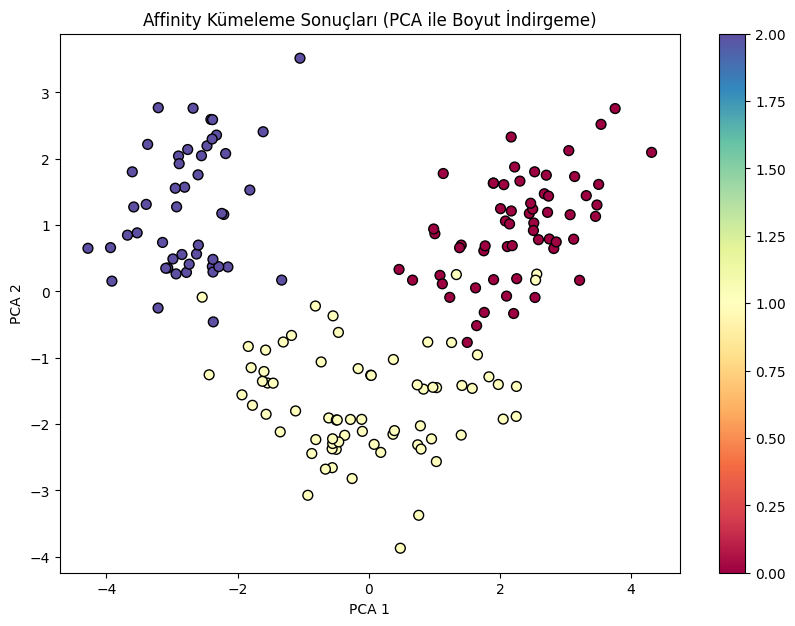

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Spectral', s=50, edgecolor='k')
plt.title('Affinity Kümeleme Sonuçları (PCA ile Boyut İndirgeme)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

## Sonuçların Yorumlanması

###Preference ve Damping Parametrelerinin Etkisi

Preference: Bu parametre, her bir veri noktasının kendi kümesine ait olma isteğini belirler. Daha düşük bir Preference değeri, daha fazla küme oluşmasına neden olabilir. Bu durumda, Preference: -200 ile daha az küme sayısı elde ediyoruz (3 küme) ve Preference: -100 ile 5 küme oluşmuş.

Damping: Bu parametre, mesajlaşma algoritmasında ne kadar "damping" uygulanacağını (yani, mesajların ne kadar zayıflatılacağını) belirler. Damping değeri arttıkça, algılama daha kararlı hale gelebilir, ancak aşırı damping daha küçük kümelerle sonuçlanabilir.

Parametreleri optimize ettikten sonra PCA kullanarak boyut düşürme uyguladığımız algoritmamızın metrik sonuçlarının oldukça başarılı olduğunu görüyoruz.

#**KORELASYON MATRİSİ**

Korelasyon Matrisi, veriler arasındaki ilişkiyi görselleştirerek ve nicel olarak ölçerek analiz etmenin güçlü araçlarından biridir. Özellikle büyük veri setlerindeki değişkenler arasındaki ilişkileri anlamak için sıklıkla kullanılır.

##Korelasyon Matrisi Ne Anlatır?

Korelasyon matrisi, farklı değişkenler arasındaki doğrusal ilişkinin gücünü ve yönünü gösteren bir tablo şeklinde sunulur. Matristeki her hücre, iki değişken arasındaki korelasyon katsayısını içerir.

###Katsayının Büyüklüğü:
Katsayının mutlak değeri ne kadar büyükse, ilişki o kadar güçlüdür. 1'e yakın değerler güçlü pozitif, -1'e yakın değerler ise güçlü negatif ilişkiyi gösterir. 0'a yakın değerler ise ilişkinin zayıf olduğunu veya olmadığını gösterir.

**Katsayının İşareti**

Pozitif Korelasyon: Bir değişken arttığında diğer değişken de artarsa pozitif korelasyon vardır.

Negatif Korelasyon: Bir değişken arttığında diğer değişken azalırsa negatif korelasyon vardır.

###Görselleştirme:
Korelasyon matrisleri genellikle renk kodlu olarak gösterilir. Sıcak renkler (kırmızı, turuncu) güçlü pozitif korelasyonu, soğuk renkler (mavi, yeşil) ise güçlü negatif korelasyonu temsil eder.

##Örnek Yorumlama

Yüksek Pozitif Korelasyon: İki değişkenin korelasyon katsayısı 0.9 ise, bu iki değişken arasında güçlü bir pozitif ilişki olduğu anlamına gelir. Yani biri artıyorsa diğeri de artar azalırken de birlikte azalır.

Yüksek Negatif Korelasyon: İki değişkenin korelasyon katsayısı -0.8 ise, bu iki değişken arasında güçlü bir negatif ilişki olduğu anlamına gelir. Yani bir artarken diğeri azalır.

Zayıf Korelasyon: İki değişkenin korelasyon katsayısı 0.2 ise, bu iki değişken arasında zayıf bir ilişki olduğu veya hiç ilişki olmadığı anlamına gelir.

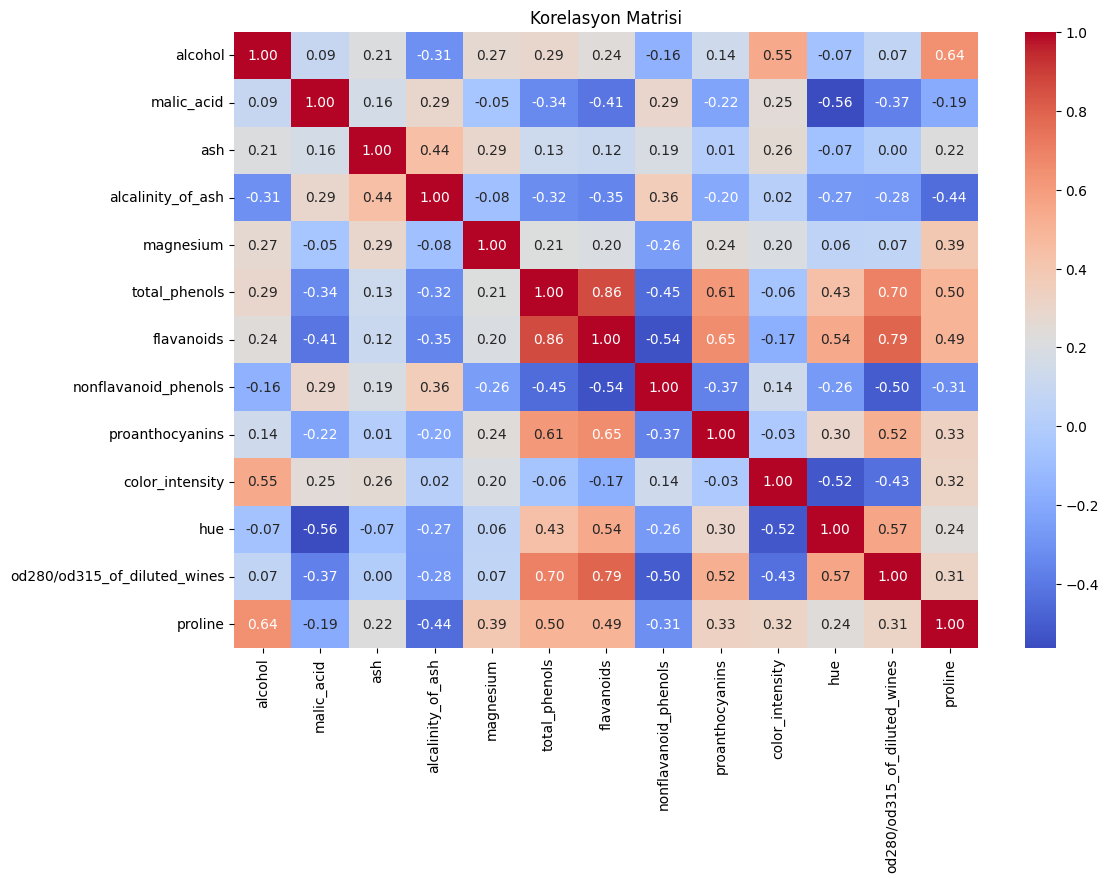

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi oluşturma
correlation_matrix = pd.DataFrame(X, columns=data.feature_names).corr()

# Korelasyon matrisi için ısı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Korelasyon Matrisi")
plt.show()


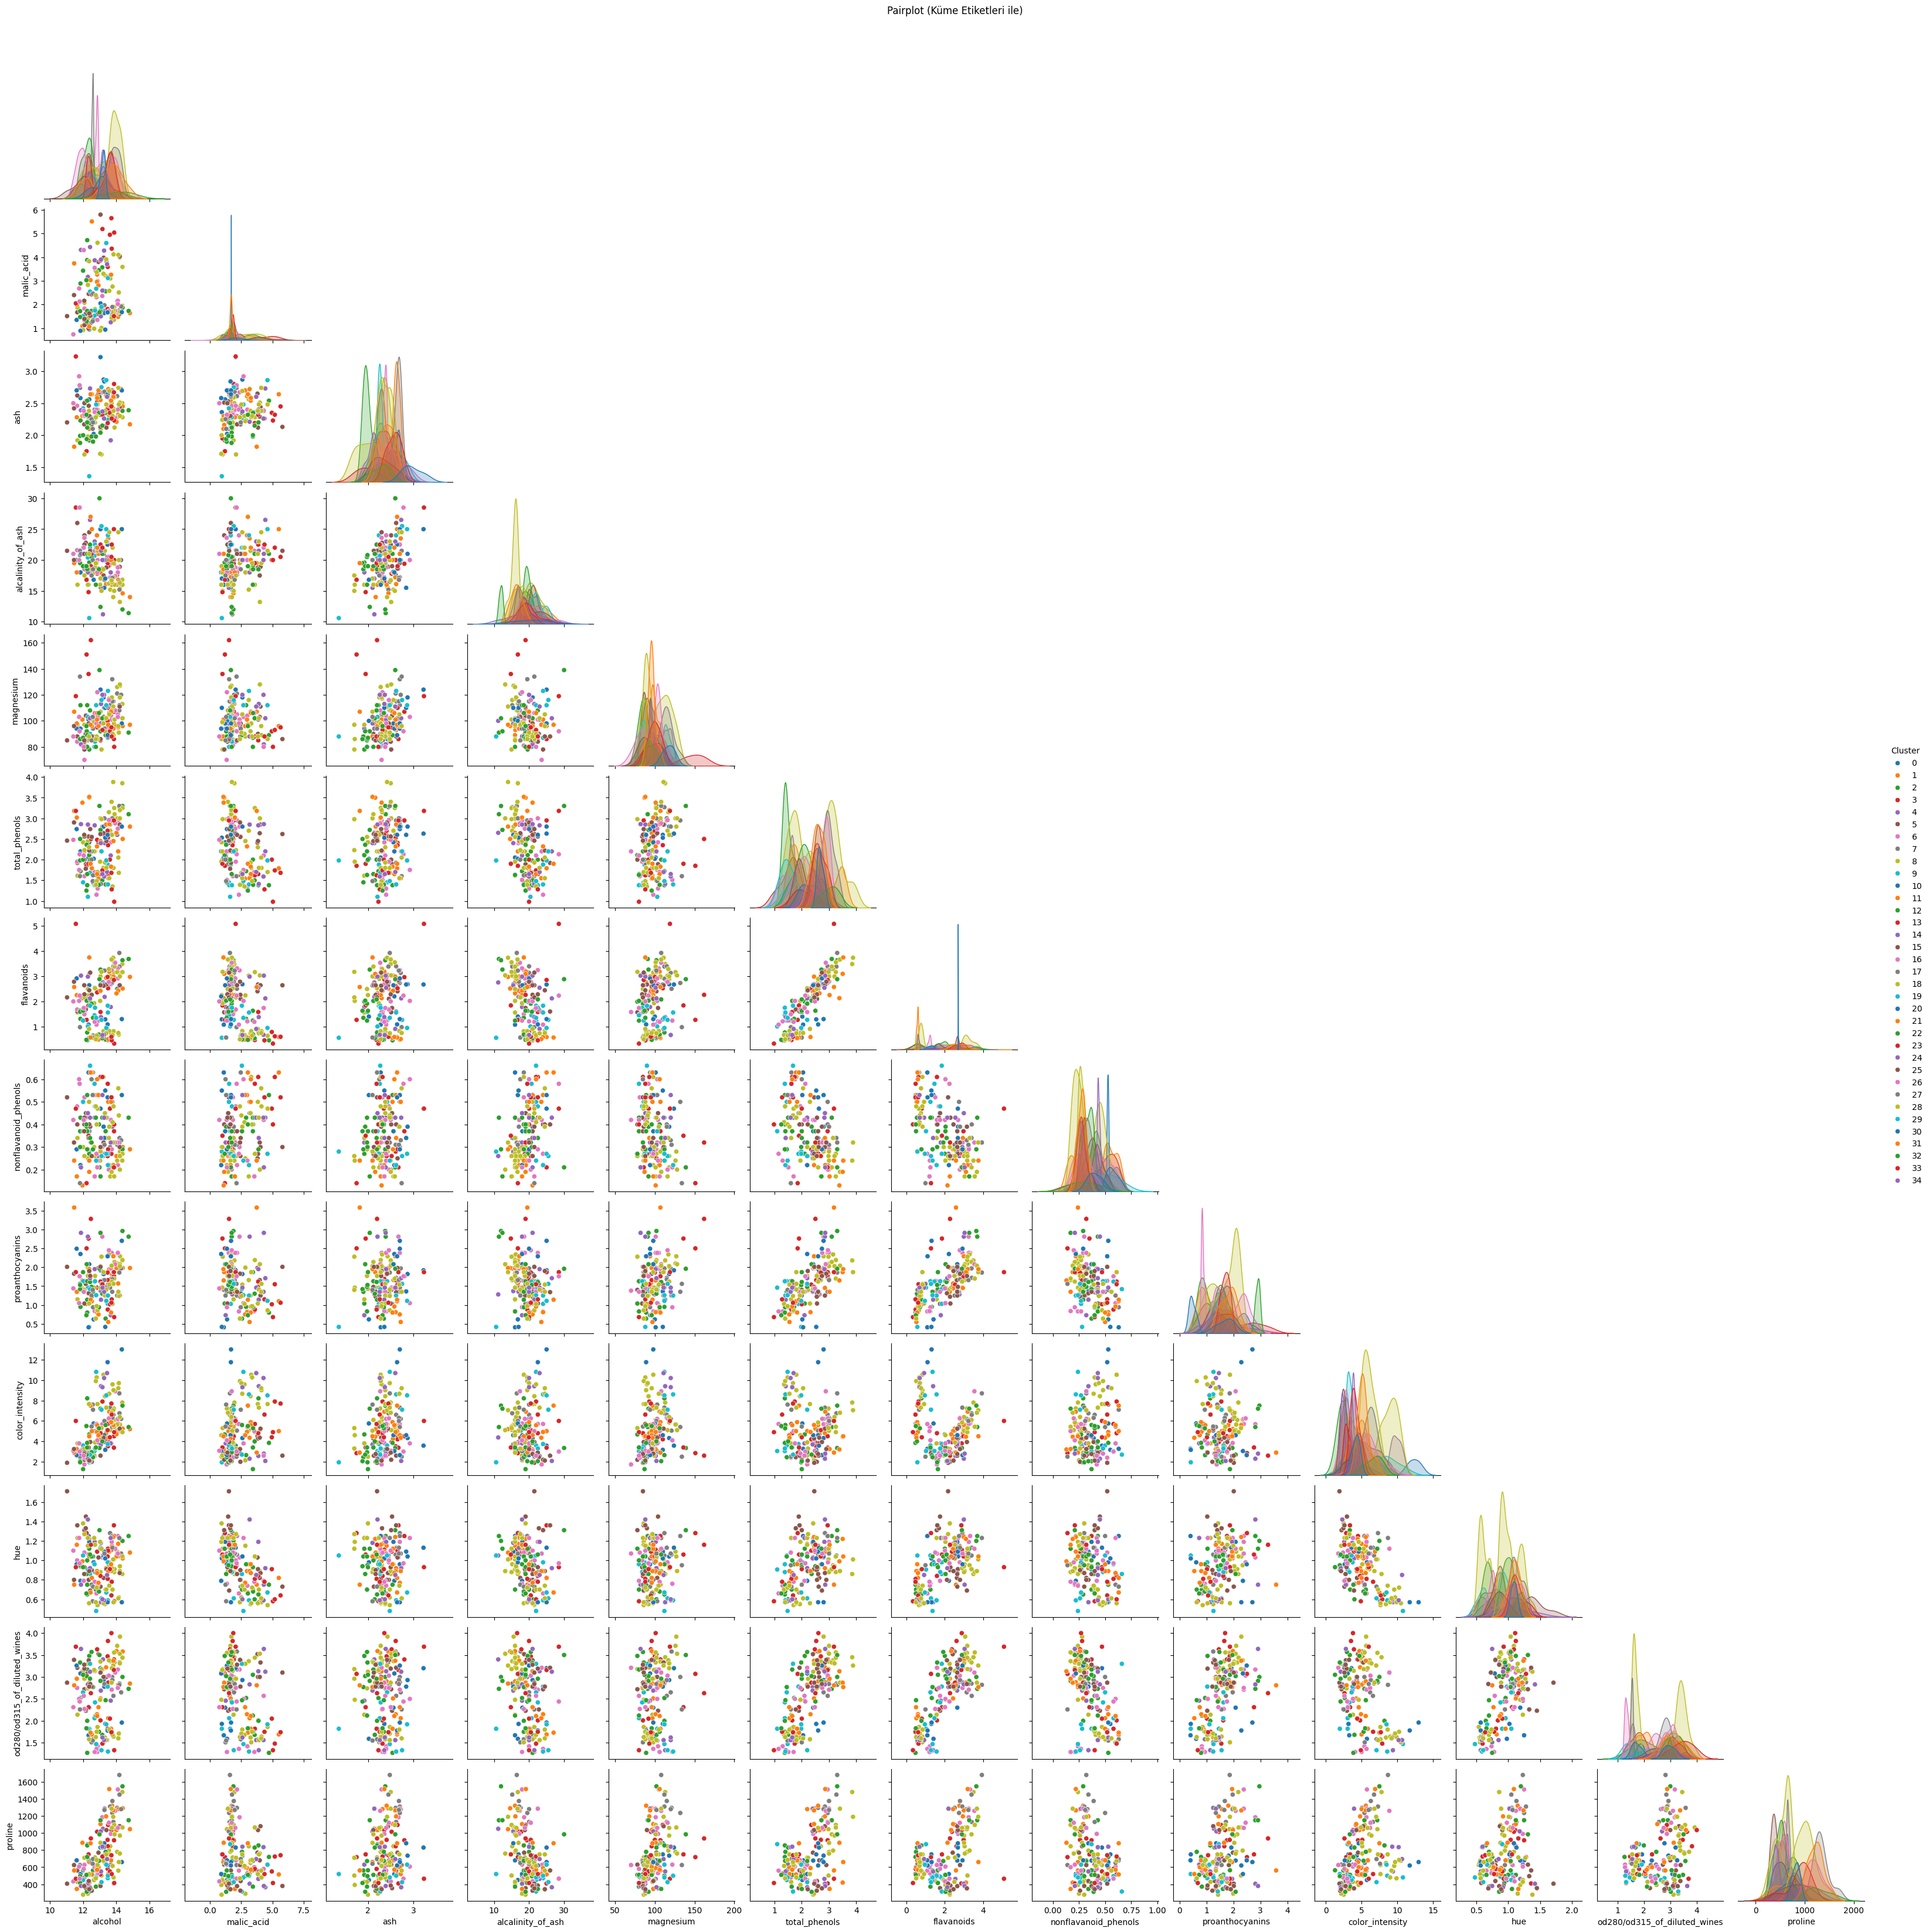

In [ ]:
# Veri çerçevesi oluşturma (pairplot için)
wine_df = pd.DataFrame(X, columns=data.feature_names)
wine_df['Cluster'] = labels  # Etiketleri ekle

# Pairplot
sns.pairplot(wine_df, hue='Cluster', palette='tab10', diag_kind="kde", corner=True)
plt.suptitle("Pairplot (Küme Etiketleri ile)", y=1.02)
plt.show()


# **PAIR PLOTS**

##Pair Plots - Çift Grafiklerin Yorumlanması

Çift Grafikler, veriler arasındaki ilişkiyi görselleştirerek ve nicel olarak ölçerek analiz etmenin güçlü araçlarıdır. Bu araçlar, özellikle büyük veri setlerindeki değişkenler arasındaki ilişkileri anlamak için sıklıkla kullanılır.


##Çift Grafikler (Pair Plots) Ne Anlatır?

Çift grafikler, bir veri setindeki tüm sayısal değişkenler arasındaki ikili ilişkileri tek bir grafikte gösterir. Her bir hücre, iki değişken arasındaki saçılım grafiğini temsil eder.

###Yorumlama:

**Doğrusal İlişki:**

Eğer noktalar bir doğruya yakın bir şekilde dağılıyorsa, iki değişken arasında güçlü bir doğrusal ilişki olduğu söylenebilir.

**Doğrusal Olmayan İlişki**

Noktalar eğri bir çizgiye yakın bir şekilde dağılıyorsa, iki değişken arasında doğrusal olmayan bir ilişki olduğu söylenebilir.

**Bağımsızlık**

Noktalar rastgele dağılıyorsa, iki değişken arasında anlamlı bir ilişki olmadığı söylenebilir.

**Aykırı Değerler**

Grafikte diğer noktalardan uzak düşen noktalar aykırı değerler olabilir ve analizi etkileyebilir.



1. **Köşegen Üzerindeki Dağılımlar (Histogramlar veya Kernel Density Estimation - KDE):**

 Köşegen üzerindeki grafikler, her değişkenin tek başına dağılımını gösterir.

 **Yorumlama:**

 Dağılımın simetrik mi, çarpık mı olduğunu belirleyebilirsiniz.

 Tek tepe (unimodal) ya da çok tepe (multimodal) bir dağılım olup olmadığını anlayabilirsiniz.

 Değerlerin çoğunlukla hangi aralıklarda yoğunlaştığını gözlemleyebilirsiniz.

2. **Köşegen Dışındaki Scatter Plotlar (Dağılım Grafikleri):**

 Bu grafikler, iki değişken arasındaki ilişkiyi gösterir.

 **Yorumlama:**

 Doğrusal bir ilişki varsa, noktalar bir çizgi etrafında toplanır.

 Pozitif doğrusal ilişki: Noktalar yukarı sağa eğimli.

 Negatif doğrusal ilişki: Noktalar yukarı sola eğimli.

 Doğrusal olmayan bir ilişki varsa, noktalar eğri bir şekil oluşturabilir.

 Korelasyonsuz ilişki: Noktalar rastgele dağılmış görünür.
 Noktaların yoğunluğu ve gruplar halinde toplanması, kümelerin varlığını gösterebilir.

 Outlier (aykırı değerler) olup olmadığını fark edebilirsiniz.

3. **Renk ve Gruplama (Hue):**

 Pair plot’a bir kategorik değişken eklediğinizde (örneğin, hue parametresi ile), farklı gruplar farklı renklerde gösterilir.

 Yorumlama:

 Grupların bir değişken boyunca nasıl dağıldığını anlayabilirsiniz.

 Farklı grupların birbirinden ayırt edilebilir olup olmadığını kontrol edebilirsiniz.

 Gruplar arasında örtüşme varsa, bu grupların ayırt edilebilirliğinin düşük olduğunu gösterir.

4. **Yoğunluk Bölgeleri:**

 Scatter plotlarda noktaların yoğun olduğu bölgeler, değişkenlerin sık karşılaşılan değer aralıklarını işaret eder.

 Çok yoğun bir bölge, verilerin büyük kısmının bu aralıkta yoğunlaştığını gösterir.

5. **Aykırı Değerler (Outliers):**

 Scatter plotlarda ana yoğunluk bölgesinden uzakta olan noktalar aykırı değer olabilir.

 Bu değerlerin nedenlerini analiz ederek veri temizliği yapabilirsiniz.


##Bir pair plot şu sorulara yanıt verebilir:

Hangi değişken çiftleri arasında güçlü bir ilişki var?

Verilerde herhangi bir anormallik (outlier) var mı?

Gruplar (örneğin, şarap türleri) birbirinden net şekilde ayrılabiliyor mu?

Değişkenlerin bireysel dağılımları nasıl?

###Sonuç

Pair plot, değişkenler arasındaki ilişkileri ve genel dağılım desenlerini görselleştirmenin hızlı bir yoludur. Yorumlama, hem istatistiksel sonuçlara hem de görsel ipuçlarına dayanır. Bu grafiği, daha derinlemesine analizler yapmak için başlangıç noktası olarak kullanabilirsiniz.


Örnek üzerinden bir iki değeri yorumlayacak olursak da:

**Korelasyon Matrisinden;** flavonoidler ve total-fenol arasında 0.86 gibi pozitif bir korelasyon vardır yani flavonoidler arttıkça total fenoller de artacak azalırken azalacaktır. flavonoid ve non-flavonoid arasında ise negatif bir korelasyon görüyorüz. -0.54 olan bu değer flavonoid miktarı artarsa non-flavonoidlerin azalacağını gösteriyor. ash ve diluted wines arasında ise bağlantı yok gibi görünüyor korelasyon değeri 0.00.

**Pair plot'ta** flavonoidler ve total-fenoller asarsında pozitif ilişkiyi scatter plotun yukarı sağa olan eğiminden anladığımız gibi total fenoller ve non-flavonoidler arasındaki negatif ilişkiyi yukarı sola eğik dağılımdan anlayabiliriz.

magnezyum ve ash değeri ise belli ve yakın değerler arasında yoğunlaştığından kümelenmiş bir şekilde dağılıyor.

###Gelelim tepe noktalarına

Çift grafikte birden fazla tepe noktası, değişkenler arasındaki ilişkinin basit bir doğrusal ilişki olmadığını gösterir. Bu durum, değişkenler arasında daha karmaşık bir ilişki olduğunu veya veri setinde alt gruplar (kümeler) olabileceğini işaret eder.

**Neden Birden Fazla Tepe Noktası Görülebilir?**

Doğrusal Olmayan İlişkiler: Değişkenler arasında doğrusal olmayan (örneğin, polinomsal, üstel) bir ilişki varsa, çift grafikte eğri bir çizgi veya birden fazla tepe noktası gözlemlenebilir.

Alt Gruplar: Veri setinde doğal olarak oluşan veya farklı özelliklere sahip alt gruplar varsa, bu alt grupların her biri farklı bir dağılım gösterebilir ve çift grafikte birden fazla tepe noktası oluşmasına neden olabilir.

Aykırı Değerler: Veri setindeki aykırı değerler de çift grafikte beklenmedik tepelere neden olabilir.

İnteraksiyon Etkileri: İki değişken arasındaki ilişki, üçüncü bir değişkenin etkisi altında değişiyorsa, çift grafikte karmaşık bir yapı gözlemlenebilir.

Bizim datasetimiz için yorum bu tepe noktalarının birden fazla alt grup olmasından ve analiz ettiğimiz özelliğin pek çok varyasyonunun olmasından kaynaklı ama malik asit ve flavonoidlerde farklı bir durum gözlemledik neden?

Malik asit üzüm meyvesinin baskın asitlerinden biridir genel olarak belli bir miktarda bulunur o yüzden bu alanda pek çok tepe noktası görmedik. Neredeyse pik şeklinde bir çıktı vermesinin sebebi budur. Bu bilgi ne işimize yarar mesela ortalamanın altında malik asit içeren bir üzüm çeşidi var onları ayırt etmek istersek bu değer bize yol gösterebilir yani yüksek ya da düşük malik asit seviyelerine sahip şarapların belirli bir üzüm çeşidinden veya farklı bir bölgeden gelme olasılığı daha yüksek olabilir. Ayrıca buradan yola çıkarak pik yapan özniteliklerin bizim için ayırıcı olmayacağını da gösterecektir o durumda bu öznitelikler elenebilir.

Sınırlı Varyasyon: Pik çok keskinse, bu durum değişkenin çok dar bir aralıkta değiştiğini gösterir. Yani, şaraplardaki malik asit ve flavonoid seviyeleri genellikle belirli bir oranı koruyor demektir.

###Gördüğümüz gibi her iki görsel araç da verimizi görselleştirerek öznitelikler arasındaki ilişkiyi anlayıp çalışacağımız algoritmaya karar vermemize başarıyı artırabilmemiz için nasıl bir yol izlememizin doğru olacağını anlamıza olanak sağlıyor.

# **HATIRLATICI NOTLAR**


#1. K-Means

**Temel Mantık:** Küme merkezleri (centroids) kullanılarak noktalar kümelere atanır. Amaç, kümeler arasındaki toplam varyansı minimize etmektir.

**Avantajlar**

Hızlı ve kullanması basit bir algoritma.

Büyük veri setleriyle iyi çalışır.

**Dezavantajlar**

Küme sayısının (k) önceden belirlenmesi gerekir.

Küresel olmayan kümelerde başarısız olabilir.

Aykırı değerlere karşı hassastır.

#2. Hiyerarşik Kümeleme

**Temel Mantık:** Veriler arasındaki mesafelere dayanarak bir ağaç yapısı (dendrogram) oluşturur. Kümeler, ağaçtaki dallara göre belirlenir.

**Avantajlar**

Küme sayısını önceden belirlemek gerekmez.

Kümeler arasında hiyerarşik bir ilişki kurar.

**Dezavantajlar**

Büyük veri setlerinde yavaş çalışır.

Sonuç, kullanılan mesafe ölçütüne ve bağlama yöntemine bağlıdır (ör. average, single, complete).

#3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**Temel Mantık:** Noktaları yoğunluklarına göre kümeler. Gürültü noktalarını ayırır.

**Avantajlar**

Küresel olmayan kümeleri algılayabilir.

Gürültüyü tanımlama özelliği.

Dezavantajlar**

Parametrelerin (eps, min_samples) dikkatli seçilmesi gerekir.

Düşük yoğunluklu kümelerde başarısız olabilir.

#4. OPTICS (Ordering Points to Identify the Clustering Structure)

**Temel Mantık:** DBSCAN gibi yoğunluk bazlı bir algoritmadır, ancak küme sınırlarını belirlemek için daha esnek bir yapı sunar.

**Avantajlar**

Kümelerin iç içe geçmiş olduğu durumlarda daha iyi sonuç verir.

Gürültüyü tanıyabilir.

**Dezavantajlar**

Parametre seçimi hassastır.

Kümeleme sonuçlarını yorumlamak zordur.

#5. HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)

**Temel Mantık:** DBSCAN’ın hiyerarşik bir versiyonudur, daha esnek ve ayrıntılı sonuçlar sunar.

**Avantajlar**

Gürültü noktalarını belirleme yeteneği.

Daha karmaşık veri setlerinde etkili.

**Dezavantajlar**

Hesaplama maliyeti yüksek olabilir.

Parametre optimizasyonu zor olabilir.

#6. Gaussian Mixture Model (GMM)

**Temel Mantık:** Veri, her biri Gaussian dağılımına sahip alt kümelere ayrılır. Parametreleri optimize etmek için Expectation-Maximization (EM) algoritması kullanılır.

**Avantajlar**

Küresel olmayan kümeleri iyi algılar.

Olasılıksal bir yaklaşım sunar.

**Dezavantajlar**

Küme sayısının önceden bilinmesi gerekir.

Hesaplama maliyeti yüksek olabilir.

#7. Spectral Clustering

**Temel Mantık:** Veriyi bir graf olarak temsil eder ve grafın spektral özelliklerini kullanarak kümeler oluşturur.

**Avantajlar**

Küresel olmayan kümeleri iyi ayırt eder.

Küçük veri setlerinde etkili.

**Dezavantajlar**

Hesaplama maliyeti yüksek.

Küme sayısının önceden belirlenmesi gerekir.

#8. Affinity Propagation

**Temel Mantık:** Küme merkezleri otomatik olarak belirlenir. Veriler arasındaki benzerliklere dayanır.

**Avantajlar**

Küme sayısının önceden belirlenmesine gerek yoktur.

Gürültü verilerle iyi çalışır.

**Dezavantajlar**

Büyük veri setlerinde yavaş çalışabilir.

Parametre seçimi hassastır.


##Hangi algoritmayı seçmeliyim?

Veri setinin özellikleri: Verinin boyutu, dağılımı, gürültü seviyesi gibi faktörler algoritma seçimini etkiler.

Kümelerin beklenen şekli: Küresel, karmaşık şekilli veya değişken yoğunluklu kümeler için farklı algoritmalar daha uygun olabilir.

Küme sayısı: Biliniyorsa K-Means gibi algoritmalar, bilinmiyorsa DBSCAN veya HDBSCAN gibi algoritmalar tercih edilebilir.

Hesaplama maliyeti: Büyük veri setleri için daha hızlı algoritmalar tercih edilebilir.

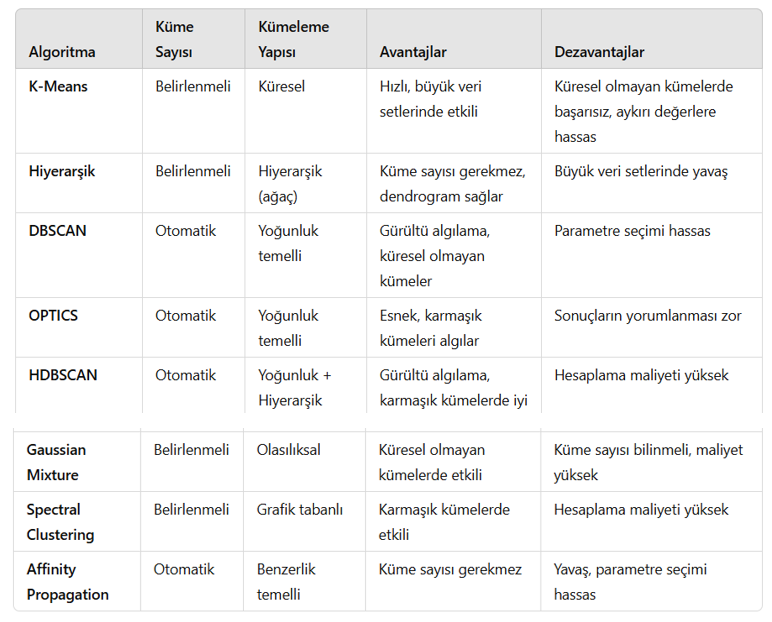


Bütün kümeleme algoritmaları ve demoları için aşağıdaki bağlantıya tıklayınız:

https://scikit-learn.org/1.5/auto_examples/cluster/index.html